In [1]:
# imports 
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# load data
base_path = '../data/maize_data_2014-2022_vs_2023_v2/'
X_train = pd.read_csv(base_path + 'X_train.csv', index_col=0).reset_index(drop=True)
X_test = pd.read_csv(base_path + 'X_test.csv', index_col=0).reset_index(drop=True)
y_train = pd.read_csv(base_path + 'y_train.csv', index_col=0).reset_index(drop=True)
y_test = pd.read_csv(base_path + 'y_test.csv', index_col=0).reset_index(drop=True)

In [3]:
g_train = X_train.iloc[:, :2240]
e_train = X_train.iloc[:, 2240:]
g_test = X_test.iloc[:, :2240]
e_test = X_test.iloc[:, 2240:]

In [4]:
# count na vals
names = [g_train, e_train, g_test, e_test, y_train, y_test]
for name in names:
    nas = name.isna().sum().sum()
    print(f'NAs {nas}')

NAs 0
NAs 0
NAs 0
NAs 0
NAs 0
NAs 0


In [5]:
# count 0 vals/proportions (exclude g data)
names = [e_train, e_test, y_train, y_test]
for name in names:
    zeros = (name == 0).sum().sum()
    print(f'Zeros {zeros}')
    print(f'Proportion {zeros / name.size}')

Zeros 8369224
Proportion 0.18748464085118483
Zeros 1189255
Proportion 0.18920779502609522
Zeros 0
Proportion 0.0
Zeros 0
Proportion 0.0


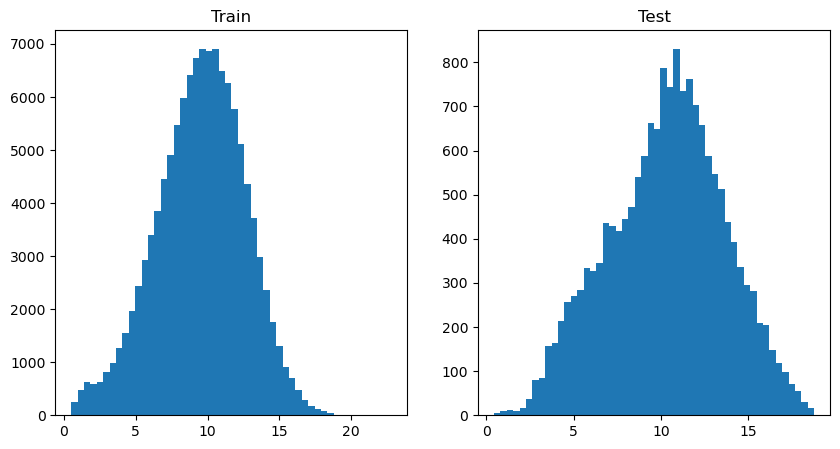

In [6]:
# distribution of ys
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(y_train, bins=50)
ax[0].set_title('Train')
ax[1].hist(y_test, bins=50)
ax[1].set_title('Test')
plt.show()

In [7]:
from scipy.stats import entropy, ks_2samp

# # compare distribution of e data with kolmogorov smirnov test
# for i in tqdm(range(len(e_train.columns))):
#     # get KLD
#     ks = ks_2samp(e_train.iloc[:, i], e_test.iloc[:, i])
#     if ks.pvalue < 0.10:
#         print(f'Column: {e_train.columns[i]}')
#         print(f'KS p-value: {ks.pvalue}')
#         fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
#         ax[0].hist(e_train.iloc[:, i], bins=50)
#         ax[0].set_title('Train')
#         ax[1].hist(e_test.iloc[:, i], bins=50)
#         ax[1].set_title('Test')
#         plt.show()

In [8]:
# # plot dists
# for i in tqdm(range(len(e_train.columns))):
#     print(f'Column: {e_train.columns[i]}')
#     fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
#     ax[0].hist(e_train.iloc[:, i])
#     ax[0].set_title('Train')
#     ax[1].hist(e_test.iloc[:, i])
#     ax[1].set_title('Test')
#     plt.show()

  0%|          | 0/374 [00:00<?, ?it/s]

Column: Weather_Station_Latitude (in decimal numbers NOT DMS)
KS p-value: 7.812933989887863e-143


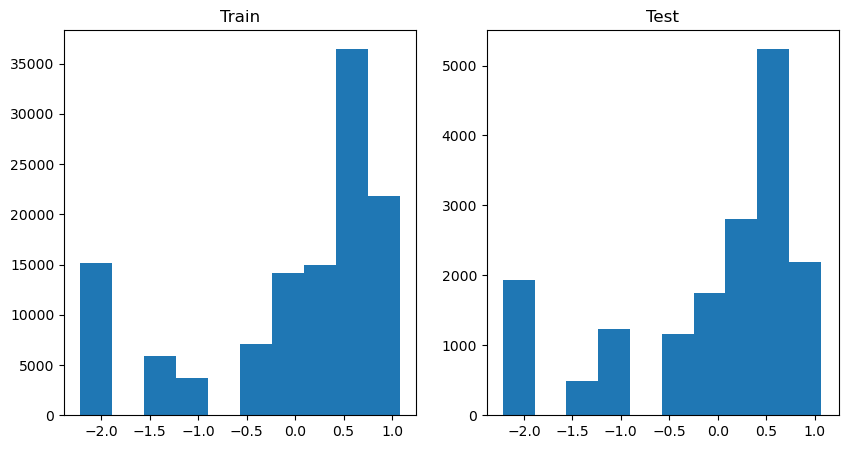

Column: Weather_Station_Longitude (in decimal numbers NOT DMS)
KS p-value: 1.0966328941907536e-129


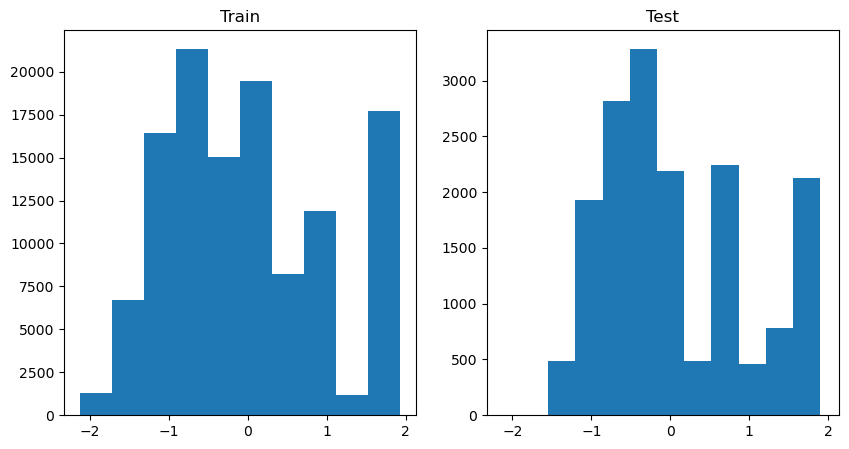

Column: HI30_pEnJFlo
KS p-value: 1.764192790403224e-59


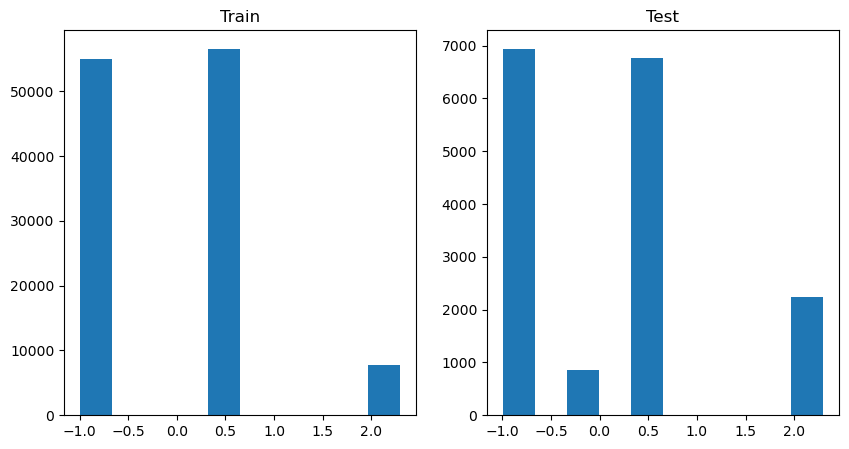

Column: HI30_pFloFla
KS p-value: 0.0


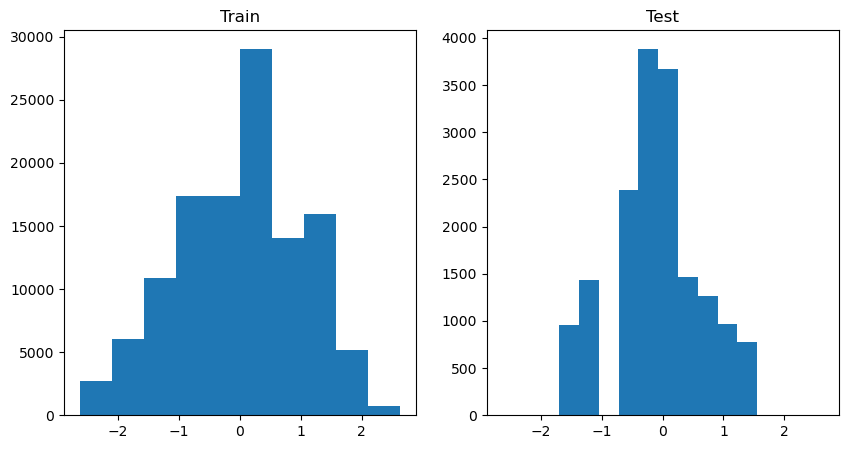

Column: HI30_pFlaFlw
KS p-value: 0.0


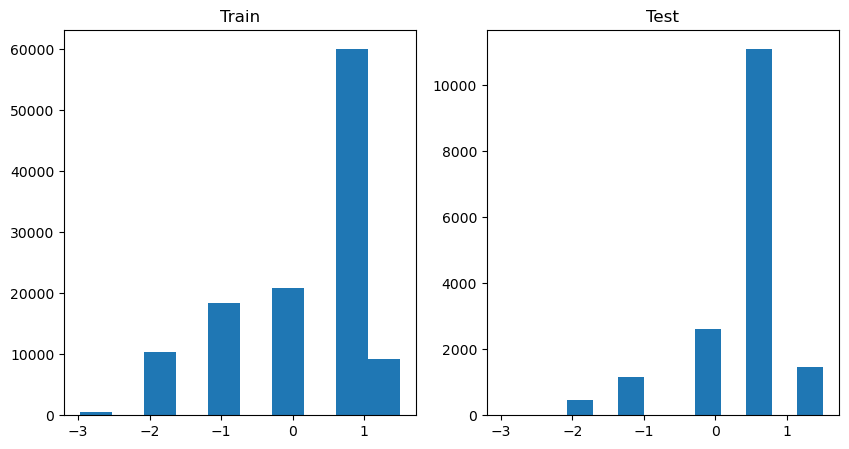

Column: HI30_pFlwStG
KS p-value: 5.00993127167823e-215


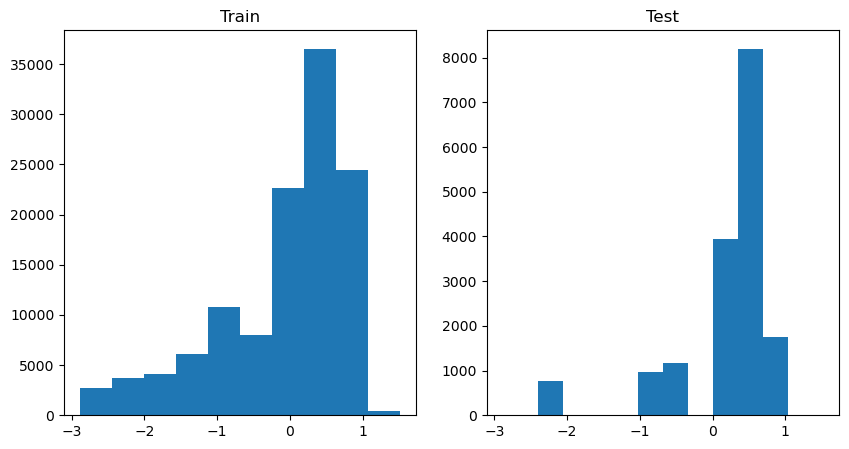

Column: HI30_pStGEnG
KS p-value: 0.0


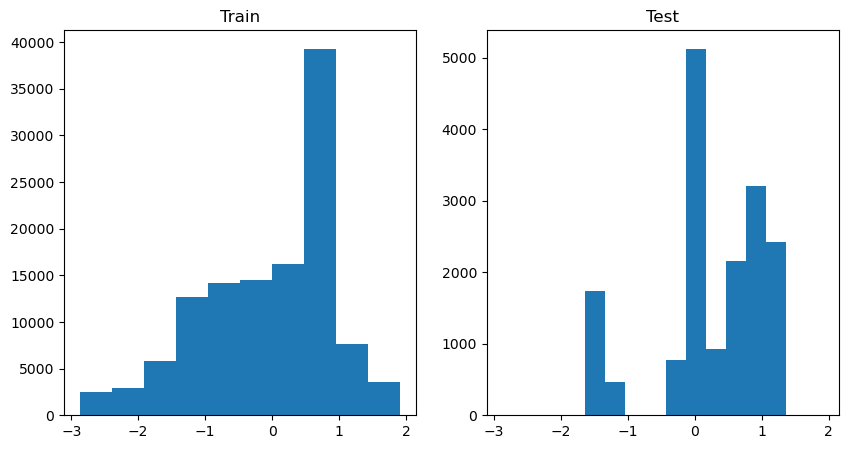

Column: HI30_pEnGMat
KS p-value: 1.3252784874924258e-171


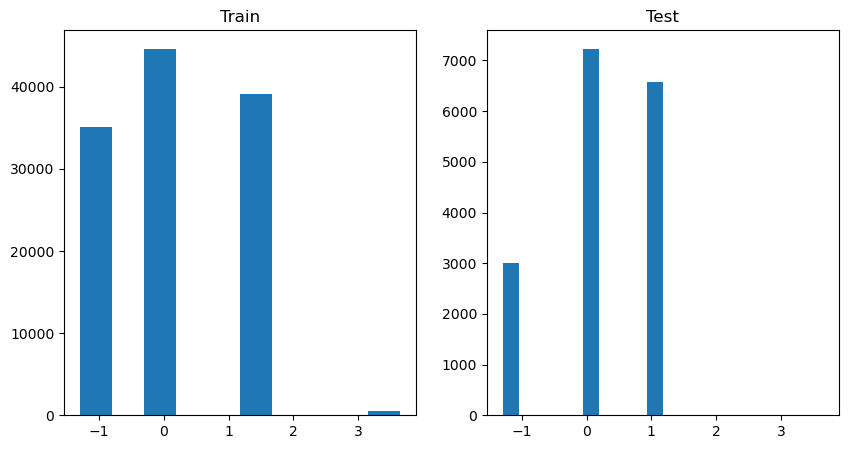

Column: HI30_pMatHar
KS p-value: 1.0831595311432581e-172


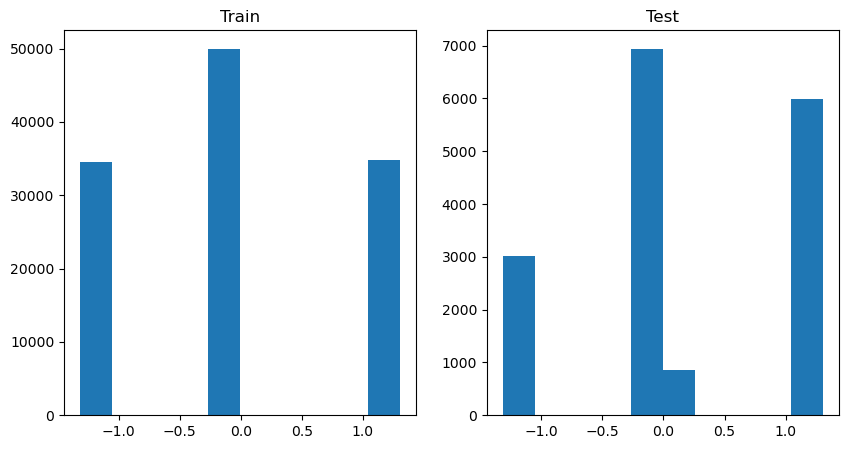

Column: CumHI30_pGerEme
KS p-value: 1.5617591052310167e-169


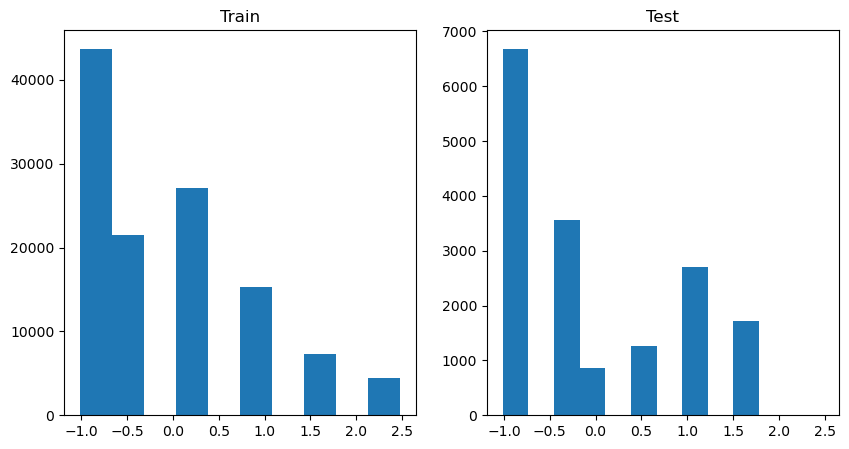

Column: CumHI30_pEmeEnJ
KS p-value: 5.021374e-317


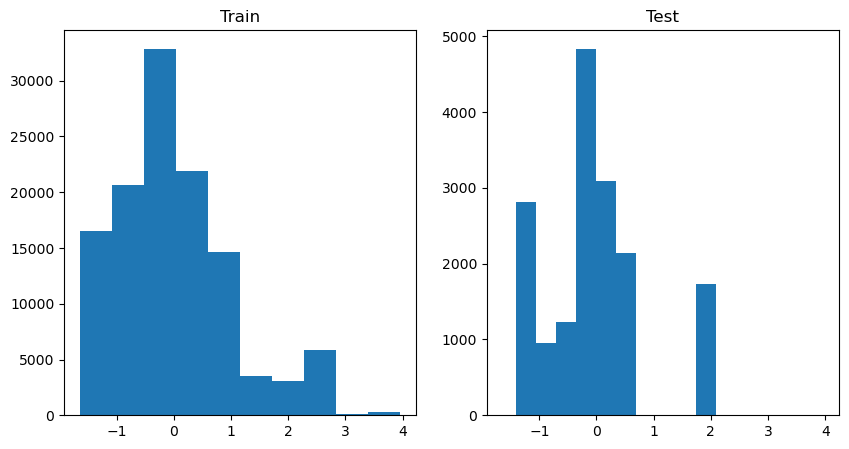

Column: CumHI30_pFlwStG
KS p-value: 0.0


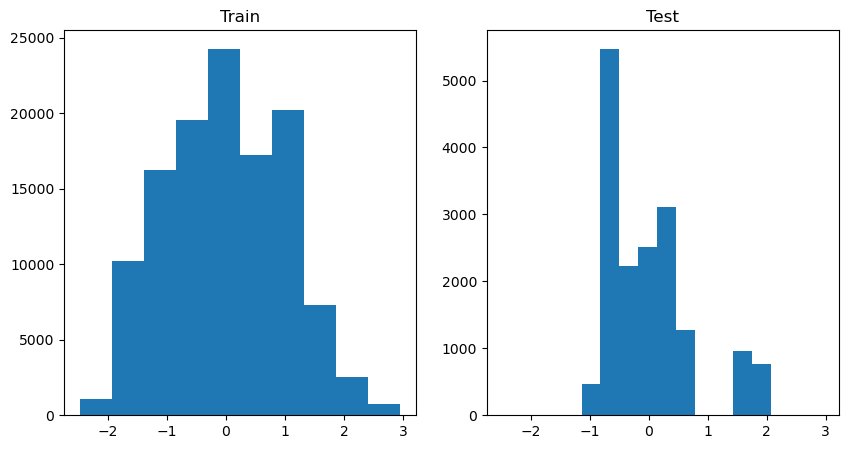

Column: TT_pGerEme
KS p-value: 0.0


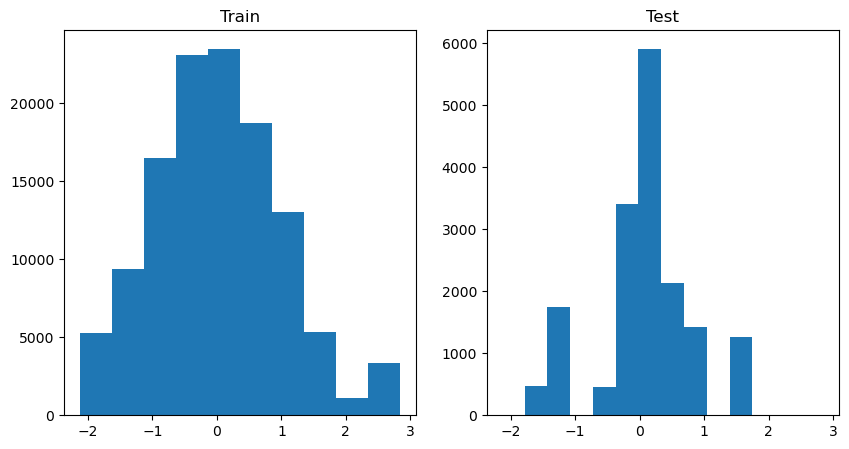

Column: TT_pEmeEnJ
KS p-value: 0.0


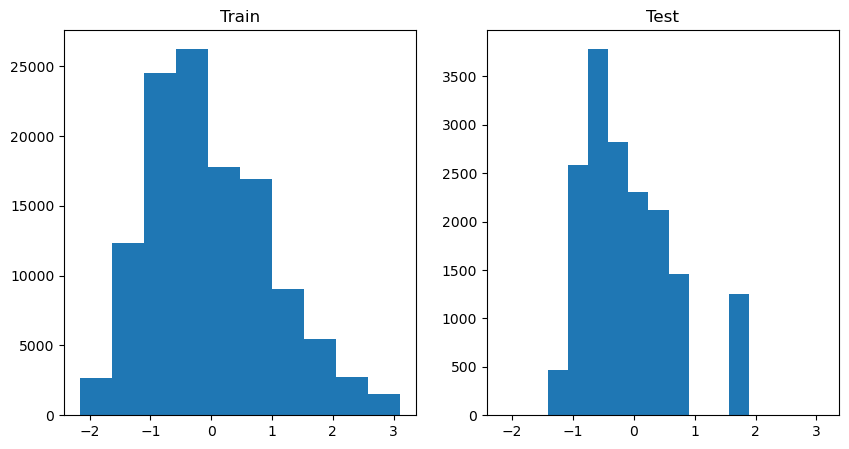

Column: TT_pEnJFlo
KS p-value: 9.934294119785816e-280


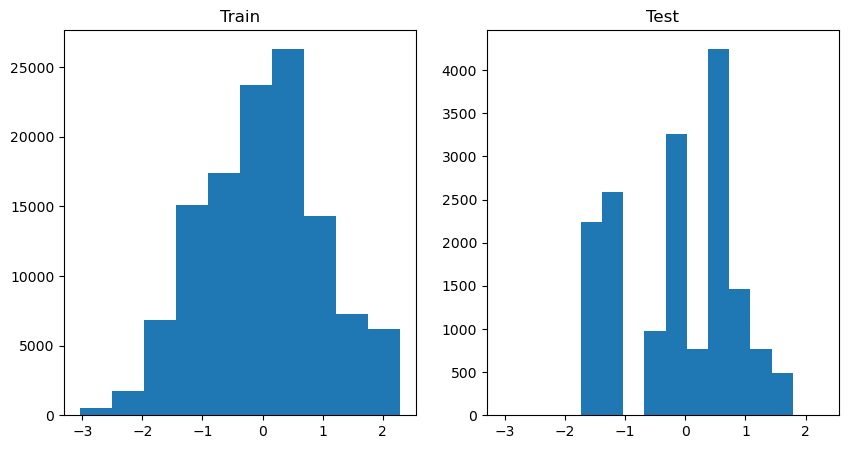

Column: TT_pFloFla
KS p-value: 0.0


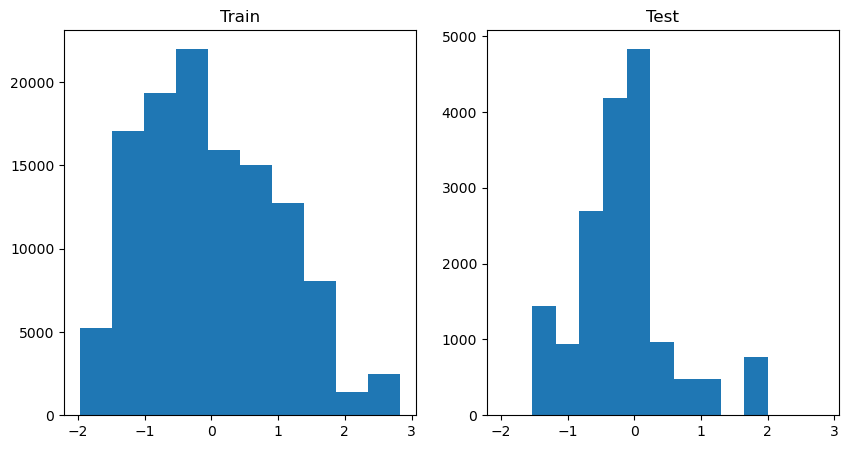

Column: TT_pFlaFlw
KS p-value: 0.0


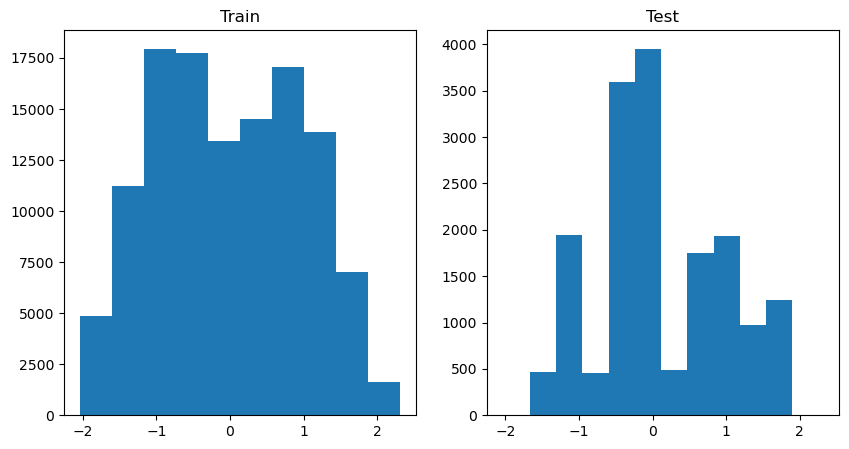

Column: TT_pFlwStG
KS p-value: 0.0


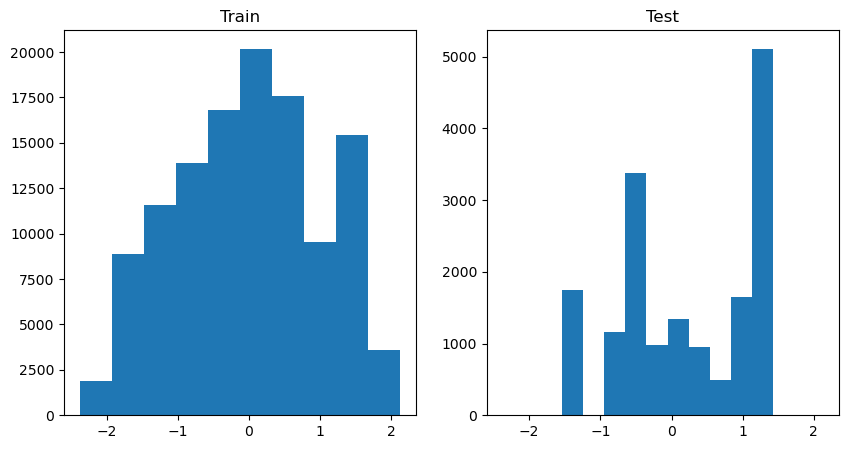

Column: TT_pStGEnG
KS p-value: 0.0


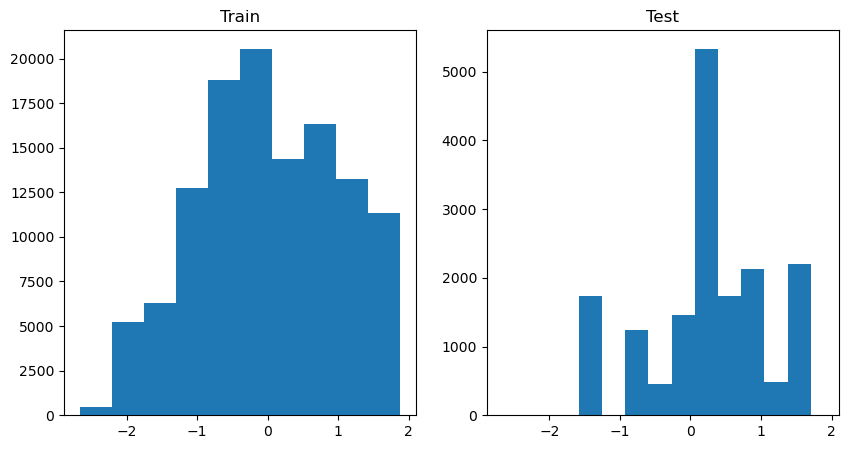

Column: TT_pEnGMat
KS p-value: 0.0


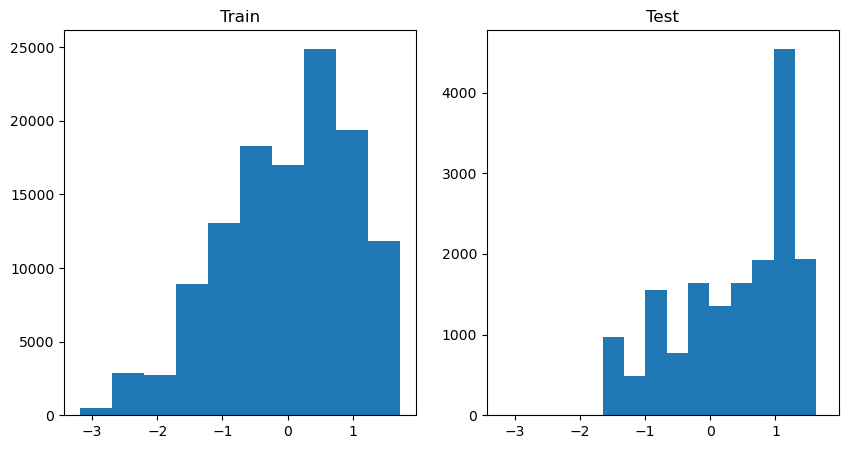

Column: biomass_pFlaFlw
KS p-value: 0.0


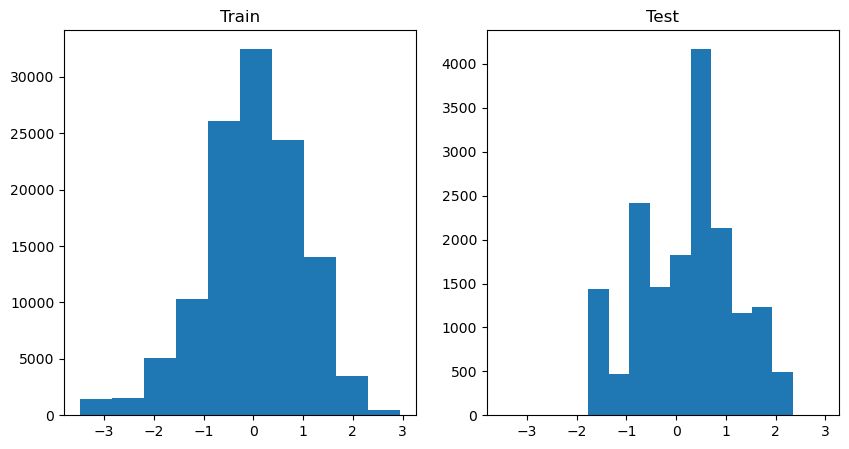

Column: biomass_pEnGMat
KS p-value: 0.0


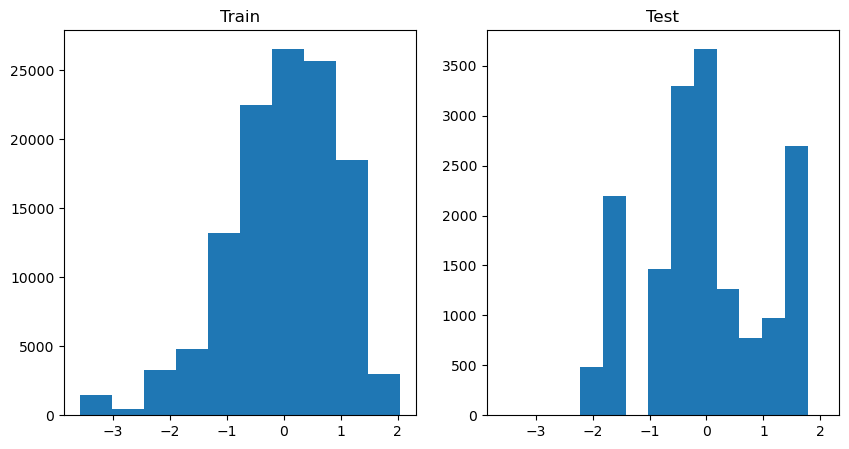

Column: yield_pFlaFlw
KS p-value: 0.0


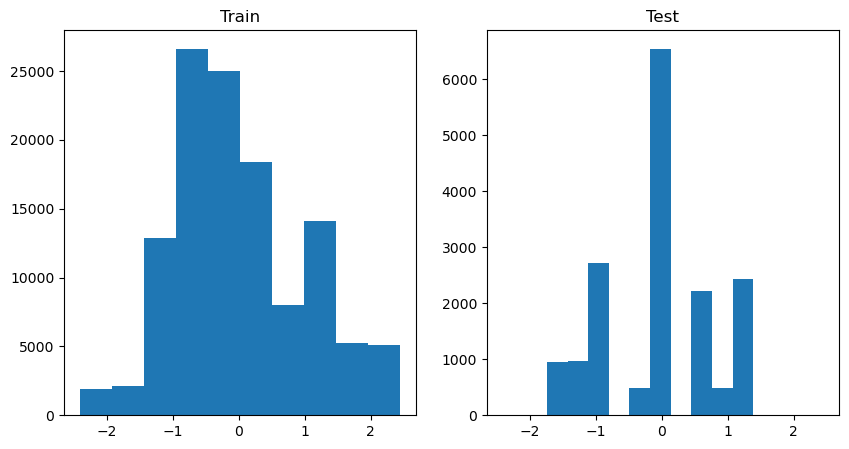

Column: yield_pFlwStG
KS p-value: 2.1107562527184048e-251


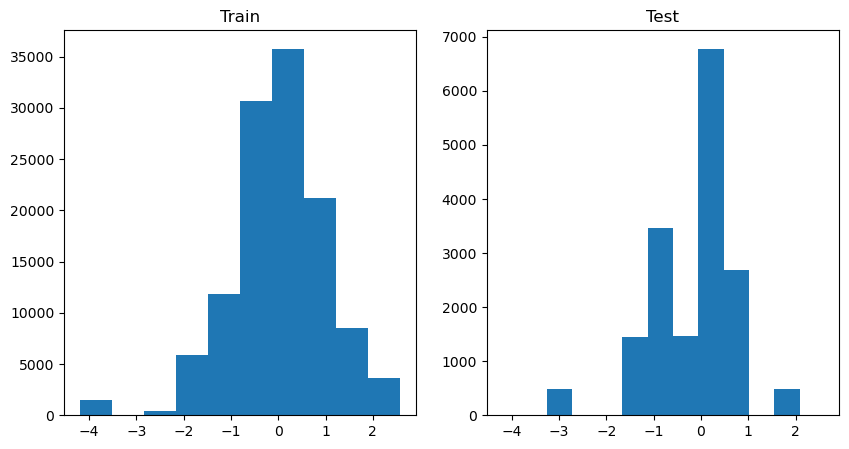

Column: yield_pStGEnG
KS p-value: 0.0


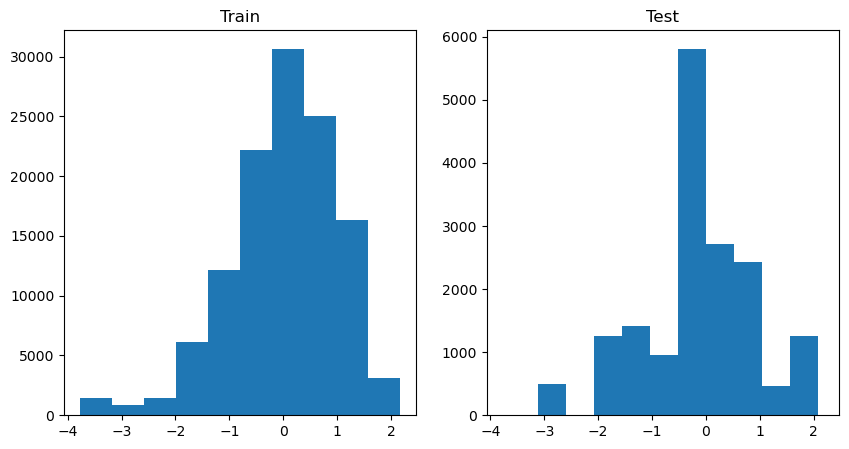

Column: Eo_pGerEme
KS p-value: 0.0


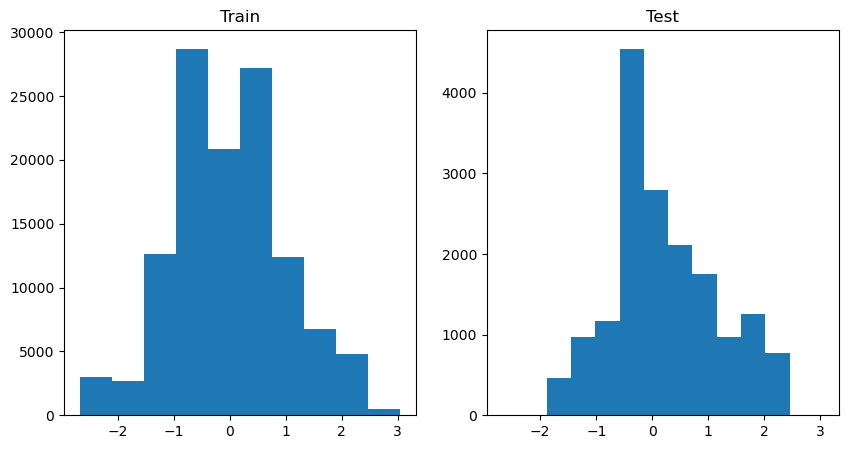

Column: Eo_pEmeEnJ
KS p-value: 0.0


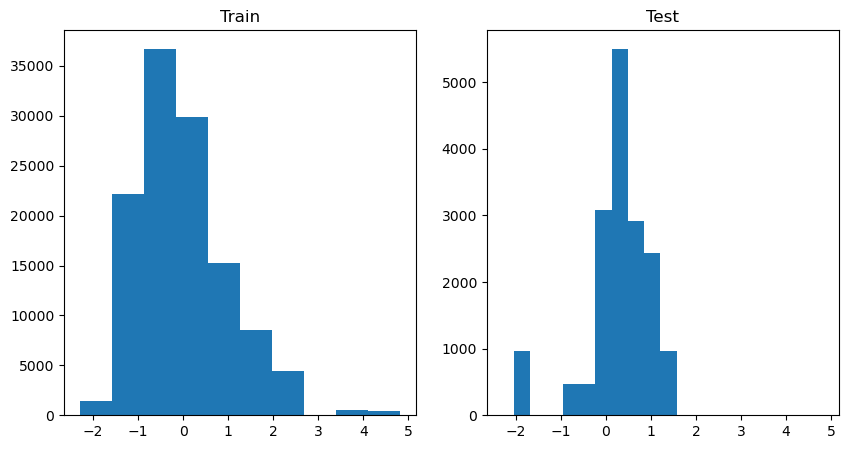

Column: Eo_pEnJFlo
KS p-value: 0.0


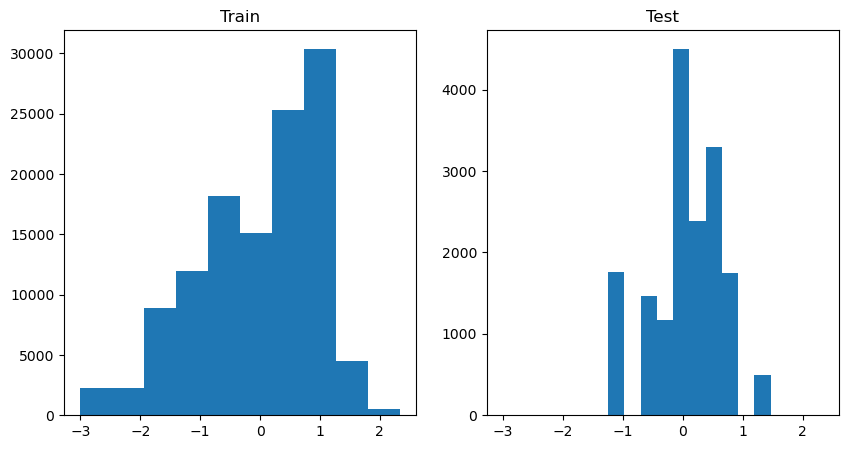

Column: Eo_pFloFla
KS p-value: 0.0


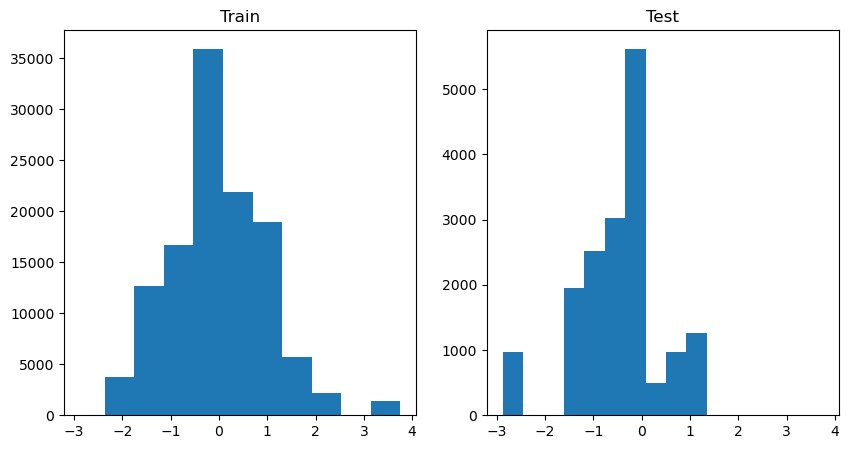

Column: Eo_pFlaFlw
KS p-value: 0.0


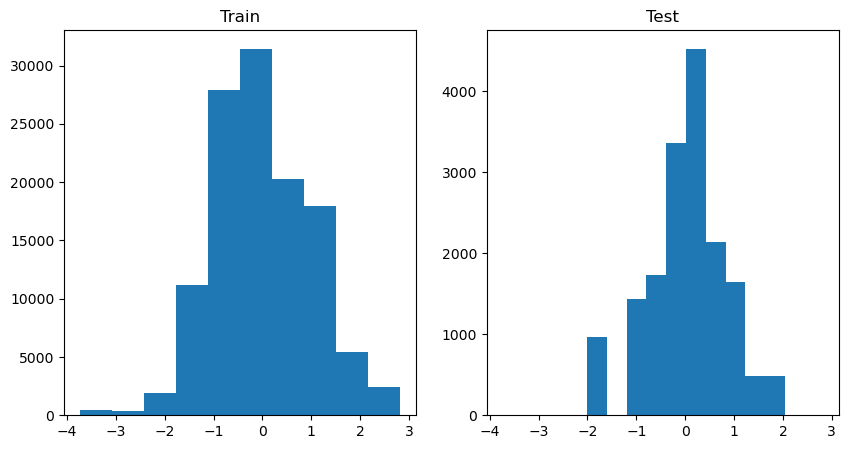

Column: Eo_pFlwStG
KS p-value: 0.0


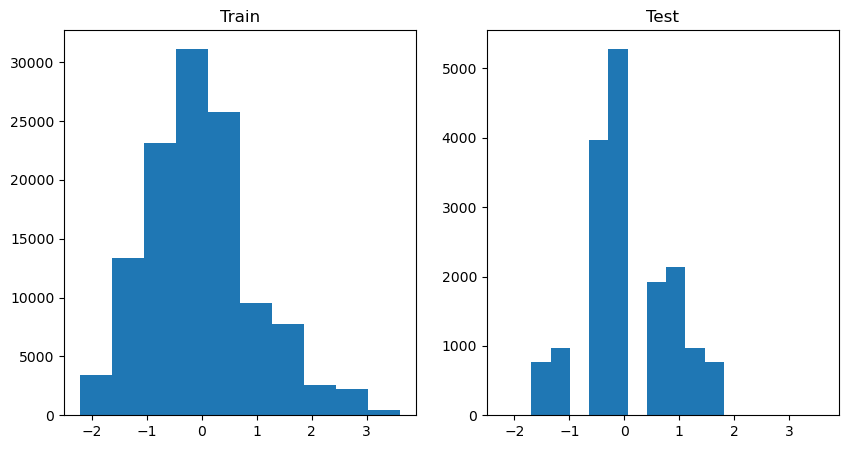

Column: Eo_pStGEnG
KS p-value: 0.0


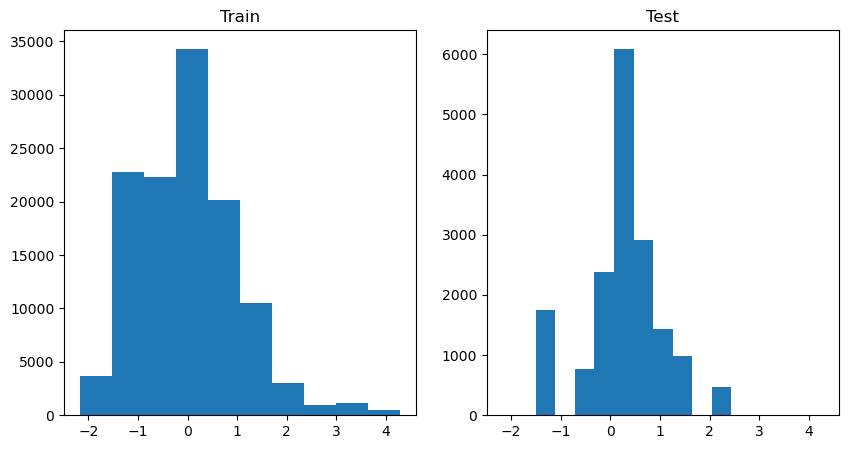

Column: Eo_pEnGMat
KS p-value: 0.0


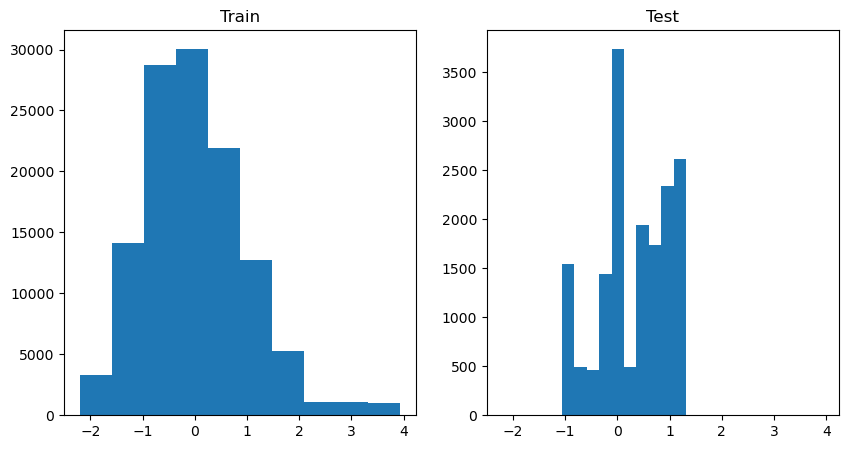

Column: Eo_pMatHar
KS p-value: 0.0


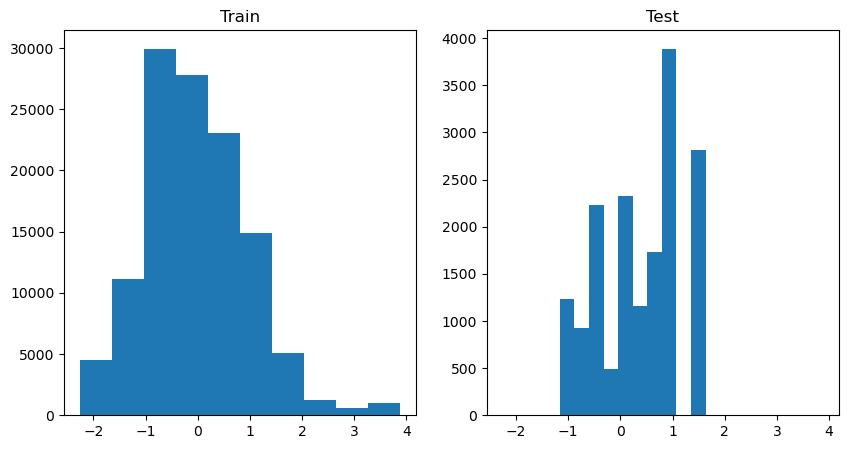

Column: Eos_pFloFla
KS p-value: 0.0


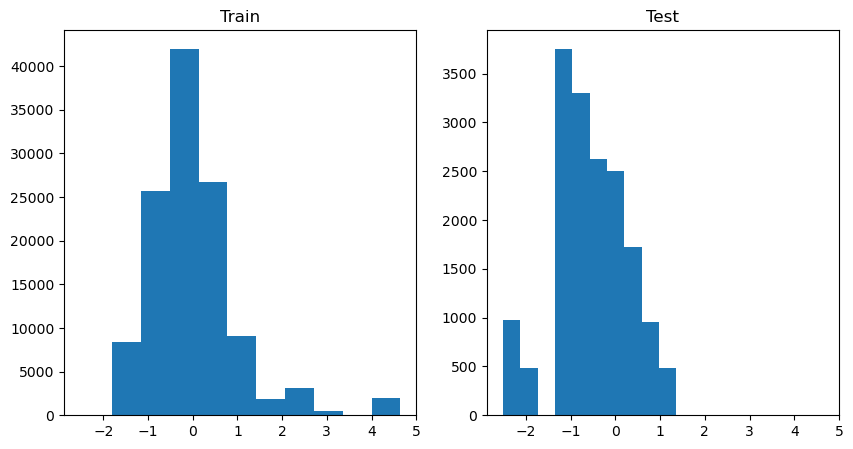

Column: Eos_pFlaFlw
KS p-value: 3.8672346853858785e-202


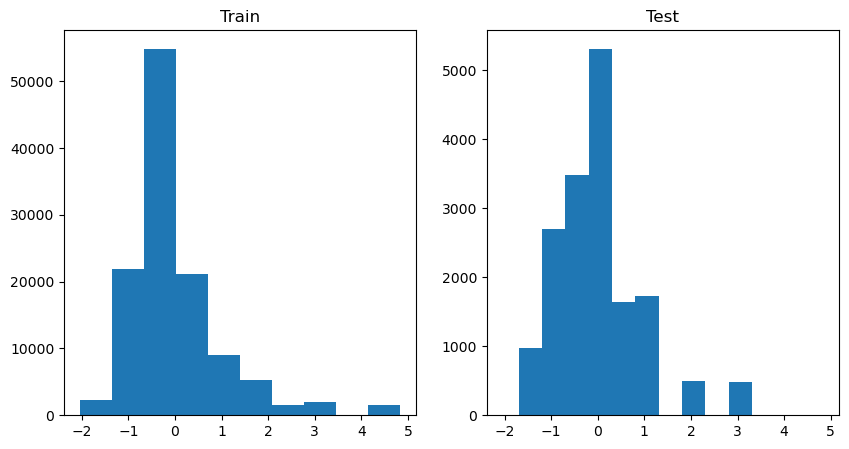

Column: Eos_pFlwStG
KS p-value: 7.314690403303388e-286


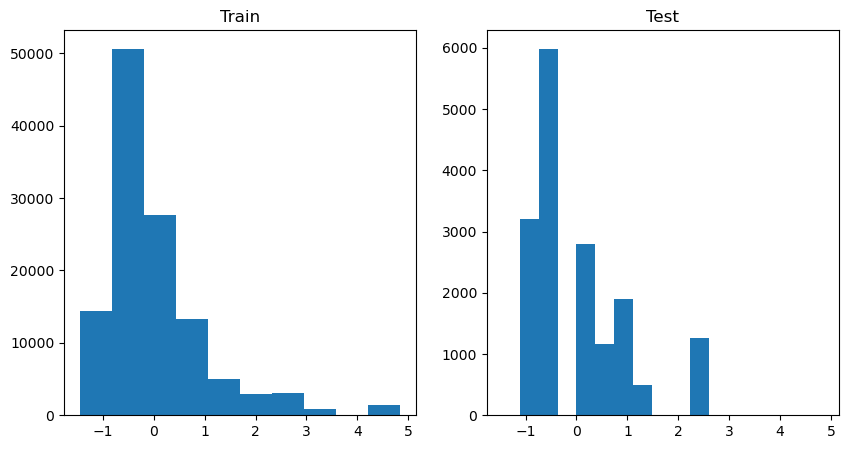

Column: Eos_pStGEnG
KS p-value: 0.0


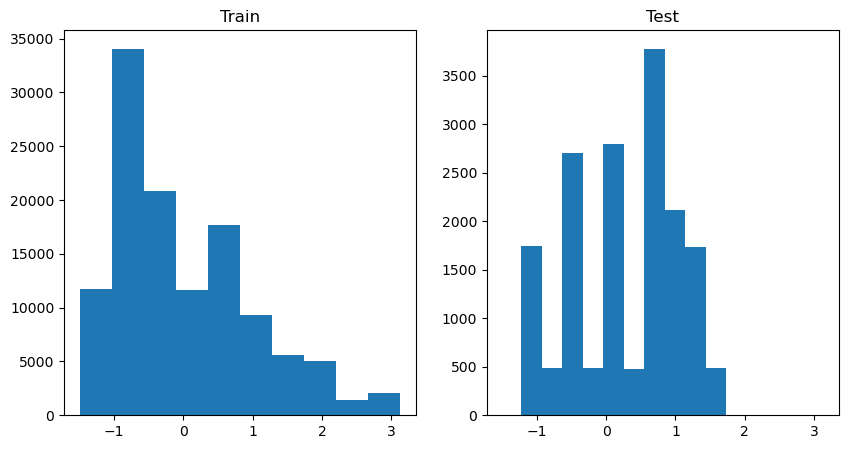

Column: Eos_pEnGMat
KS p-value: 0.0


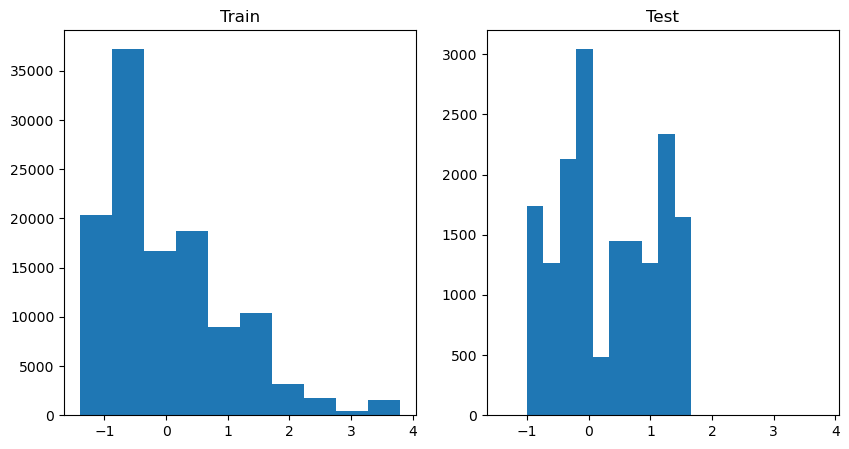

Column: Es_pGerEme
KS p-value: 0.0


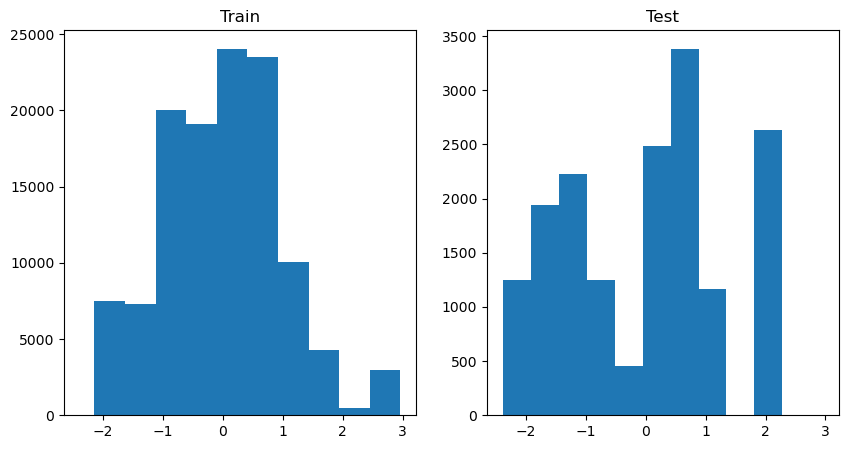

Column: Es_pEmeEnJ
KS p-value: 0.0


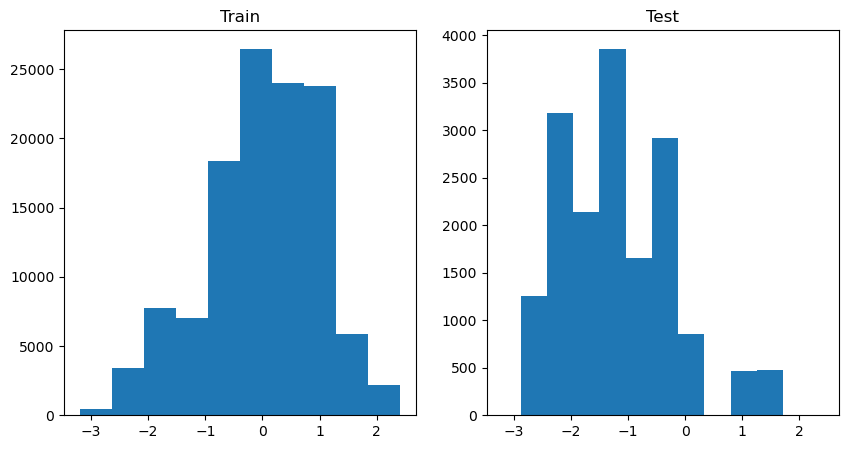

Column: Es_pEnJFlo
KS p-value: 0.0


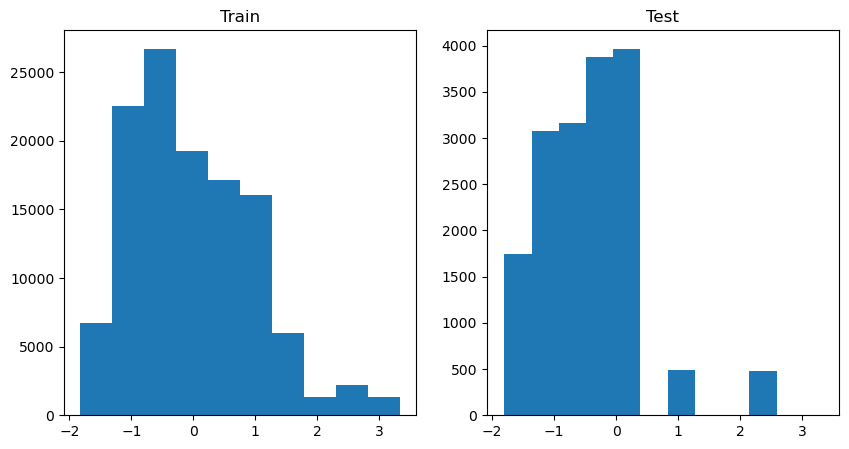

Column: Es_pFloFla
KS p-value: 0.0


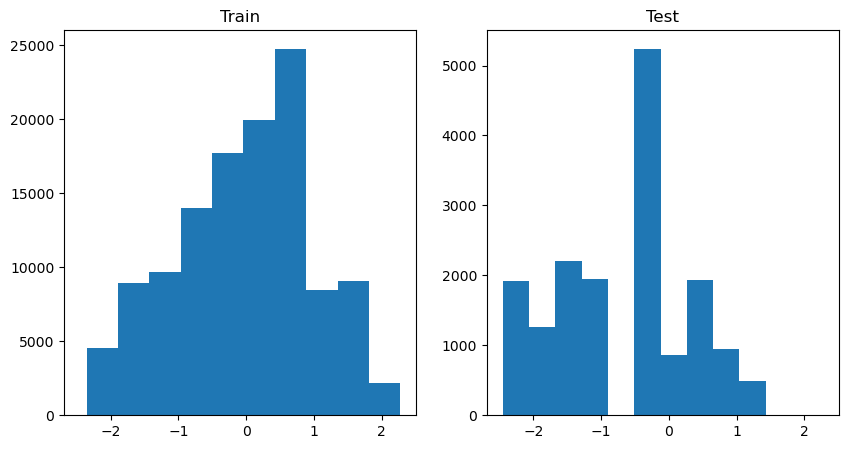

Column: Es_pFlaFlw
KS p-value: 1.411522131194426e-153


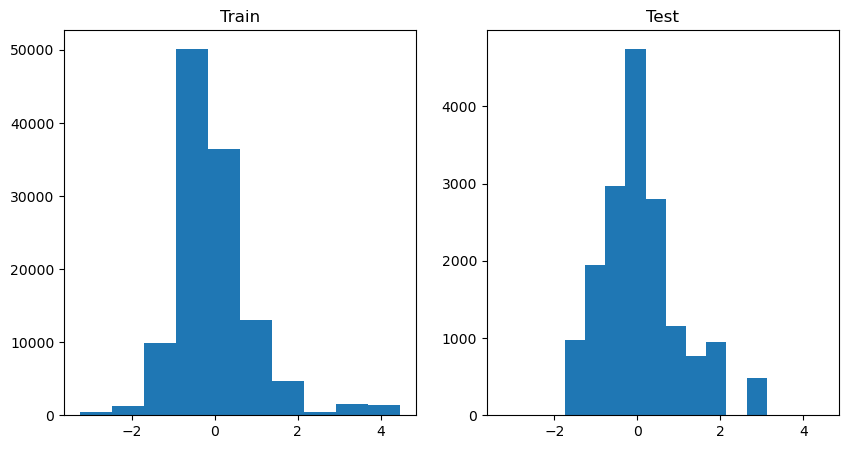

Column: Es_pFlwStG
KS p-value: 0.0


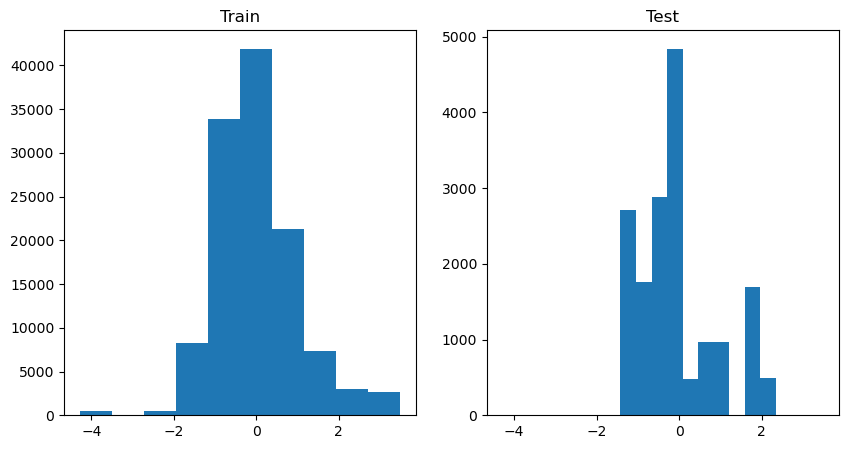

Column: Es_pStGEnG
KS p-value: 1.5448279728542233e-237


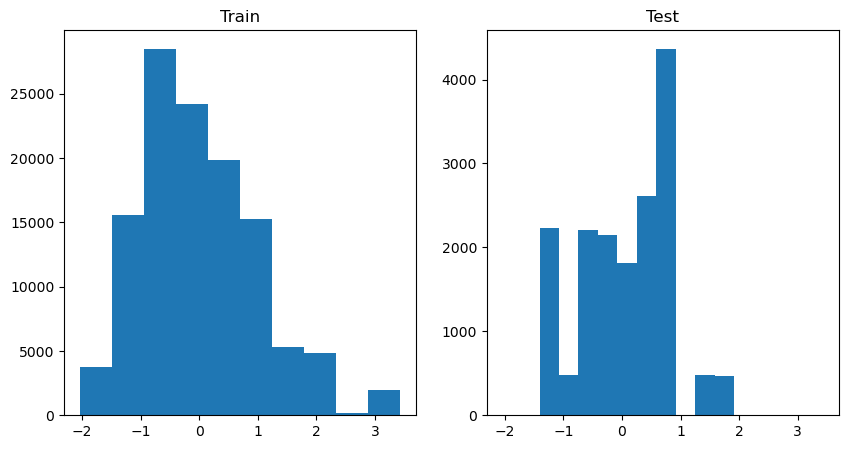

Column: Es_pEnGMat
KS p-value: 0.0


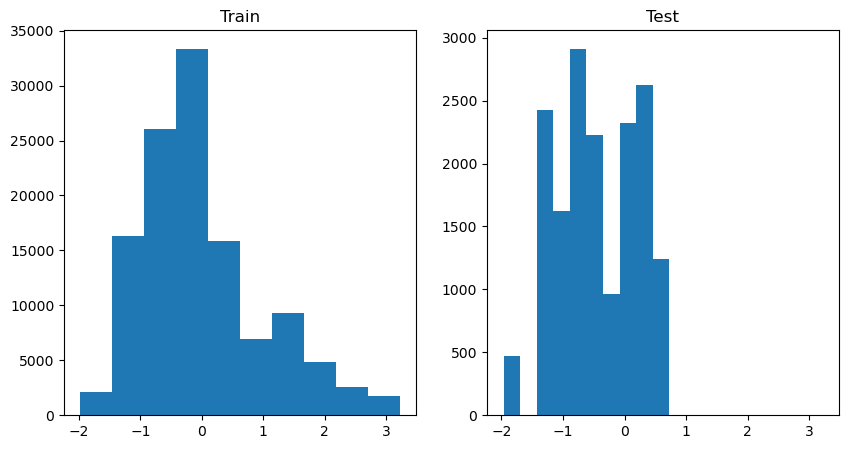

Column: Es_pMatHar
KS p-value: 0.0


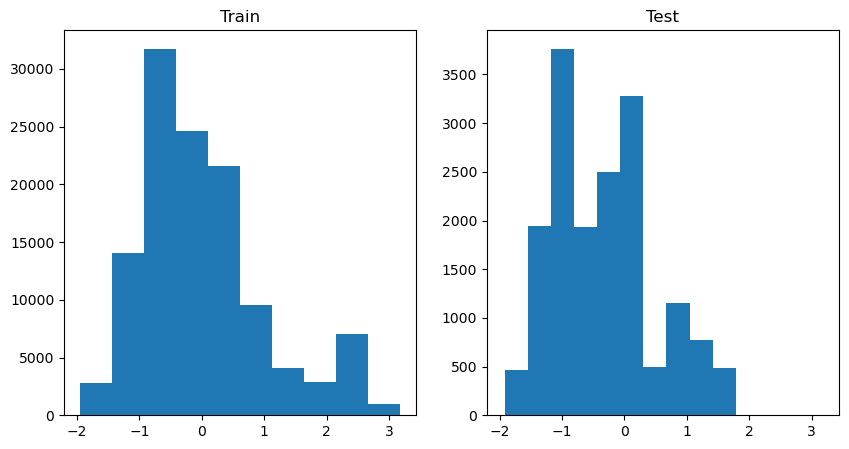

Column: ESW_pGerEme
KS p-value: 0.0


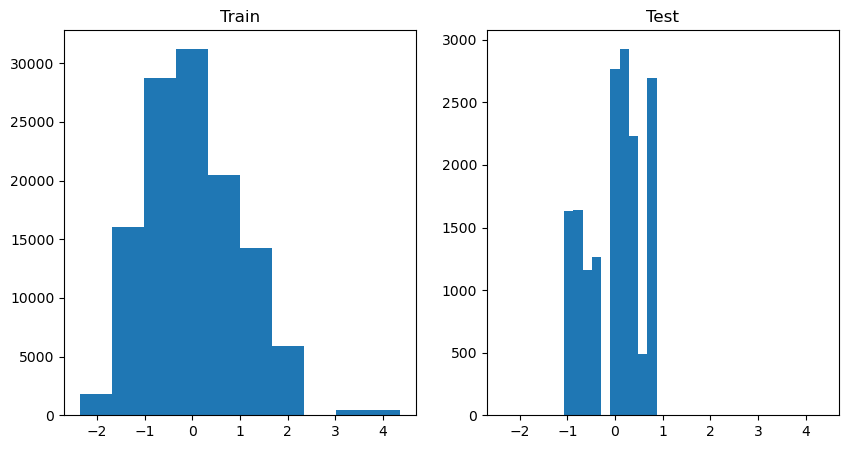

Column: ESW_pEmeEnJ
KS p-value: 0.0


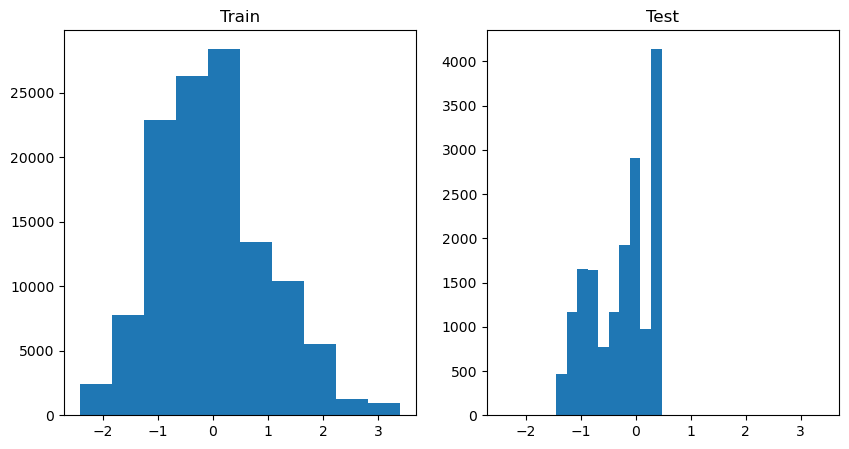

Column: ESW_pFloFla
KS p-value: 0.0


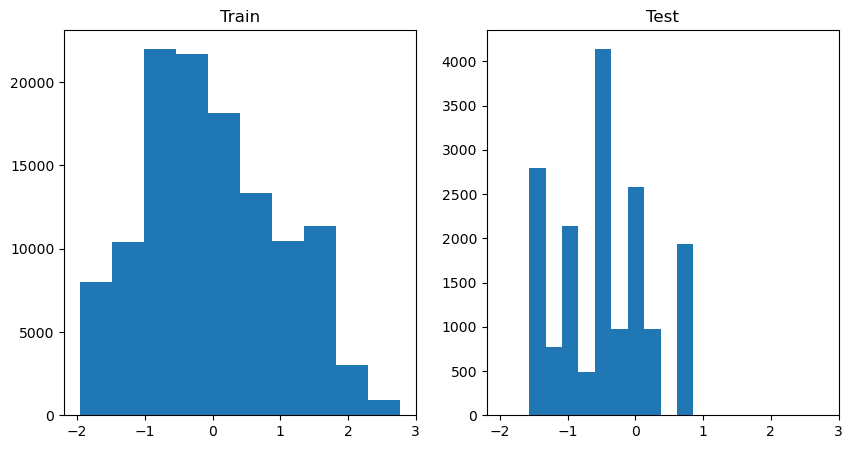

Column: ESW_pFlaFlw
KS p-value: 0.0


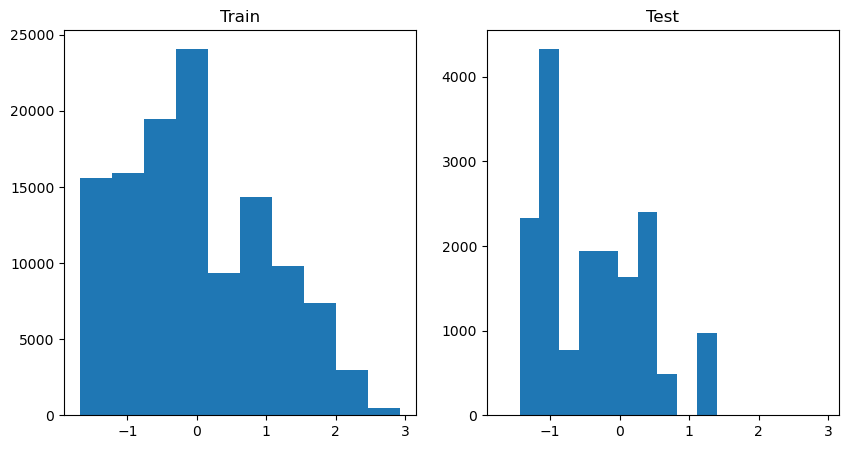

Column: ESW_pStGEnG
KS p-value: 0.0


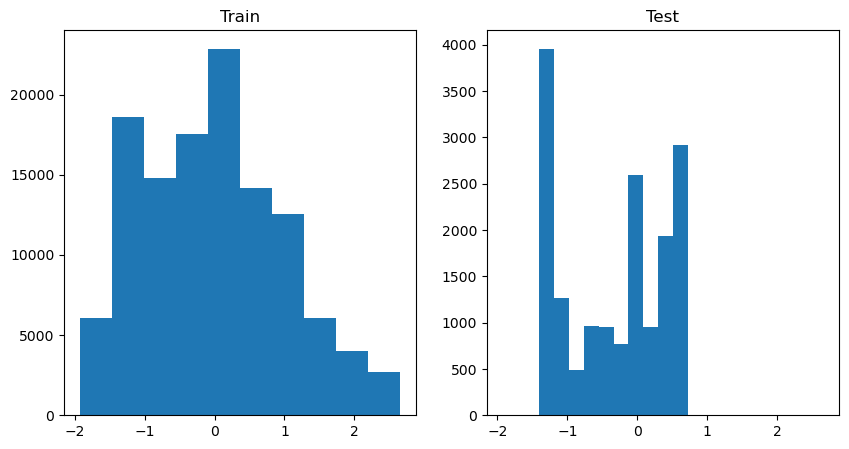

Column: ESW_pEnGMat
KS p-value: 0.0


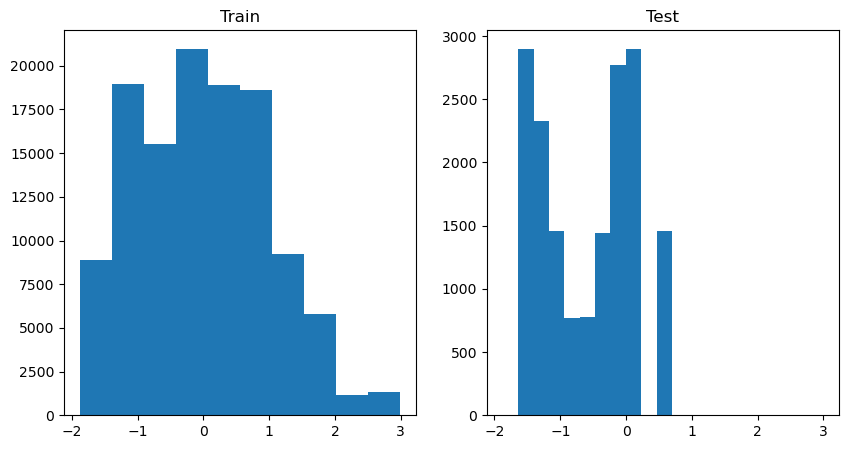

Column: Flow_pGerEme
KS p-value: 0.0


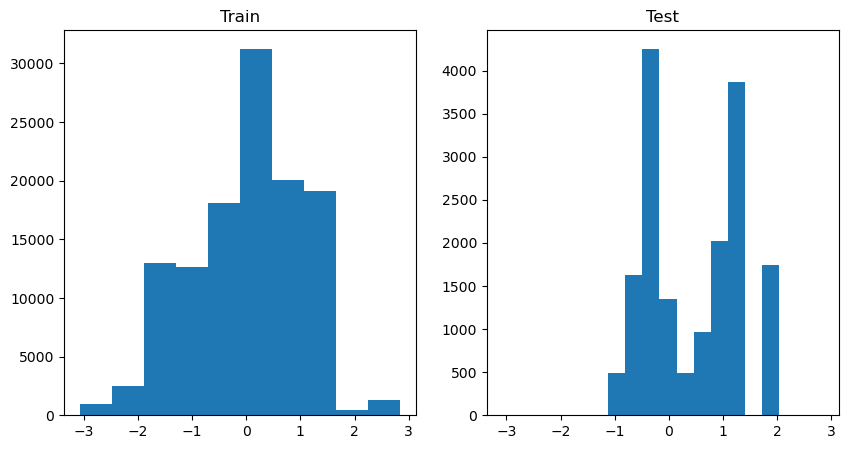

Column: Flow_pEmeEnJ
KS p-value: 0.0


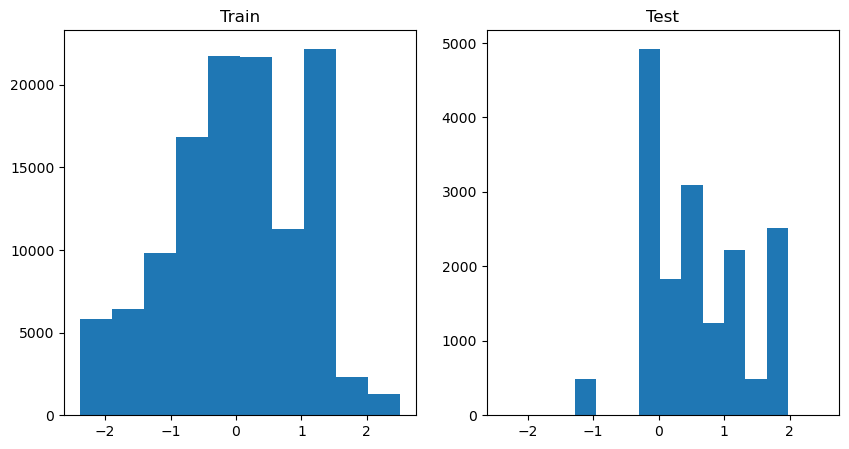

Column: Flow_pEnJFlo
KS p-value: 0.0


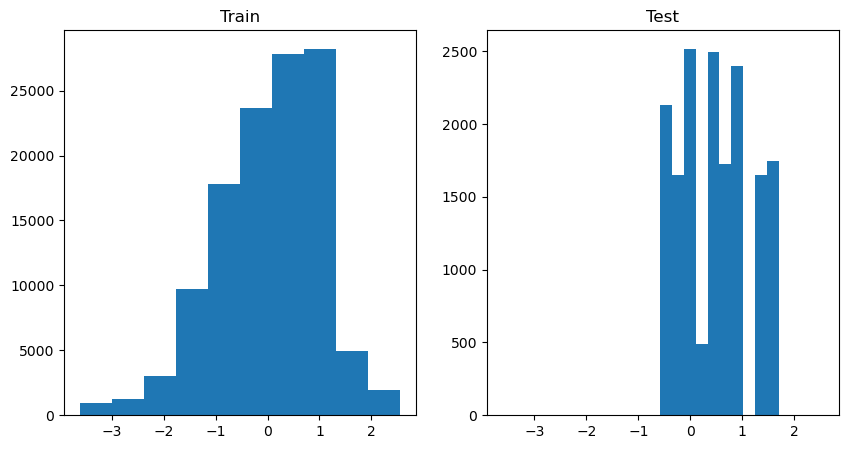

Column: Flow_pFloFla
KS p-value: 0.0


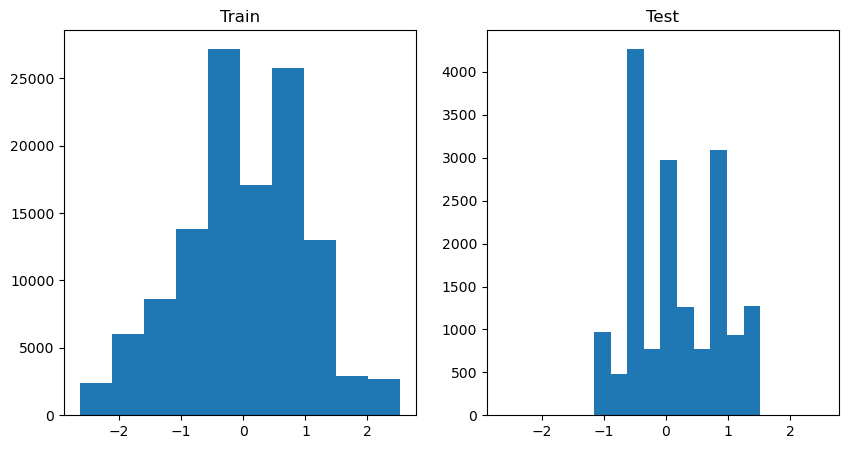

Column: Flow_pFlaFlw
KS p-value: 9.774559503218111e-302


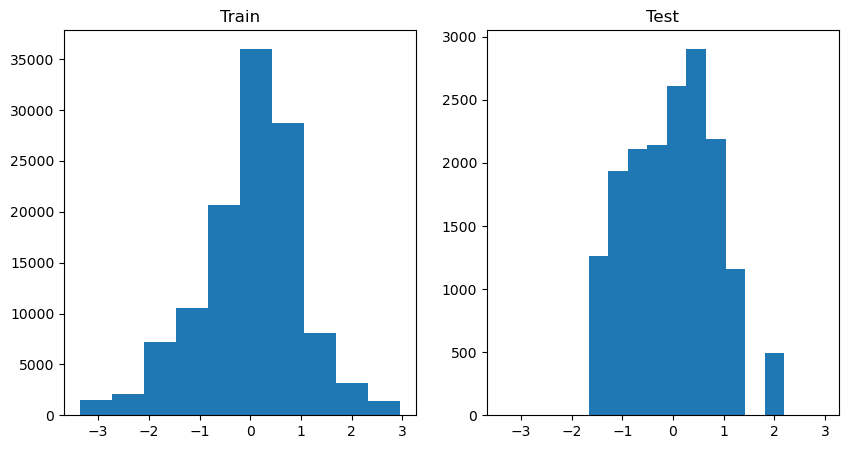

Column: Flow_pFlwStG
KS p-value: 3.176674305315888e-185


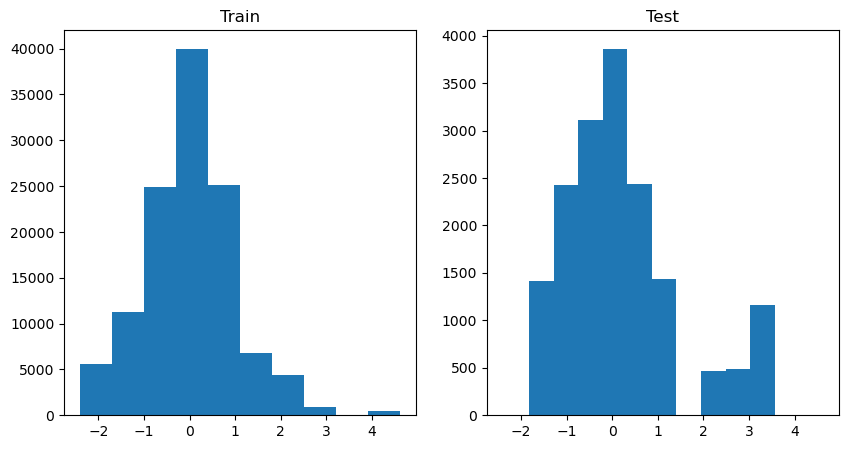

Column: Flow_pStGEnG
KS p-value: 4.3315221140877505e-119


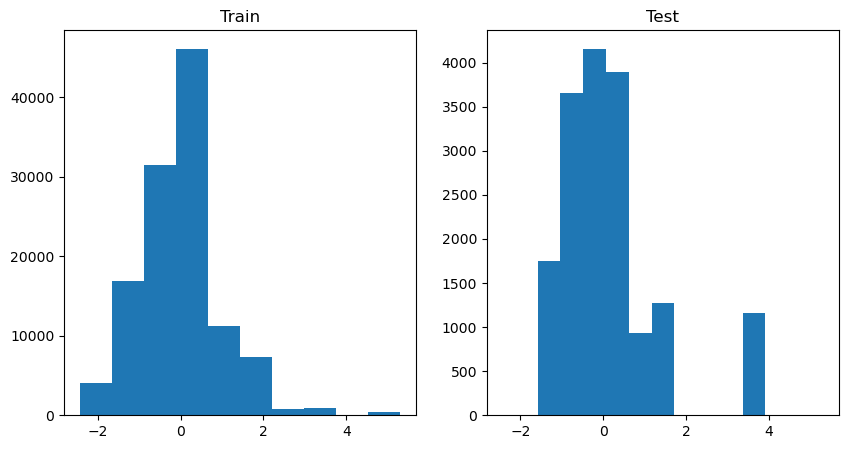

Column: Flow_pEnGMat
KS p-value: 0.0


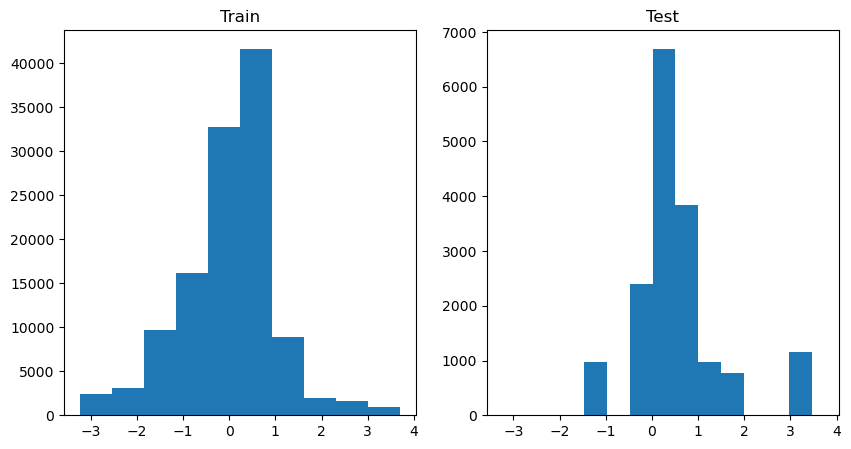

Column: Flow_pMatHar
KS p-value: 0.0


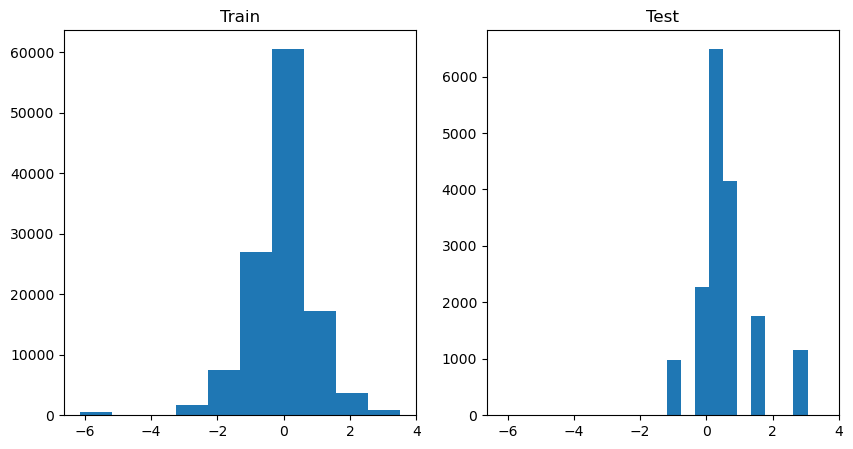

Column: FlowNO3_pGerEme
KS p-value: 5.57654223639459e-203


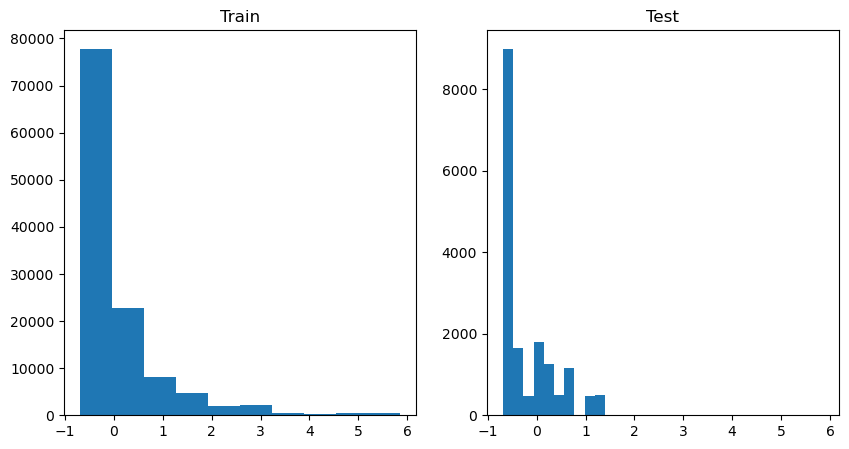

Column: FlowNO3_pEmeEnJ
KS p-value: 0.0


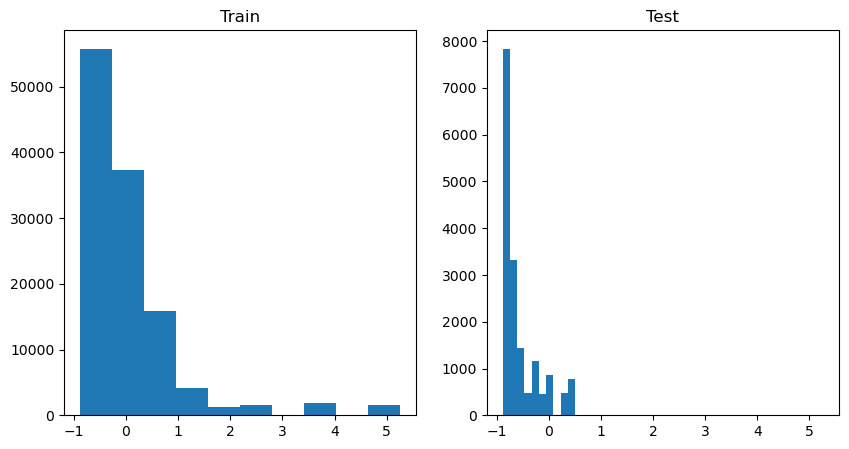

Column: FlowNO3_pEnJFlo
KS p-value: 0.0


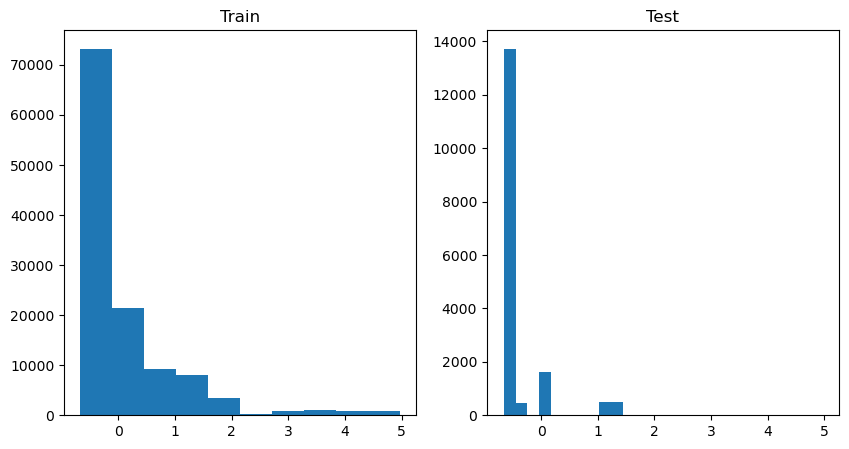

Column: FlowNO3_pFloFla
KS p-value: 0.0


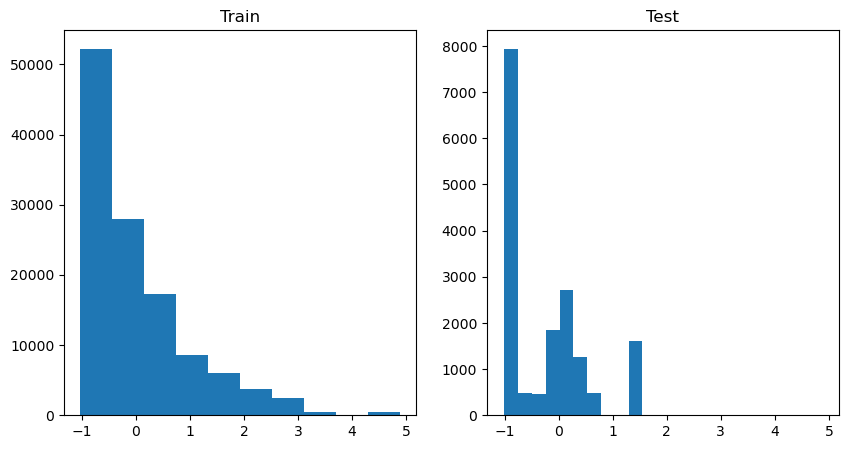

Column: FlowNO3_pFlaFlw
KS p-value: 0.0


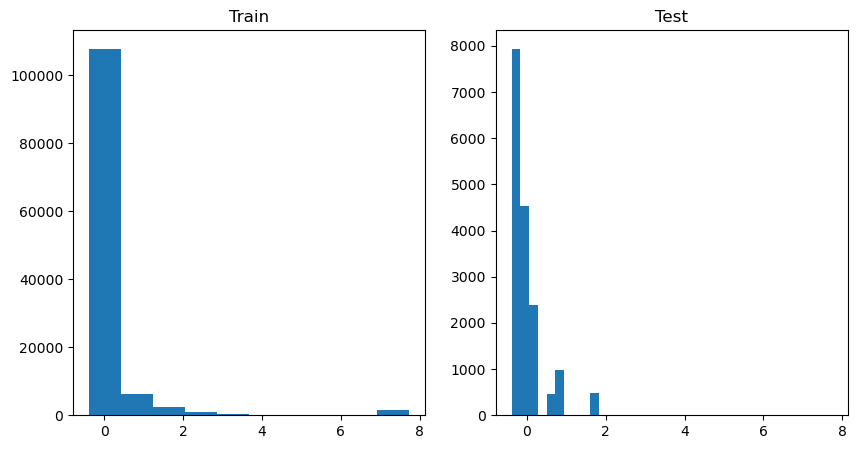

Column: FlowNO3_pFlwStG
KS p-value: 0.0


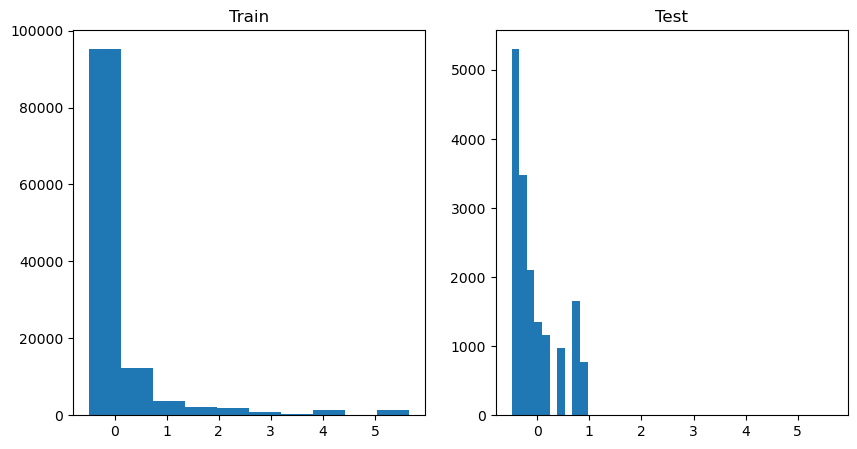

Column: FlowNO3_pStGEnG
KS p-value: 0.0


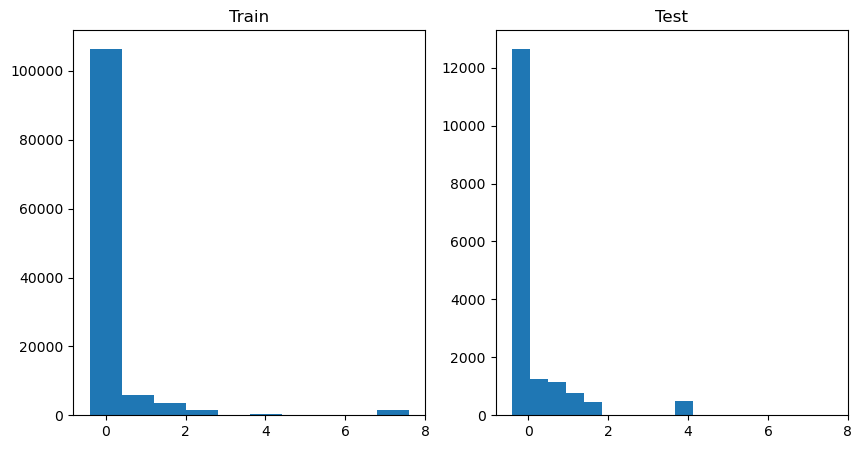

Column: Flux_pGerEme
KS p-value: 0.0


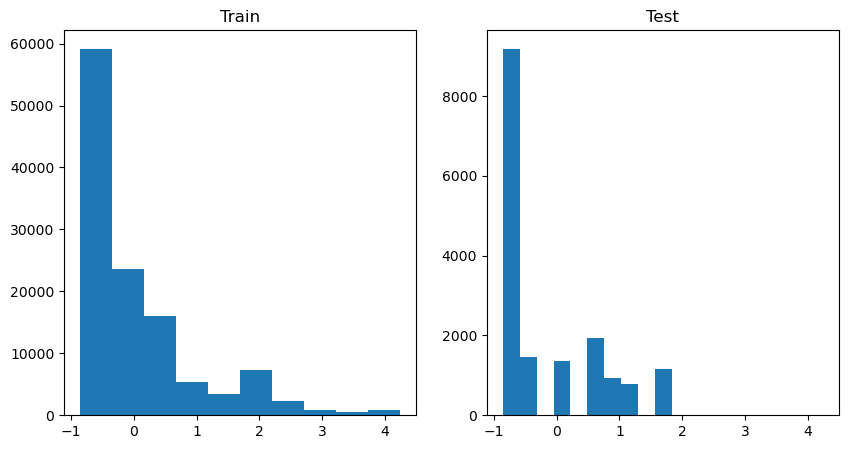

Column: Flux_pEmeEnJ
KS p-value: 0.0


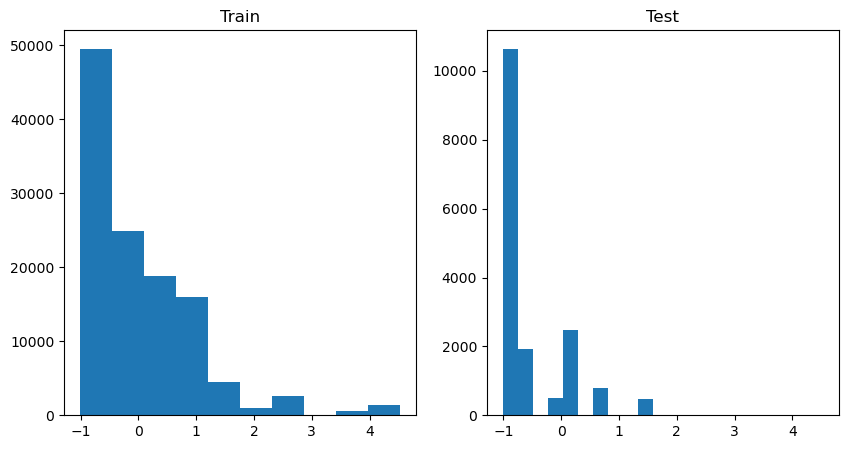

Column: Flux_pEnJFlo
KS p-value: 0.0


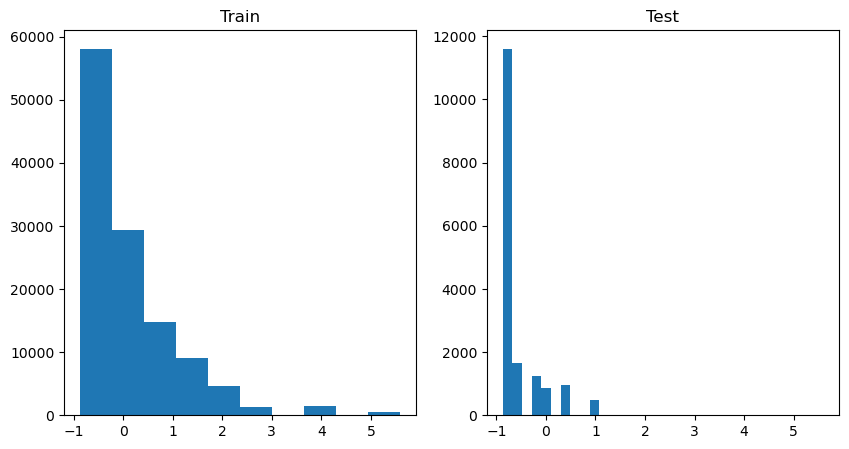

Column: Flux_pFlaFlw
KS p-value: 0.0


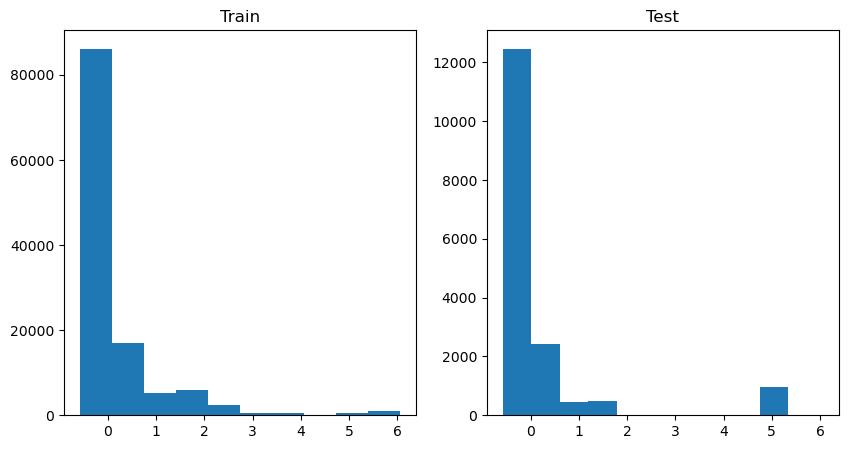

Column: Flux_pFlwStG
KS p-value: 0.0


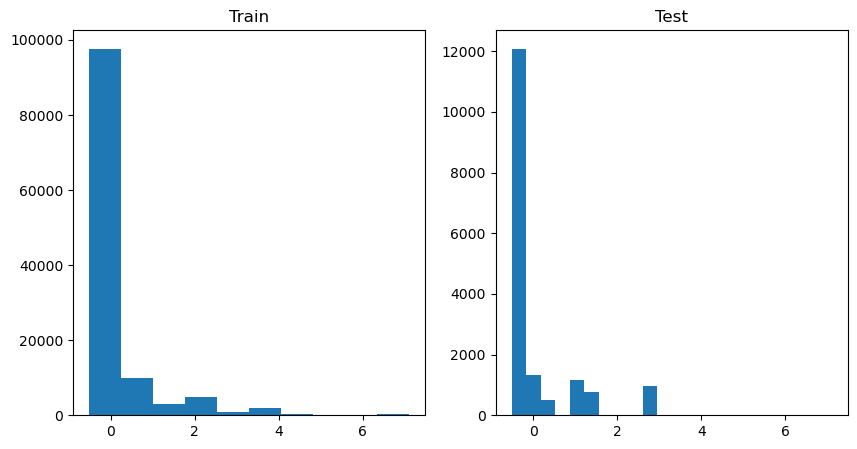

Column: Flux_pEnGMat
KS p-value: 0.0


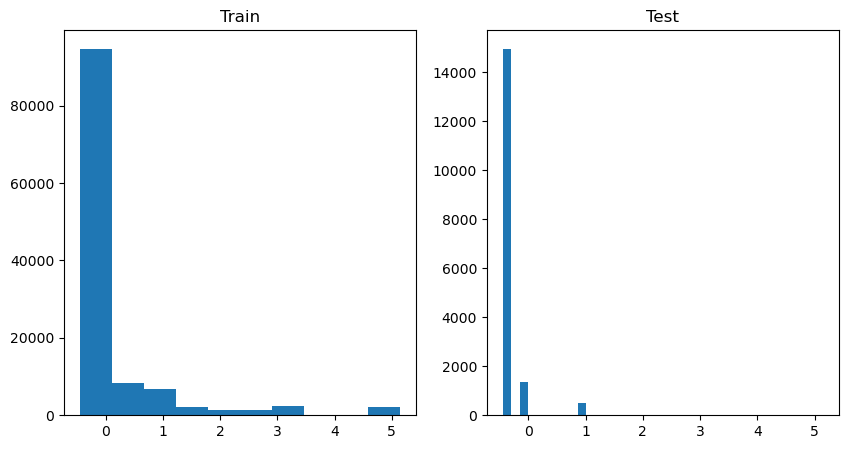

Column: Infiltration_pGerEme
KS p-value: 0.0


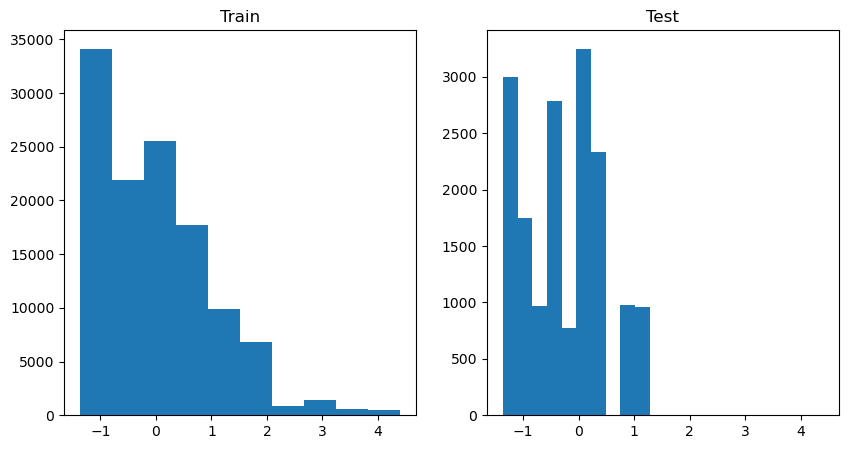

Column: Infiltration_pEmeEnJ
KS p-value: 0.0


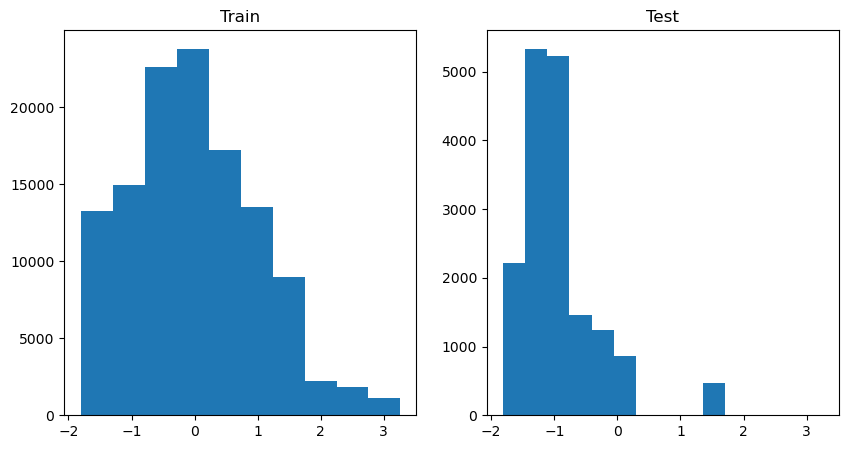

Column: Infiltration_pEnJFlo
KS p-value: 1.0257605512663093e-225


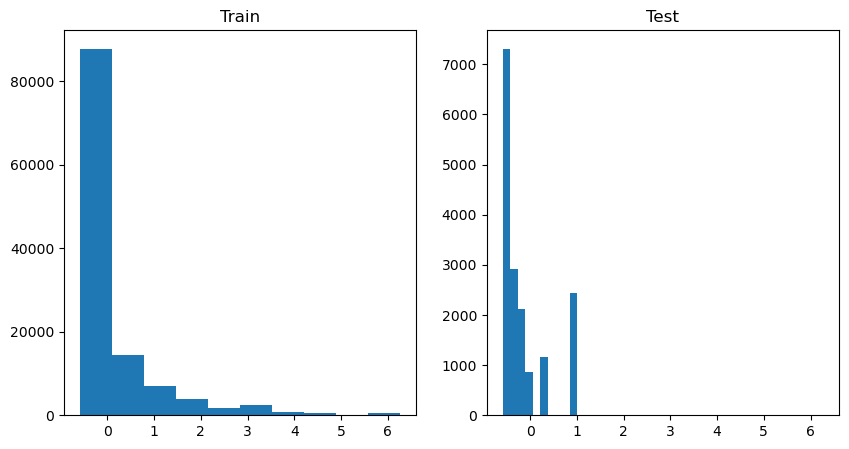

Column: Infiltration_pFloFla
KS p-value: 0.0


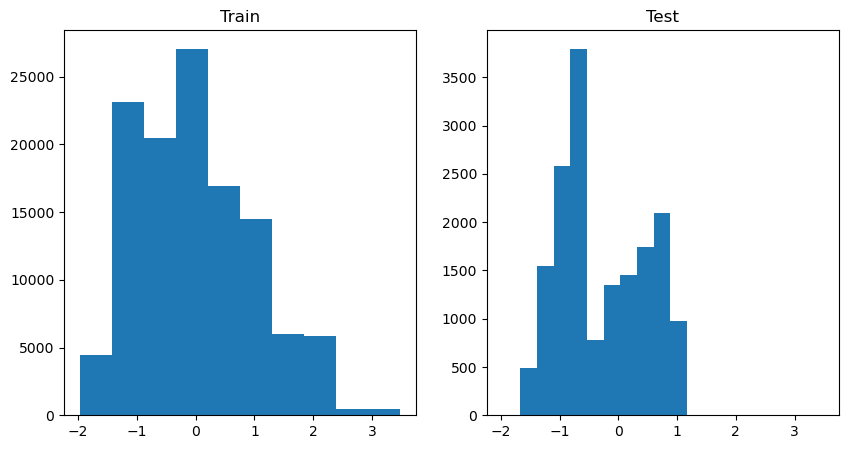

Column: Infiltration_pFlaFlw
KS p-value: 7.887196554391586e-231


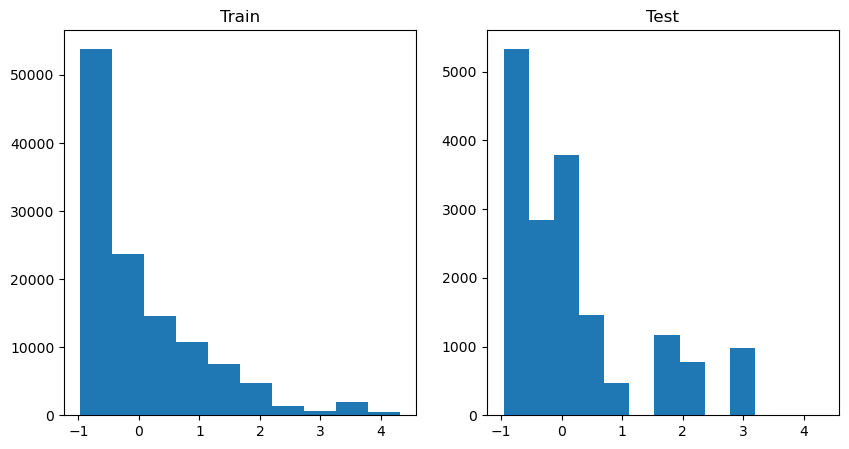

Column: Infiltration_pFlwStG
KS p-value: 5.430176679759544e-213


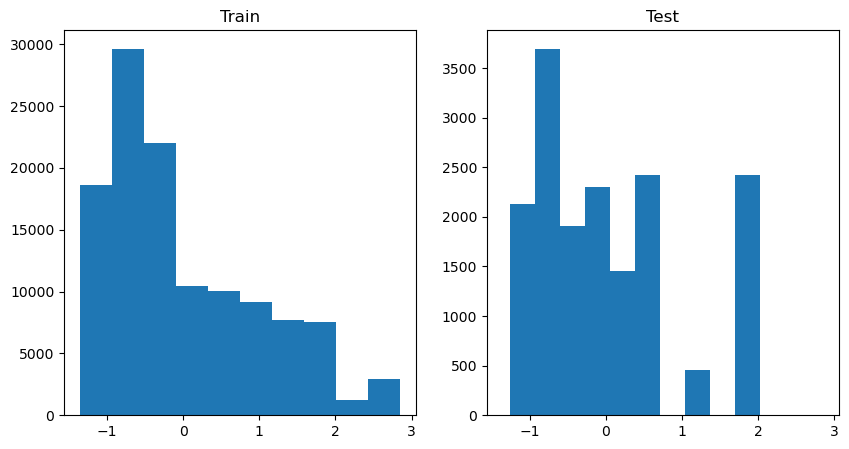

Column: Infiltration_pStGEnG
KS p-value: 0.0


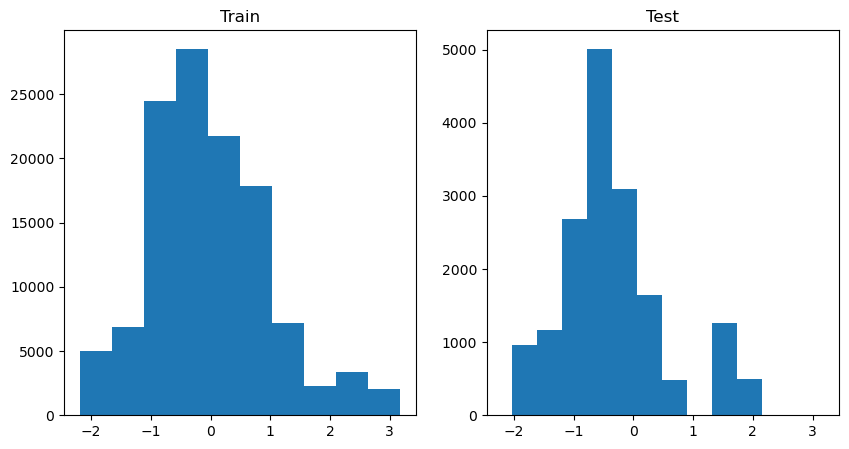

Column: Infiltration_pEnGMat
KS p-value: 0.0


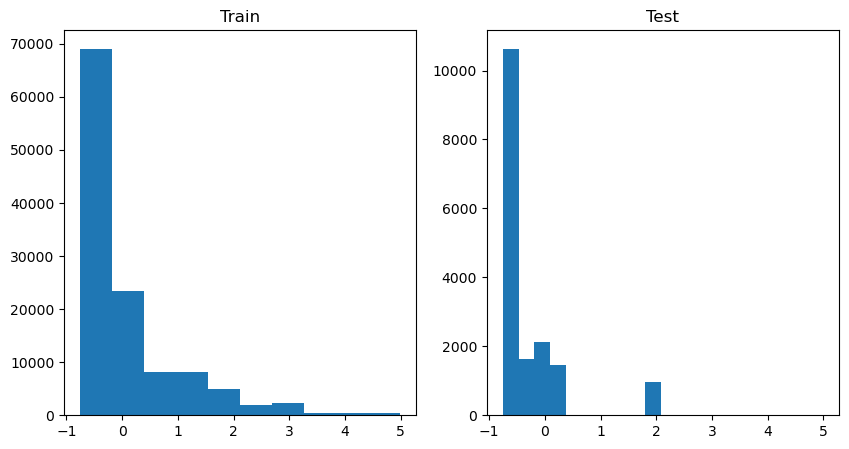

Column: Infiltration_pMatHar
KS p-value: 0.0


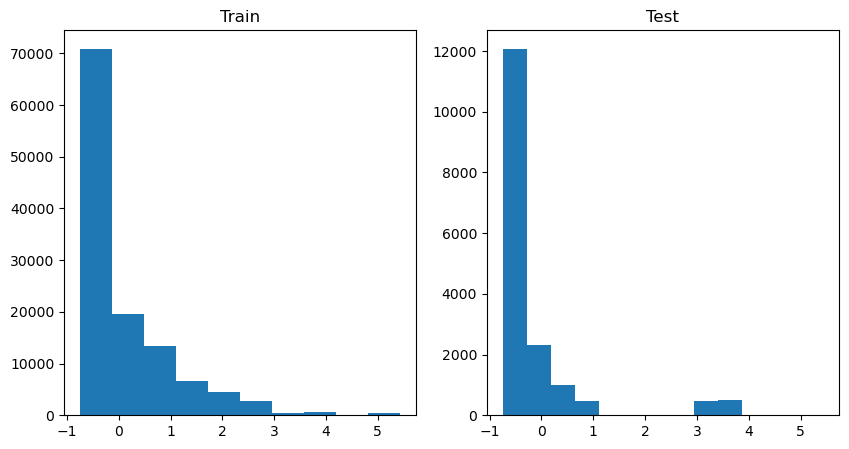

Column: Runoff_pGerEme
KS p-value: 0.0


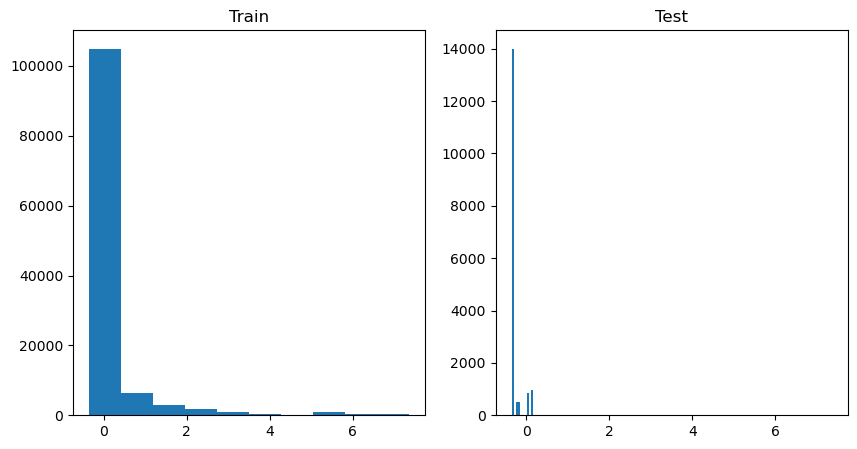

Column: Runoff_pEmeEnJ
KS p-value: 0.0


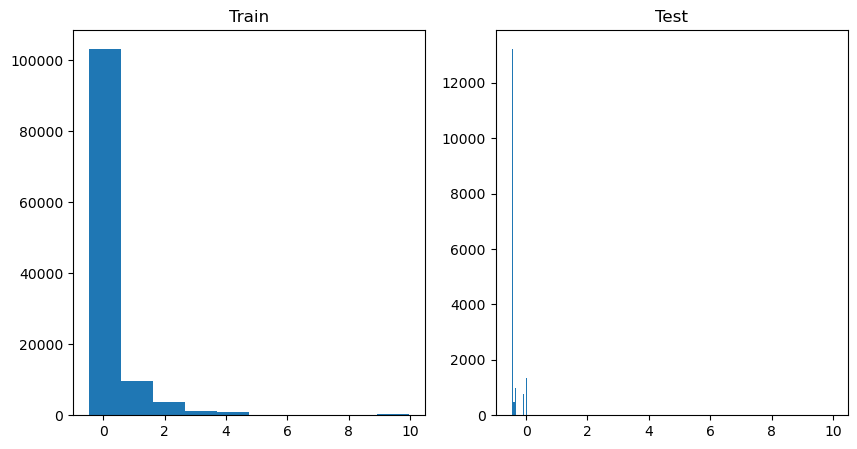

Column: Runoff_pEnJFlo
KS p-value: 1.5382763138905743e-46


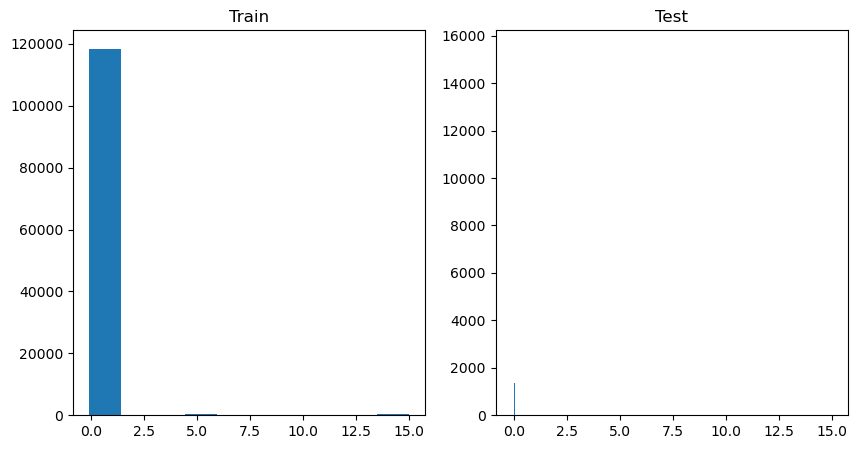

Column: Runoff_pFloFla
KS p-value: 0.0


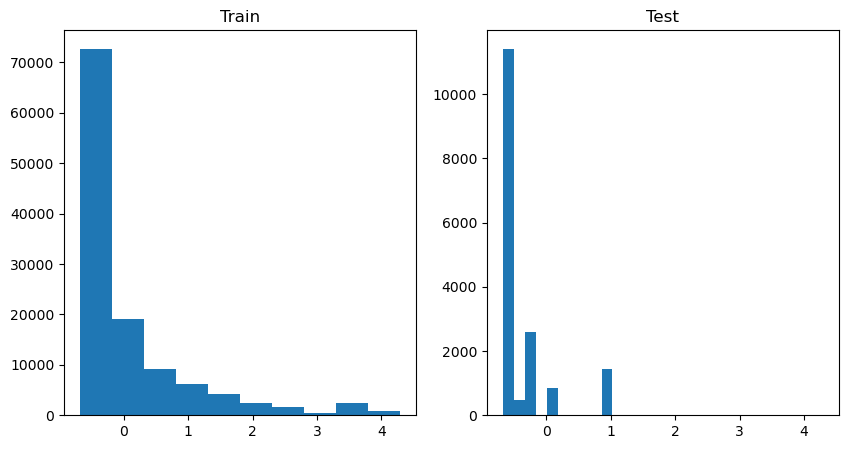

Column: Runoff_pFlaFlw
KS p-value: 2.121757482445942e-119


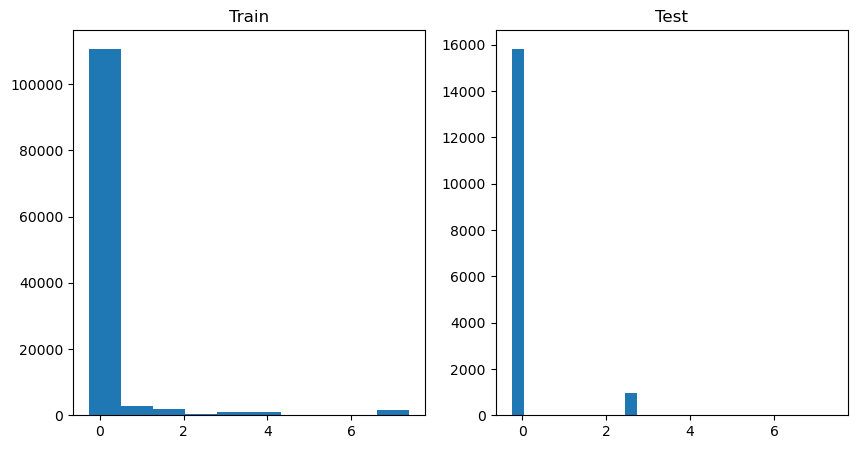

Column: Runoff_pFlwStG
KS p-value: 3.913746364583352e-214


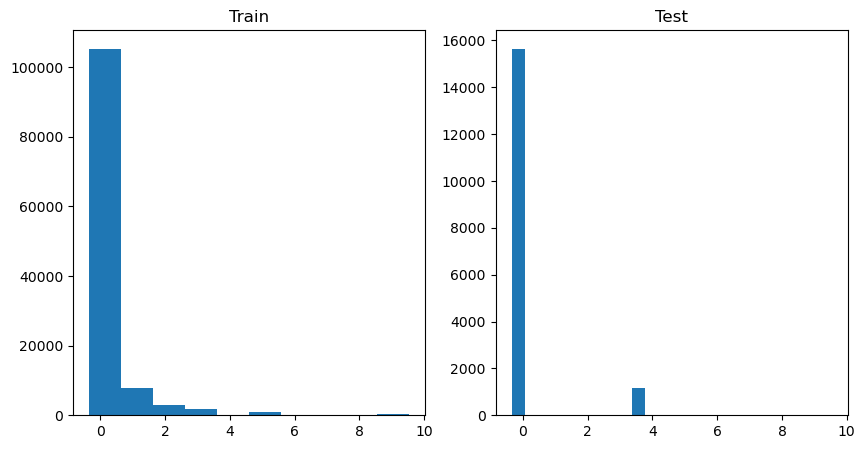

Column: Runoff_pStGEnG
KS p-value: 1.467116213149514e-259


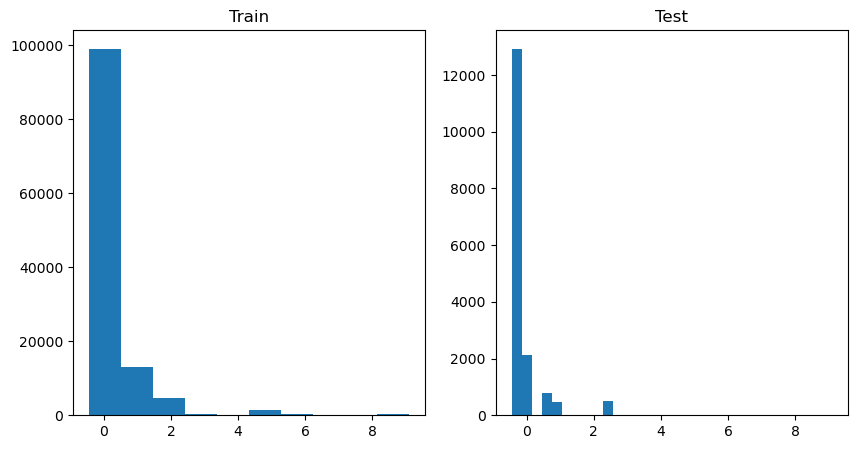

Column: Runoff_pEnGMat
KS p-value: 2.071251565975751e-108


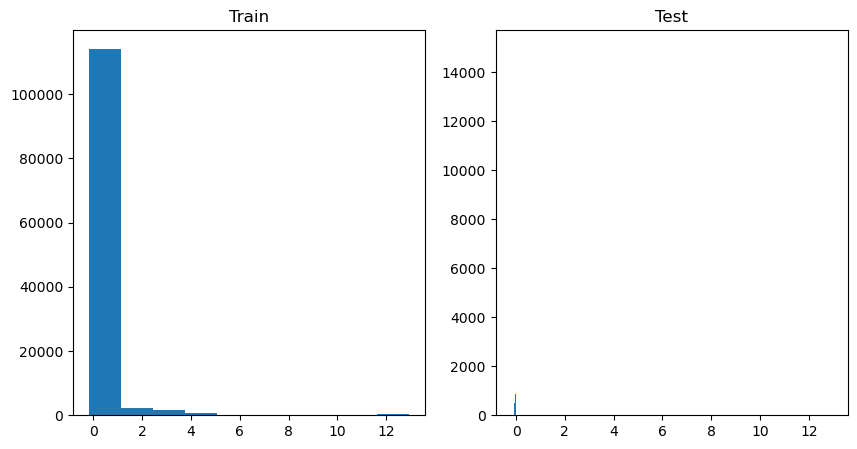

Column: Runoff_pMatHar
KS p-value: 5.358584317416683e-66


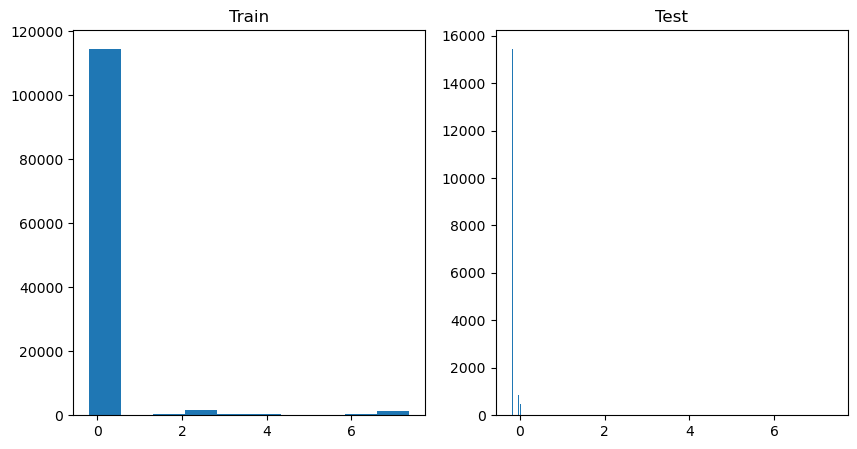

Column: SWmm_pFloFla
KS p-value: 0.0


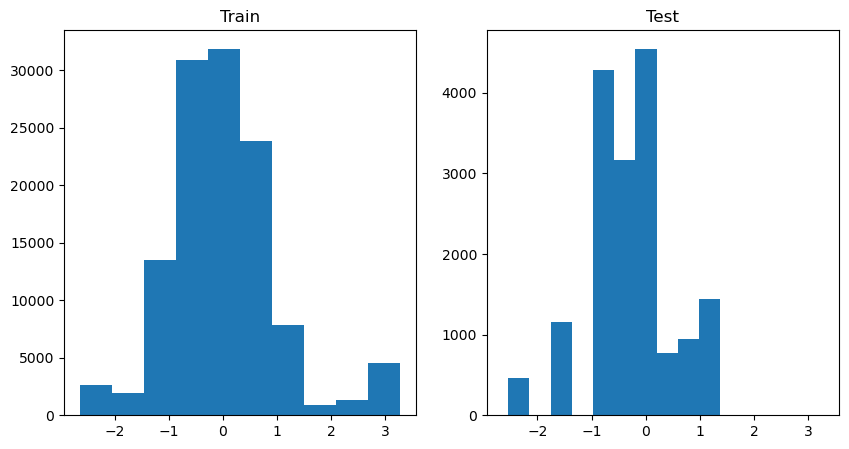

Column: T_pGerEme
KS p-value: 6.153925241209839e-248


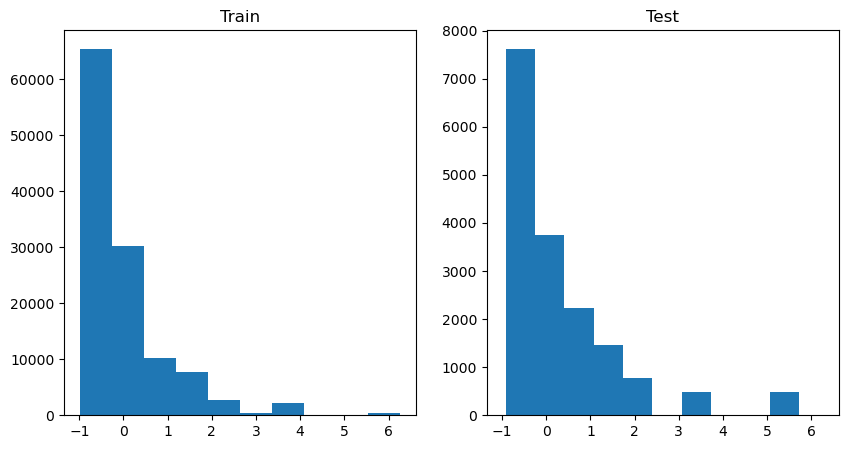

Column: T_pEmeEnJ
KS p-value: 0.0


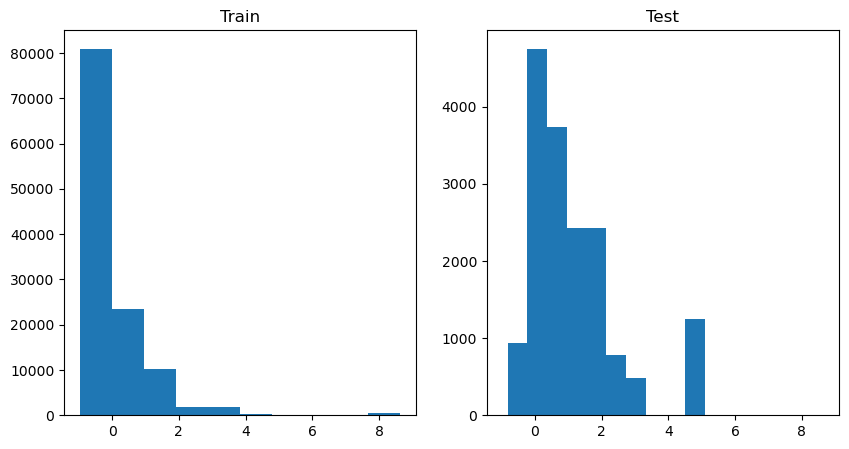

Column: T_pEnJFlo
KS p-value: 0.0


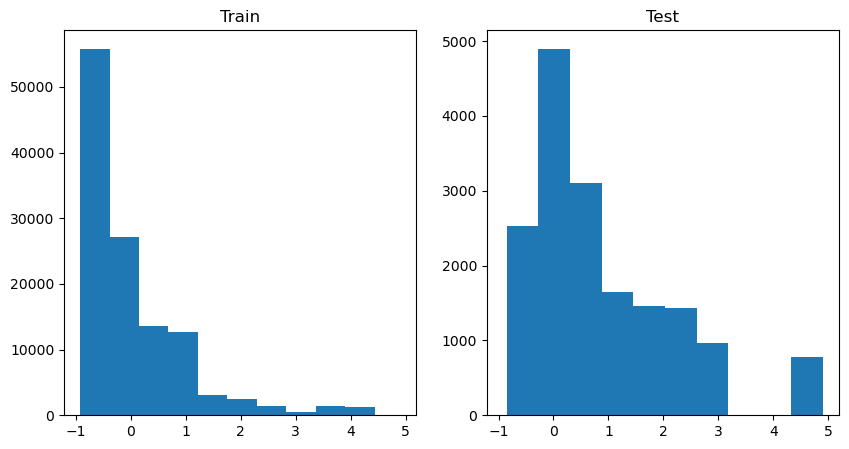

Column: T_pFloFla
KS p-value: 0.0


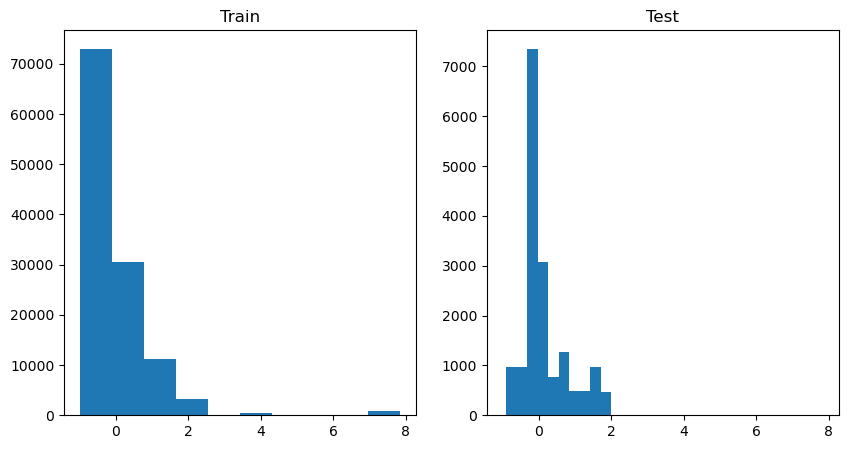

Column: T_pFlaFlw
KS p-value: 0.0


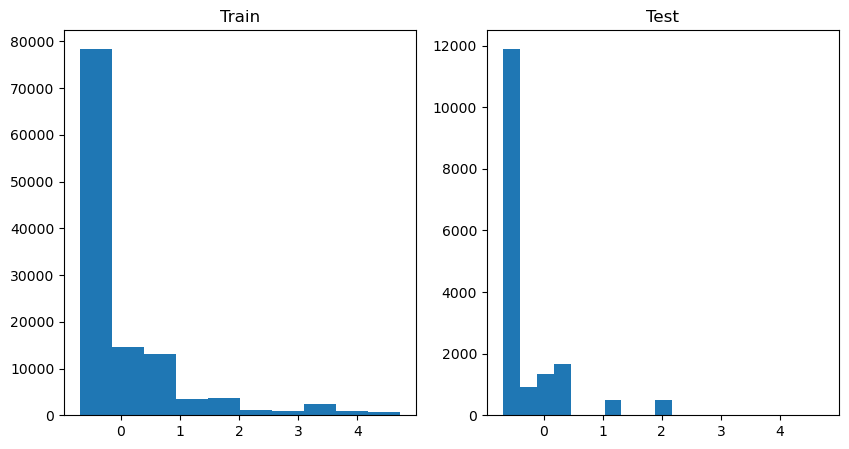

Column: T_pFlwStG
KS p-value: 0.0


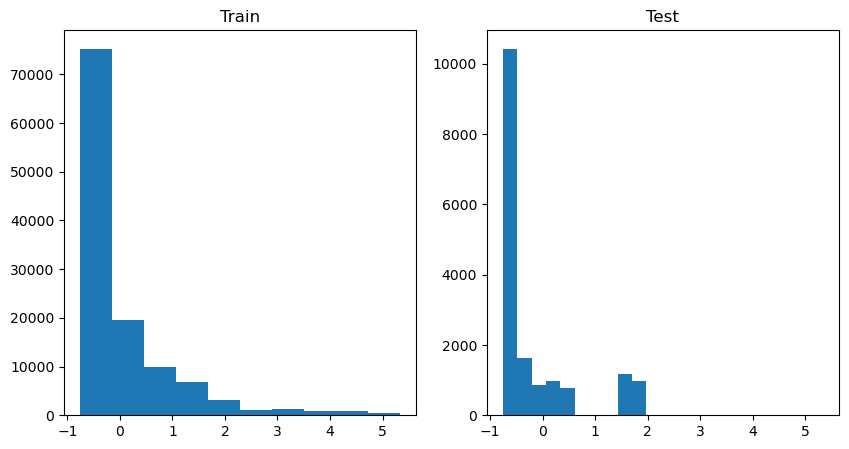

Column: T_pStGEnG
KS p-value: 0.0


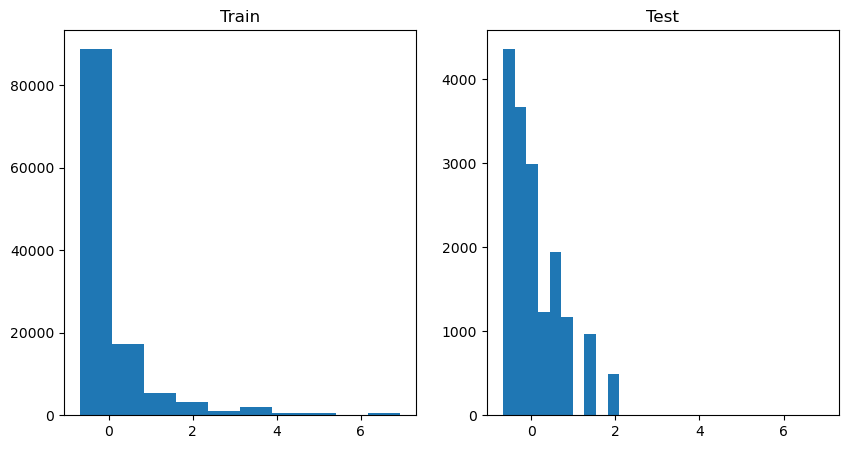

Column: T_pEnGMat
KS p-value: 0.0


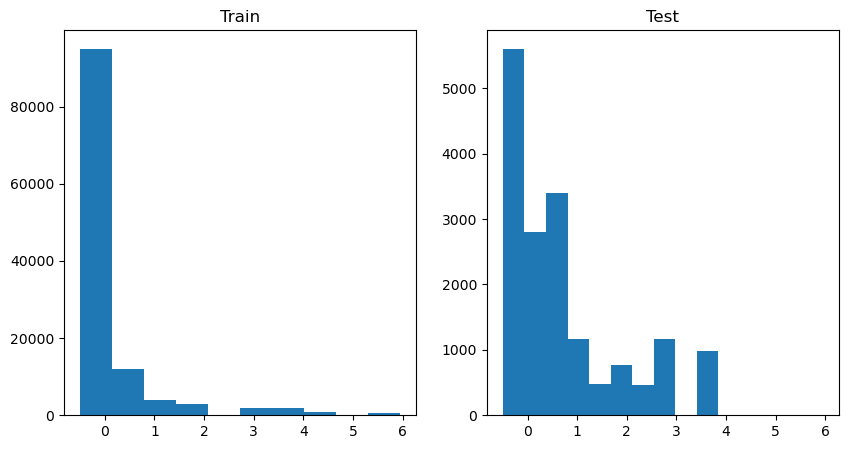

Column: WaterTable_pGerEme
KS p-value: 7.272258957857674e-14


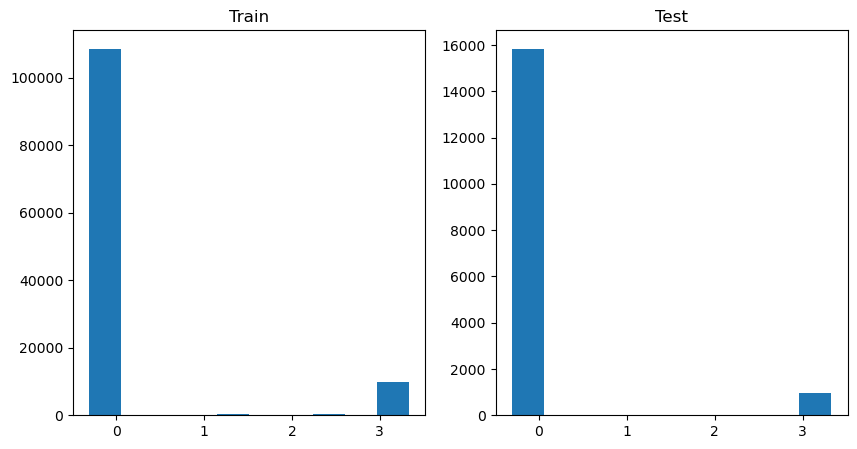

Column: WaterTable_pEmeEnJ
KS p-value: 8.872216755213348e-45


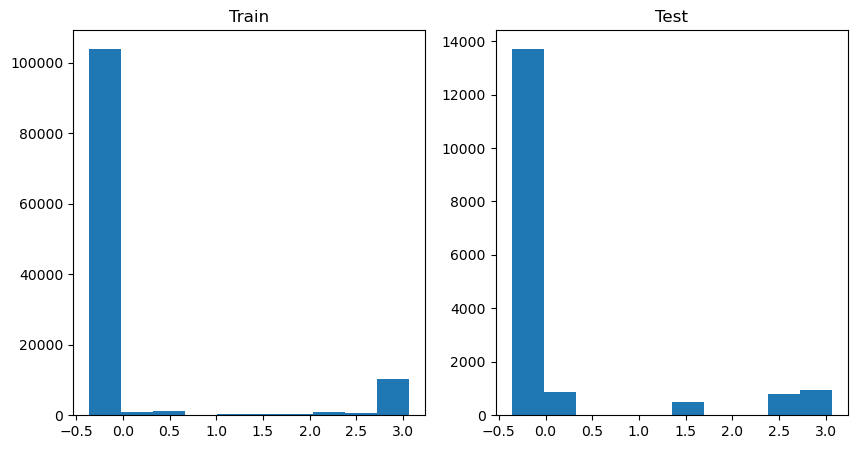

Column: WaterTable_pEnJFlo
KS p-value: 1.7824839639024062e-34


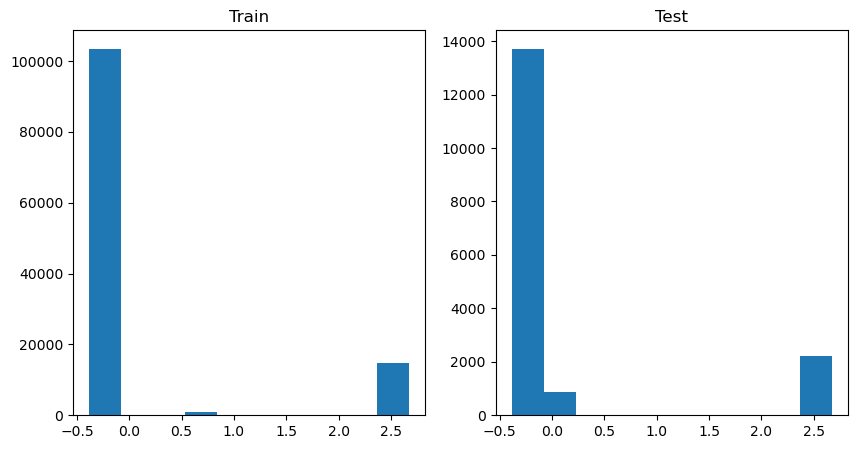

Column: WaterTable_pFloFla
KS p-value: 3.671360547996733e-96


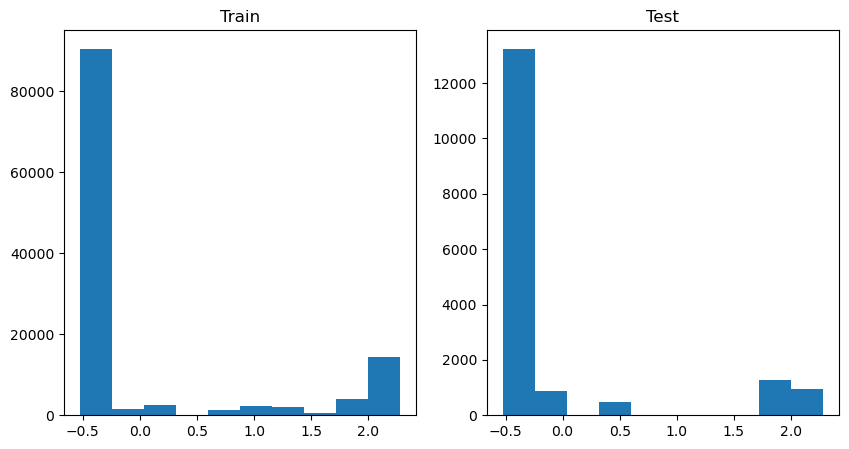

Column: WaterTable_pFlaFlw
KS p-value: 0.0


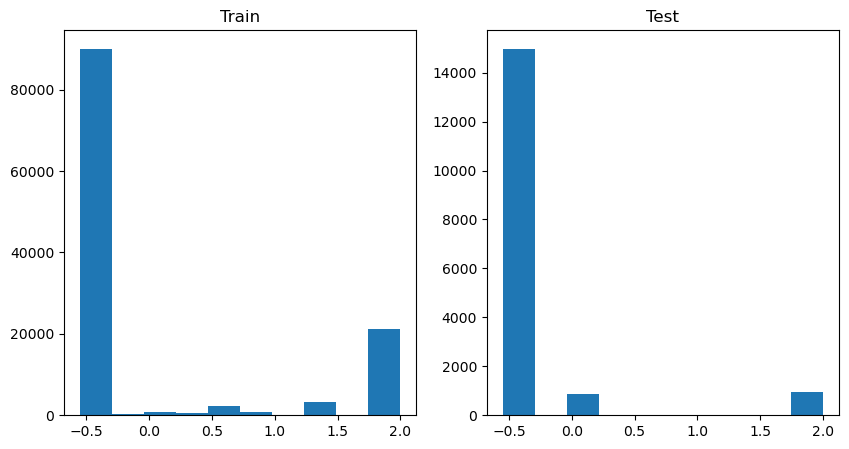

Column: WaterTable_pFlwStG
KS p-value: 2.14854100763901e-177


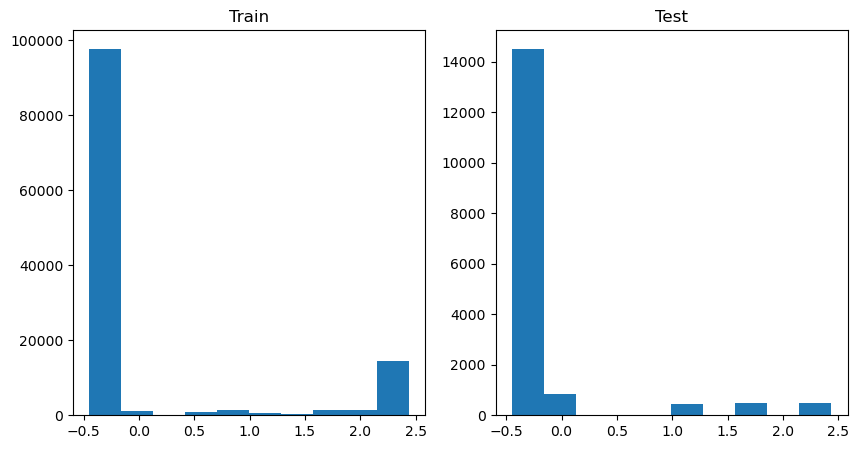

Column: WaterTable_pStGEnG
KS p-value: 1.8305835222431675e-53


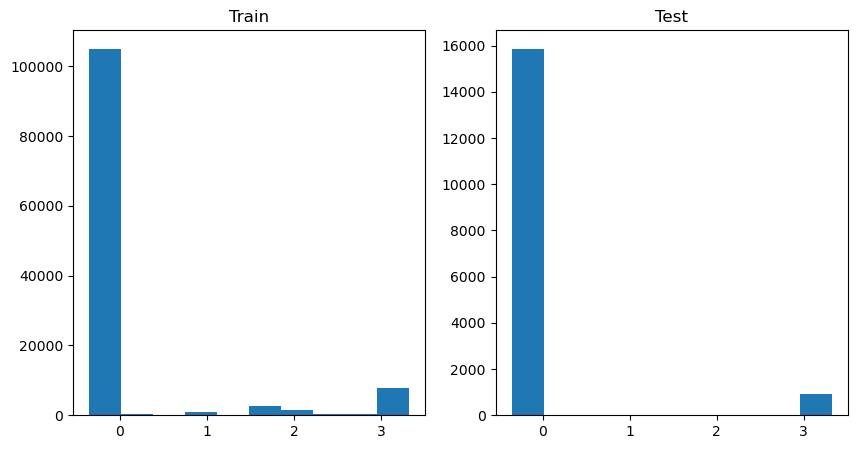

Column: WaterTable_pEnGMat
KS p-value: 1.3591000187056382e-41


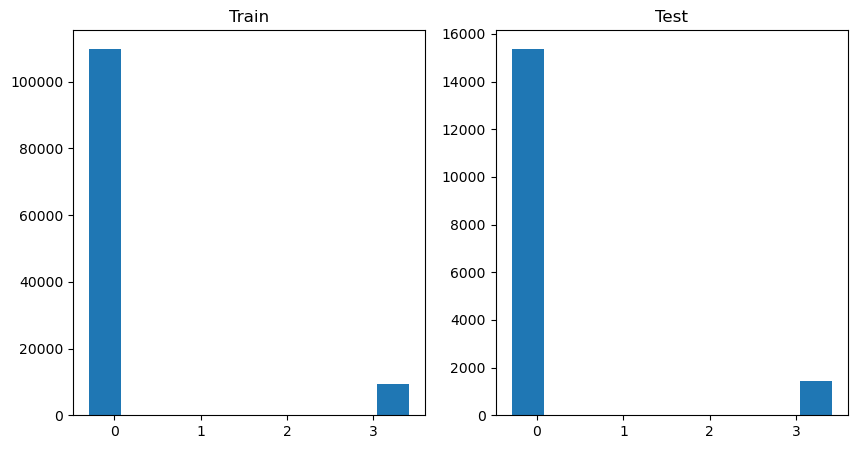

Column: CoverGreen_pGerEme
KS p-value: 0.0


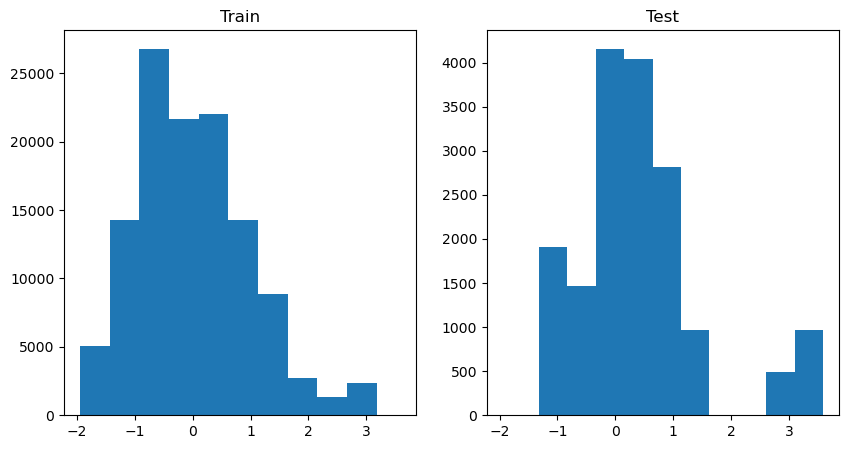

Column: CoverGreen_pEnJFlo
KS p-value: 0.0


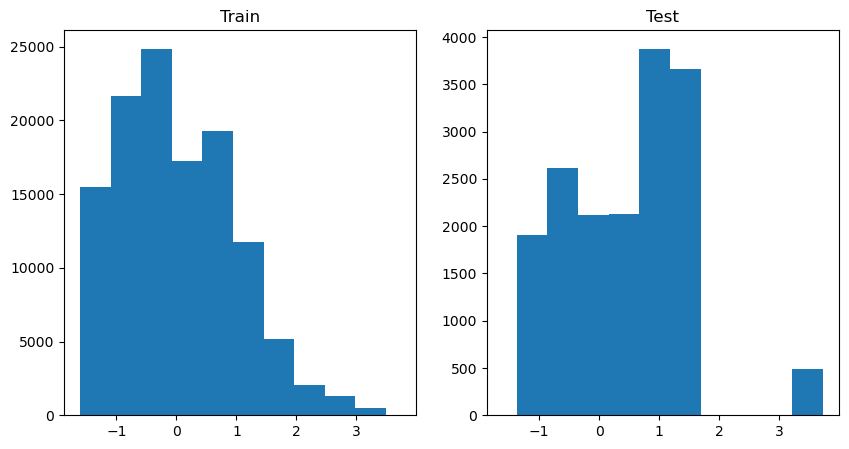

Column: CoverGreen_pFloFla
KS p-value: 0.0


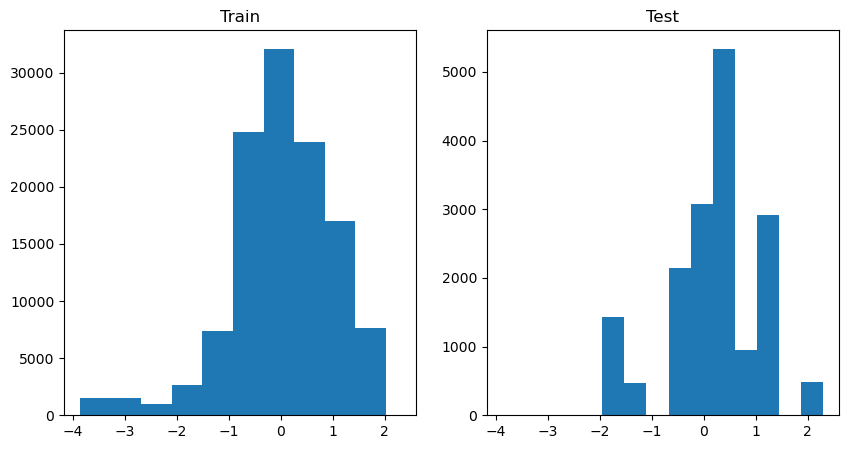

Column: CoverGreen_pFlaFlw
KS p-value: 4.098827718306826e-184


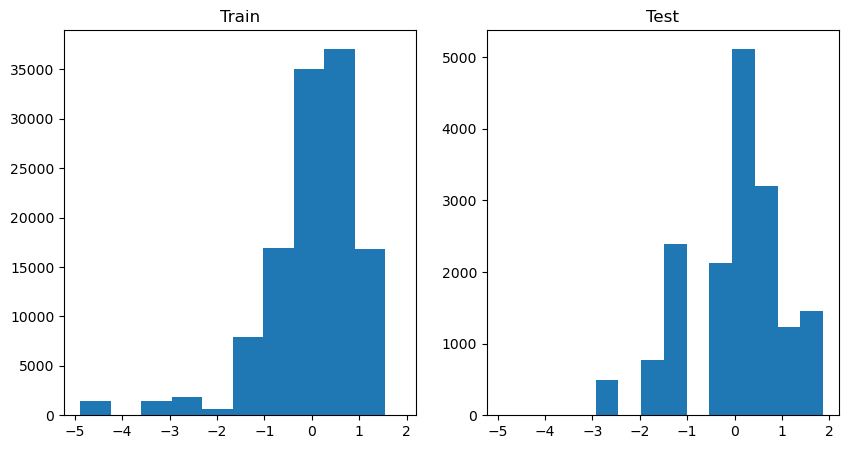

Column: CoverGreen_pStGEnG
KS p-value: 0.0


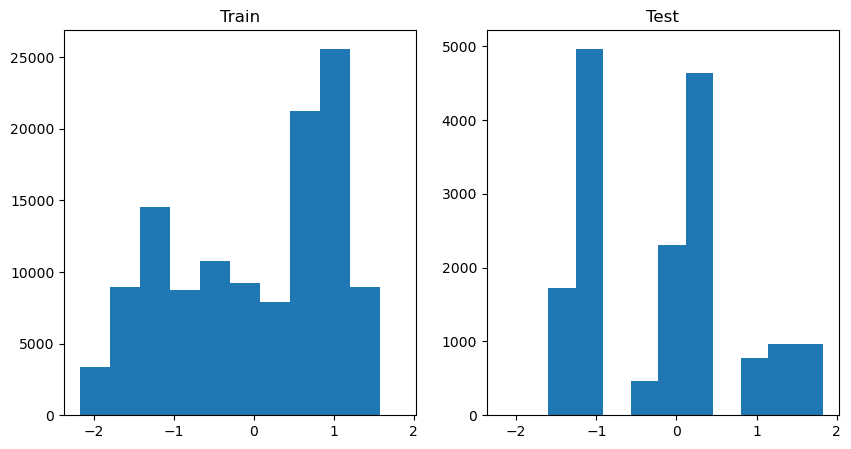

Column: CoverGreen_pEnGMat
KS p-value: 0.0


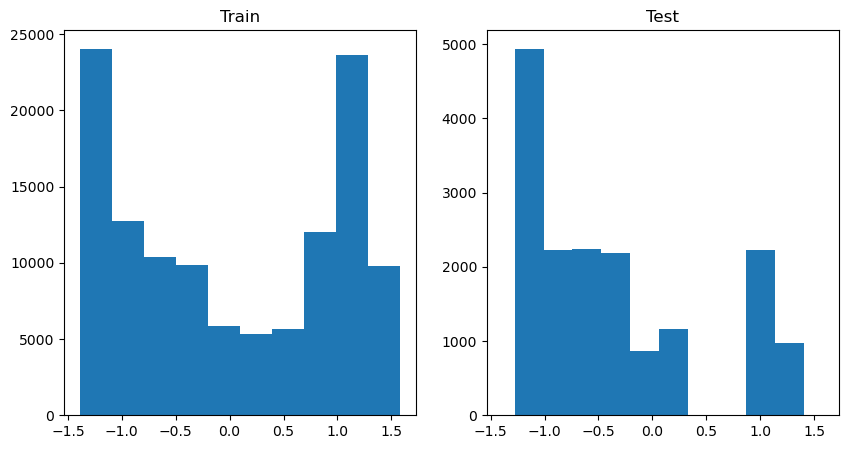

Column: LAI_pFlaFlw
KS p-value: 0.0


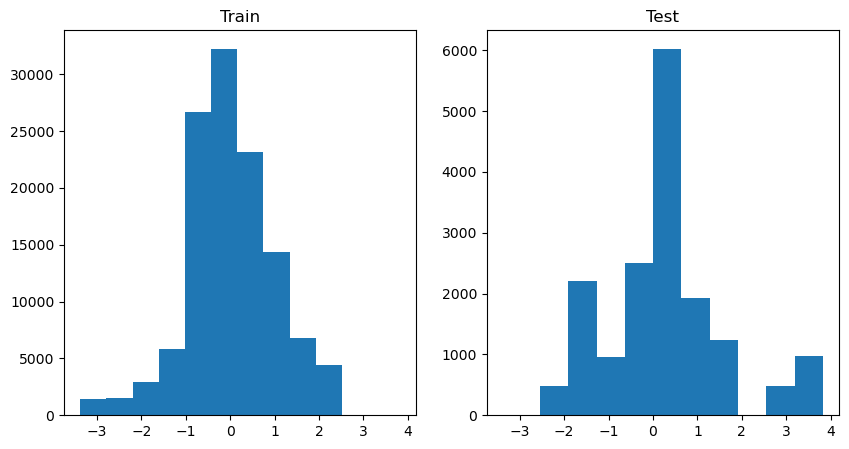

Column: AccumulatedTT_pGerEme
KS p-value: 0.0


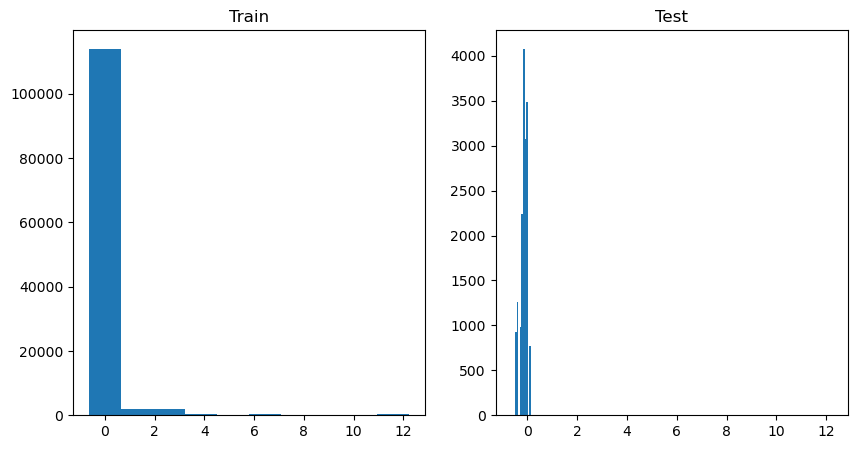

Column: AccumulatedTT_pEmeEnJ
KS p-value: 0.0


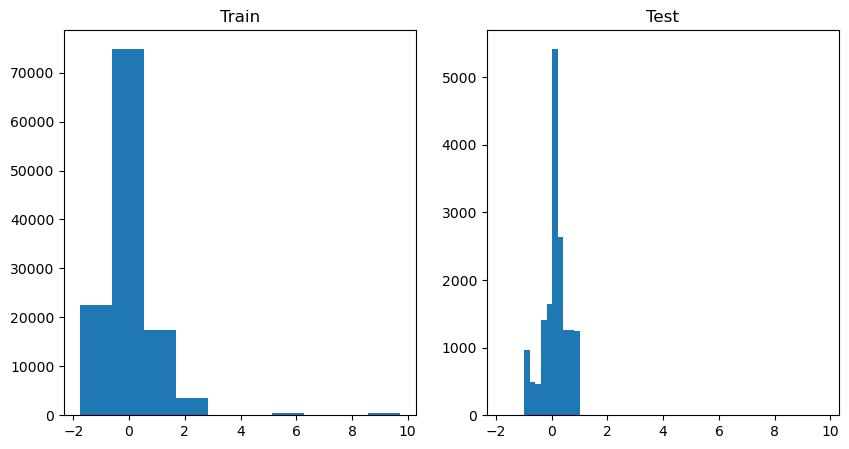

Column: AccumulatedTT_pFlaFlw
KS p-value: 0.0


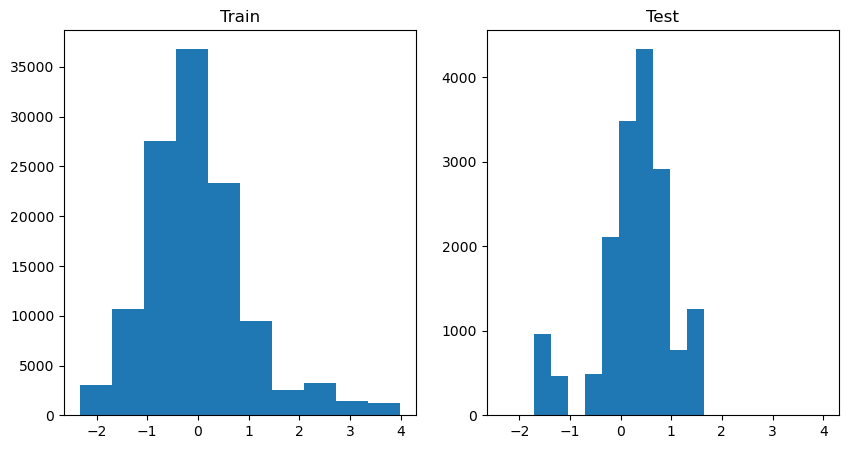

Column: ESW_pGerEme_1
KS p-value: 0.0


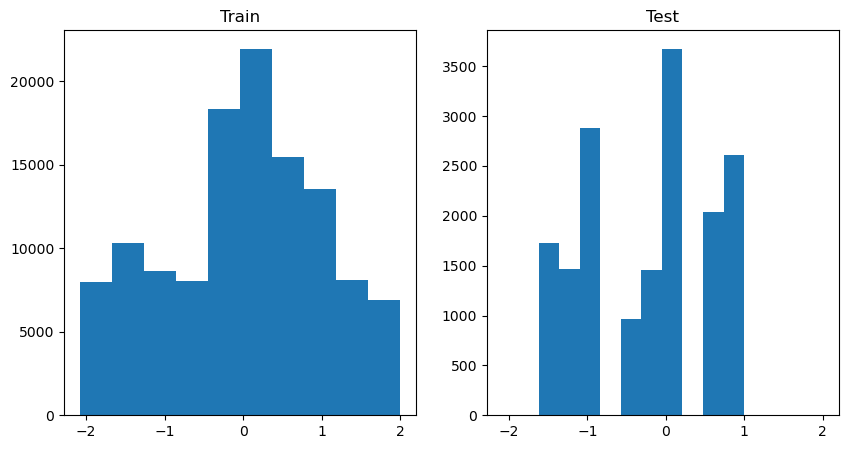

Column: ESW_pEmeEnJ_1
KS p-value: 0.0


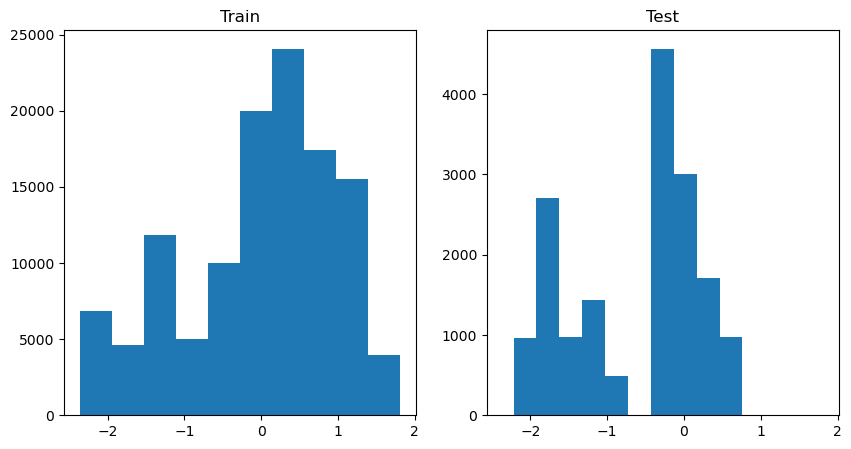

Column: ESW_pEnJFlo_1
KS p-value: 0.0


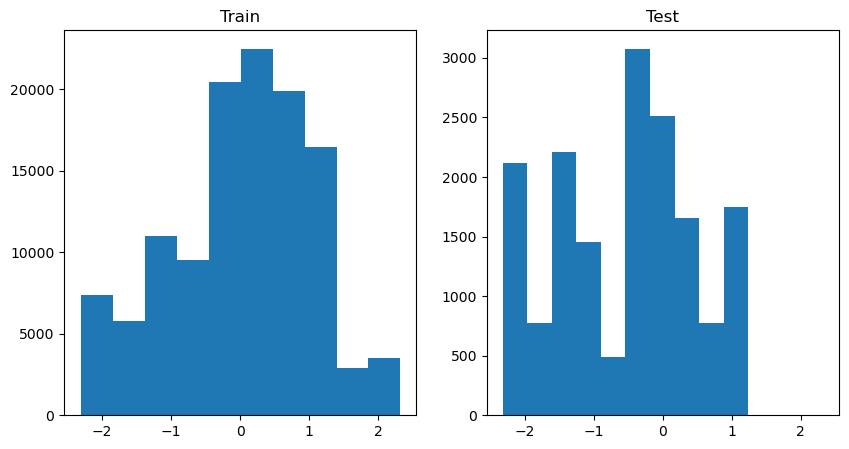

Column: ESW_pFlaFlw_1
KS p-value: 6.656940196955488e-195


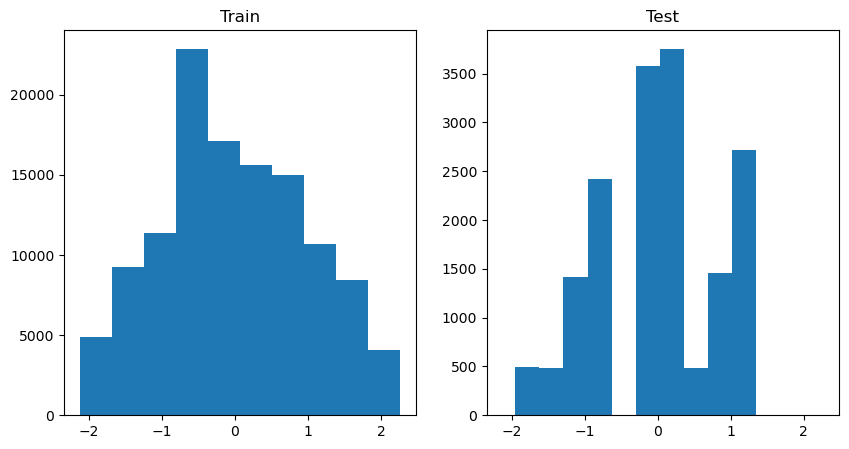

Column: ESW_pFlwStG_1
KS p-value: 0.0


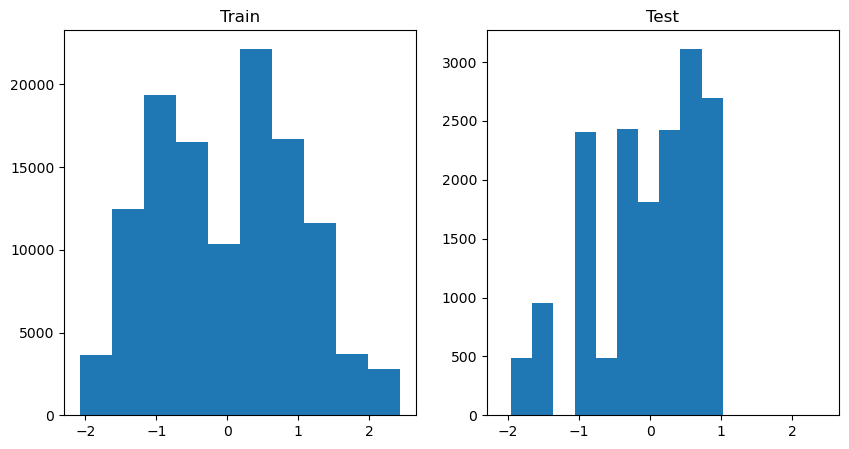

Column: ESW_pStGEnG_1
KS p-value: 0.0


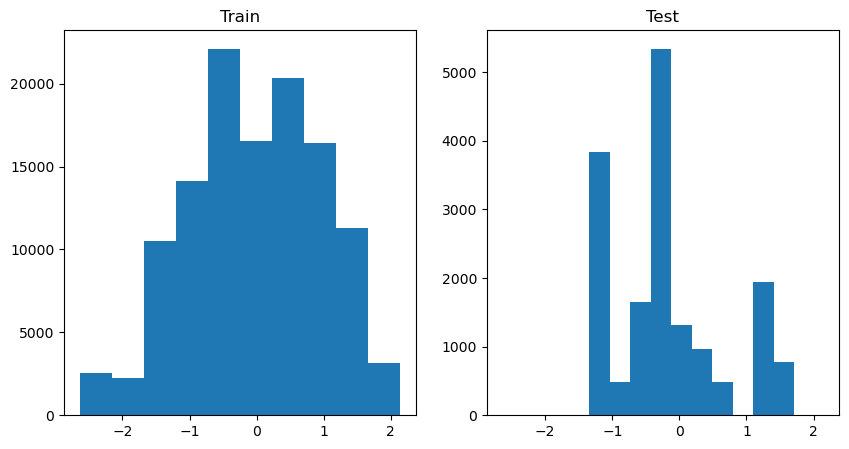

Column: ESW_pEnGMat_1
KS p-value: 0.0


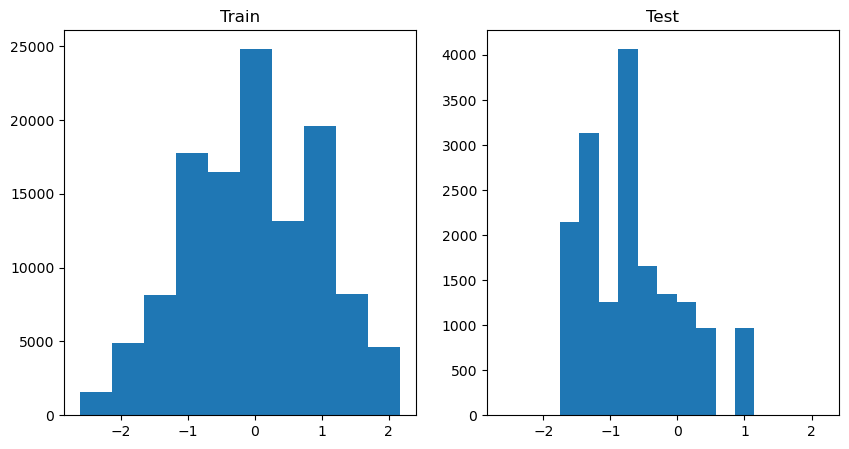

Column: ESW_pGerEme_2
KS p-value: 0.0


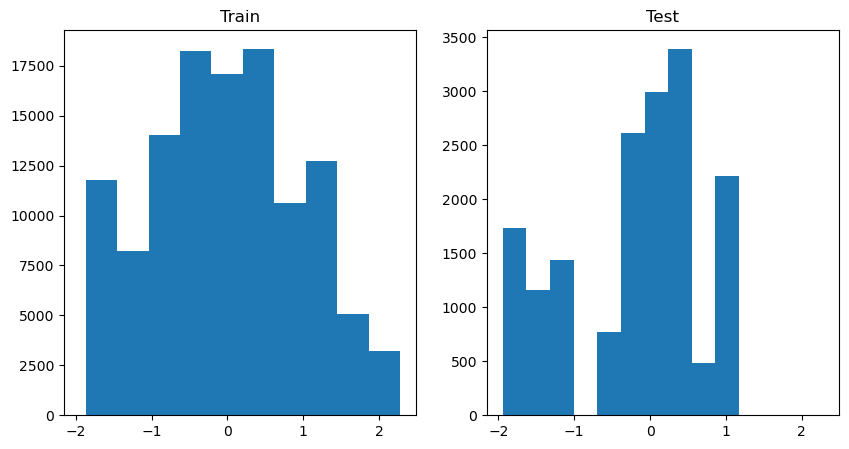

Column: ESW_pEnJFlo_2
KS p-value: 0.0


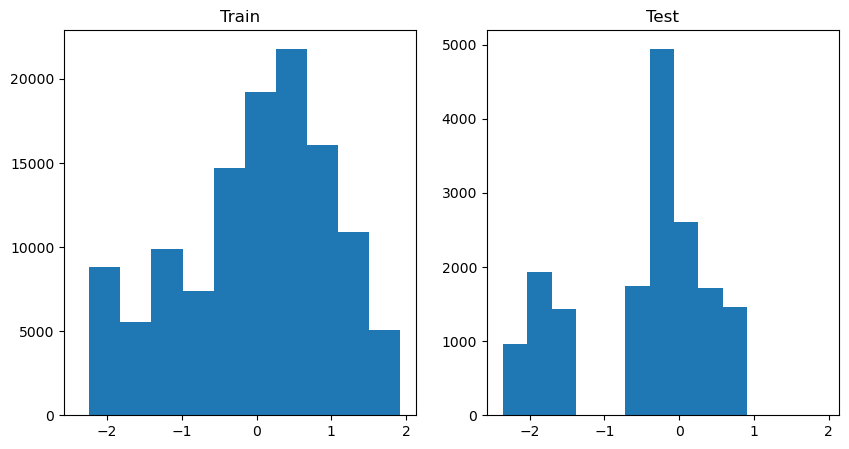

Column: ESW_pFloFla_2
KS p-value: 0.0


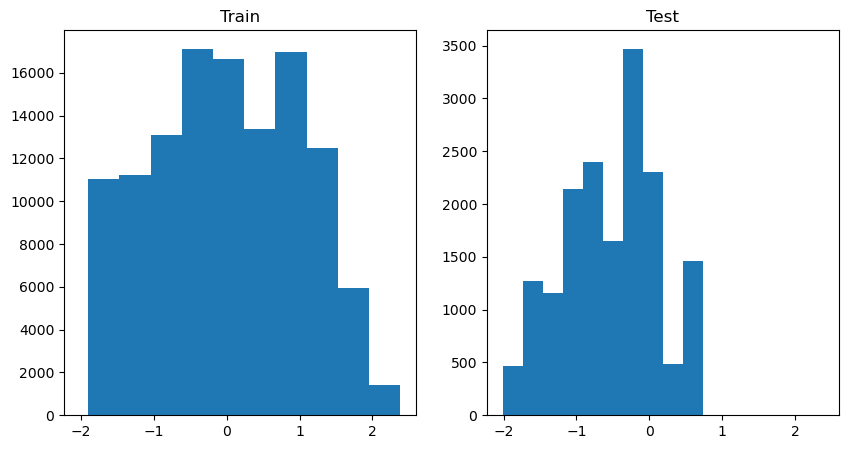

Column: ESW_pFlaFlw_2
KS p-value: 0.0


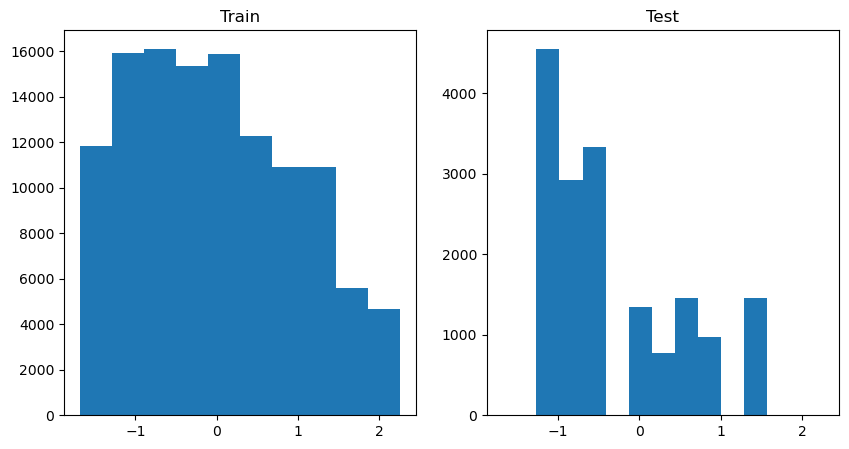

Column: ESW_pFlwStG_2
KS p-value: 0.0


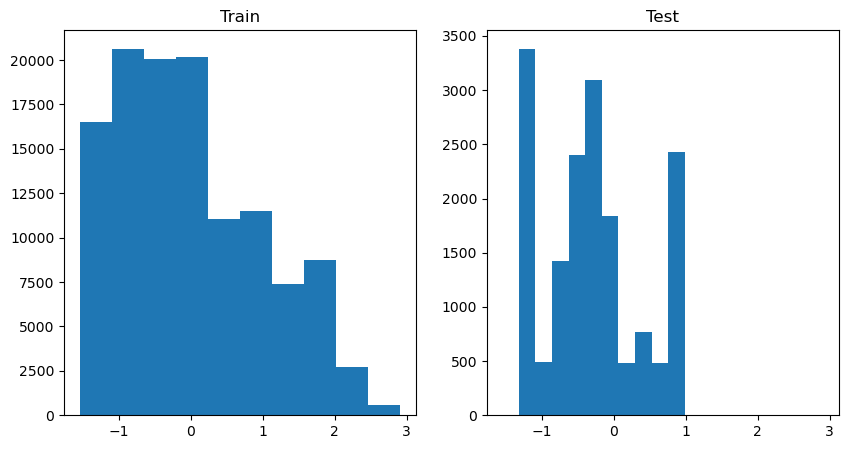

Column: ESW_pStGEnG_2
KS p-value: 0.0


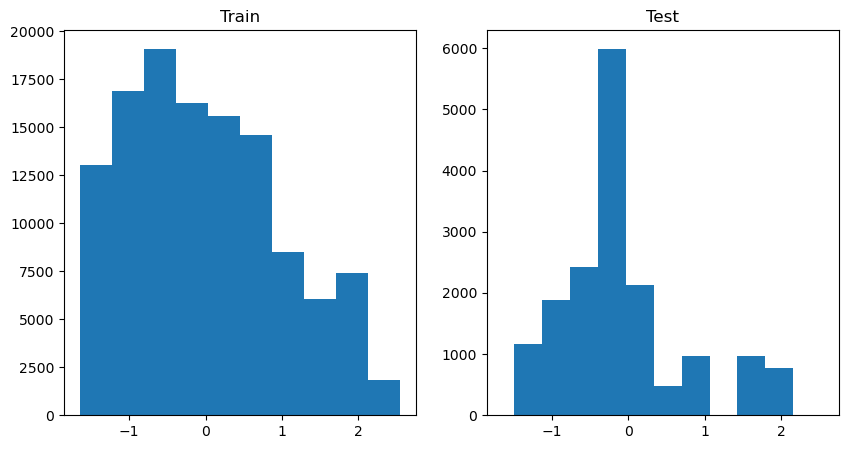

Column: ESW_pEnGMat_2
KS p-value: 0.0


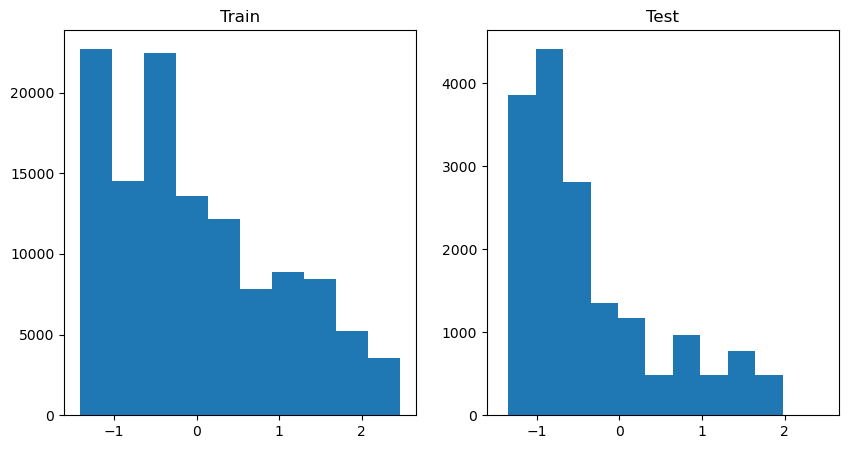

Column: ESW_pGerEme_3
KS p-value: 0.0


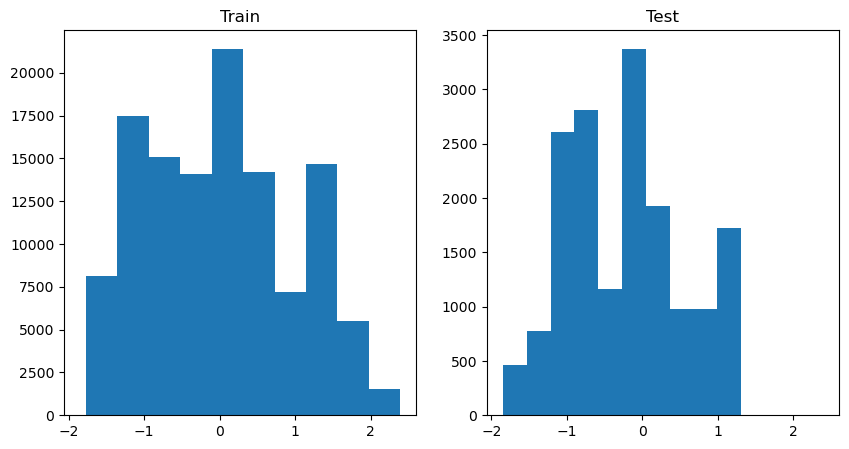

Column: ESW_pEmeEnJ_3
KS p-value: 0.0


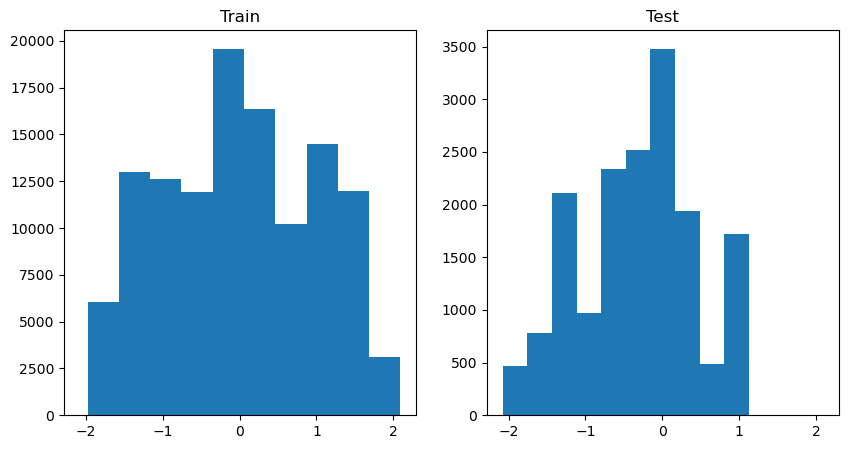

Column: ESW_pEnJFlo_3
KS p-value: 0.0


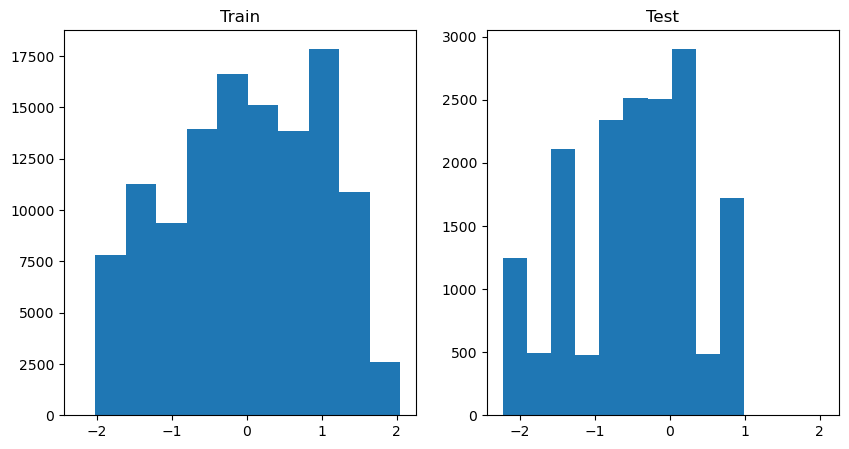

Column: ESW_pFlaFlw_3
KS p-value: 0.0


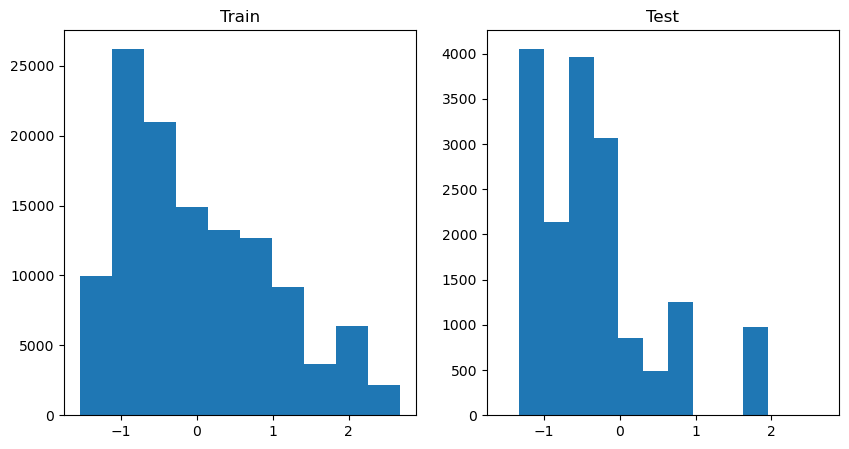

Column: ESW_pStGEnG_3
KS p-value: 0.0


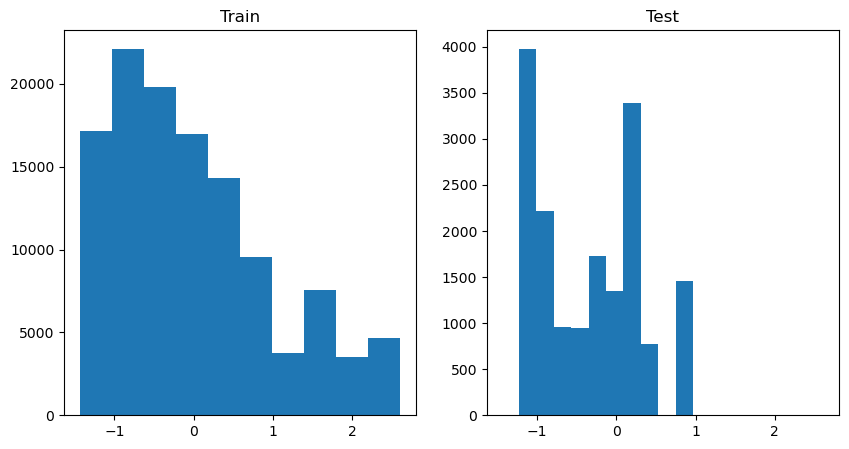

Column: ESW_pEnGMat_3
KS p-value: 0.0


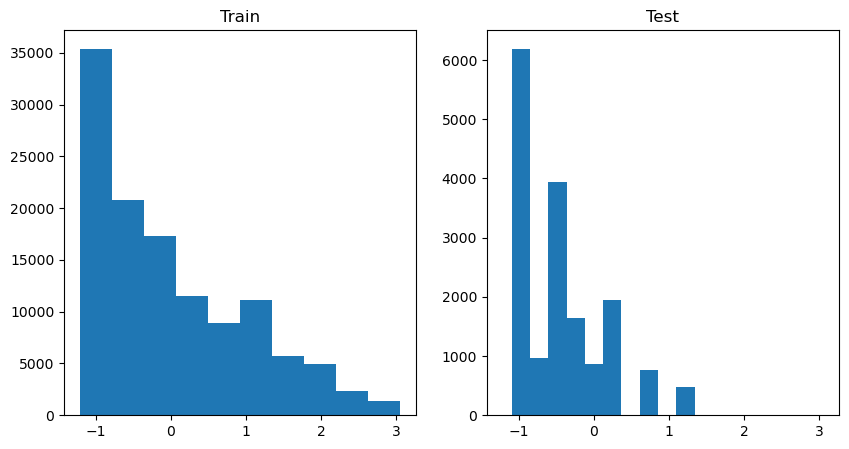

Column: ESW_pGerEme_4
KS p-value: 4.53829334417204e-161


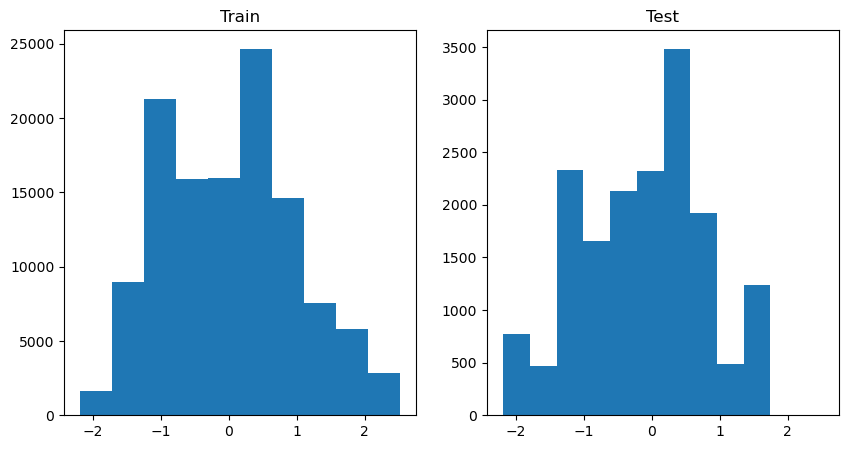

Column: ESW_pEmeEnJ_4
KS p-value: 0.0


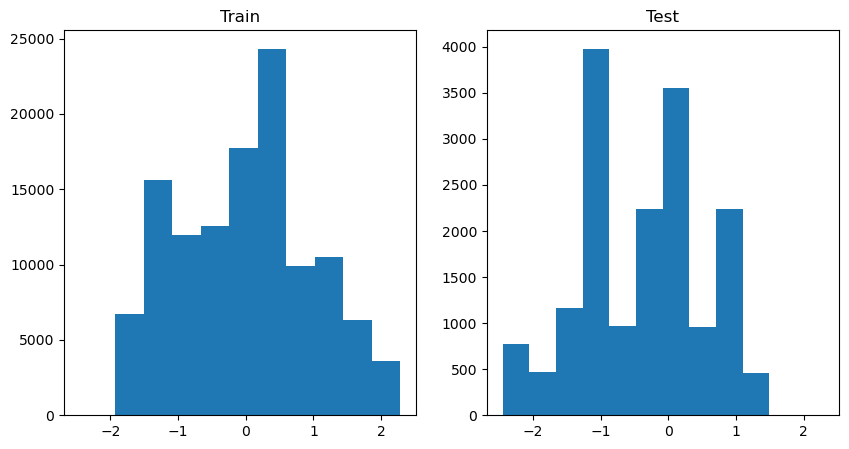

Column: ESW_pEnJFlo_4
KS p-value: 0.0


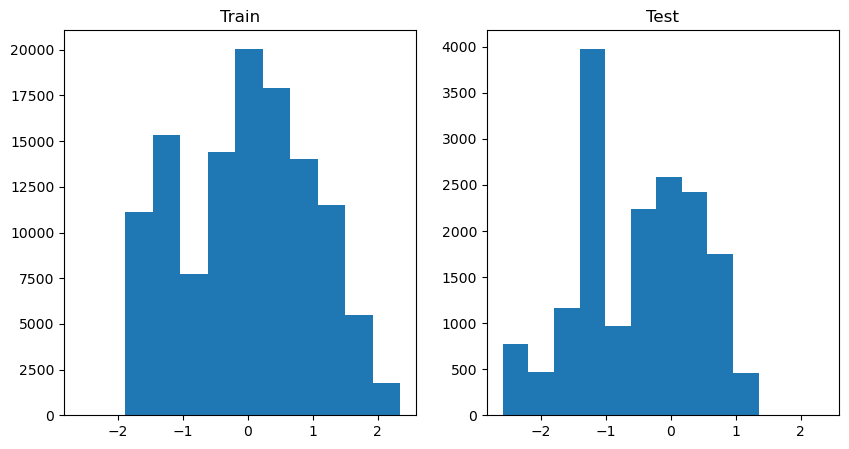

Column: ESW_pFloFla_4
KS p-value: 0.0


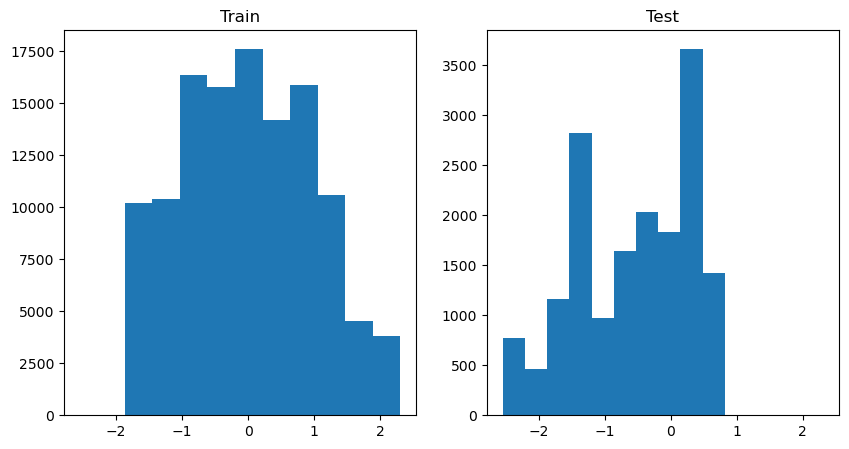

Column: ESW_pFlaFlw_4
KS p-value: 0.0


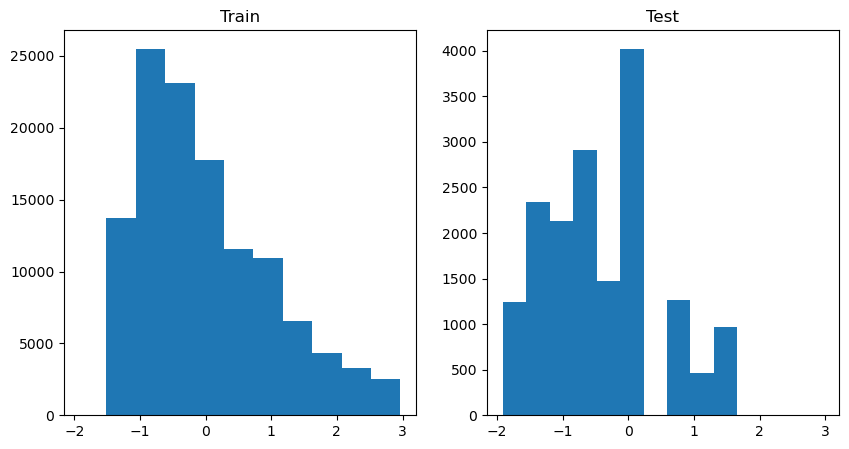

Column: ESW_pStGEnG_4
KS p-value: 0.0


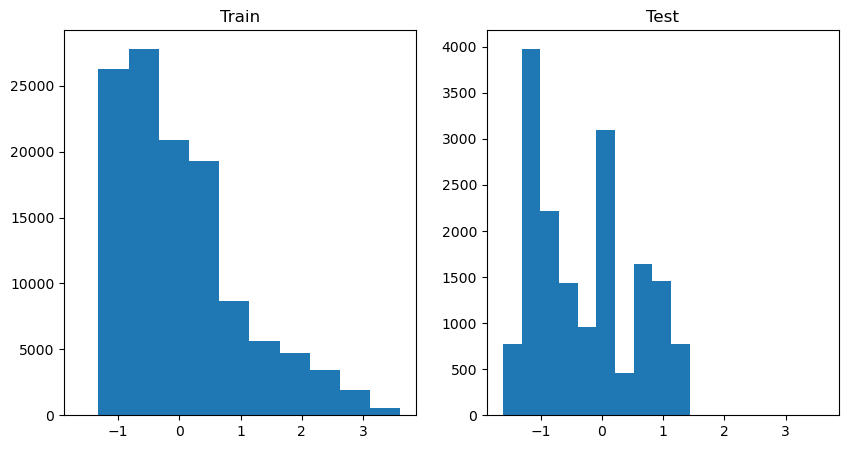

Column: ESW_pEnGMat_4
KS p-value: 0.0


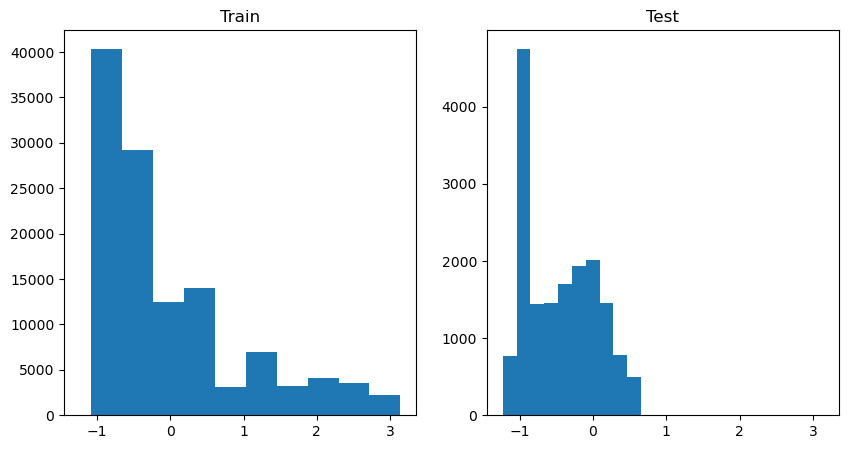

Column: ESW_pGerEme_5
KS p-value: 0.0


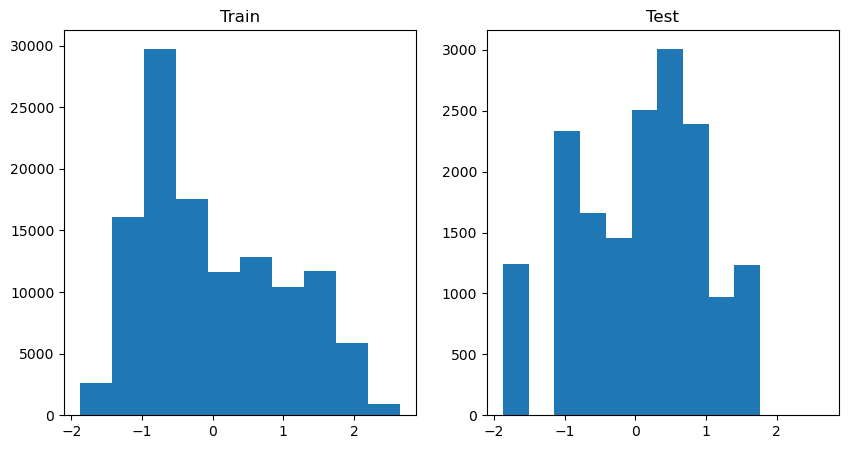

Column: ESW_pEmeEnJ_5
KS p-value: 0.0


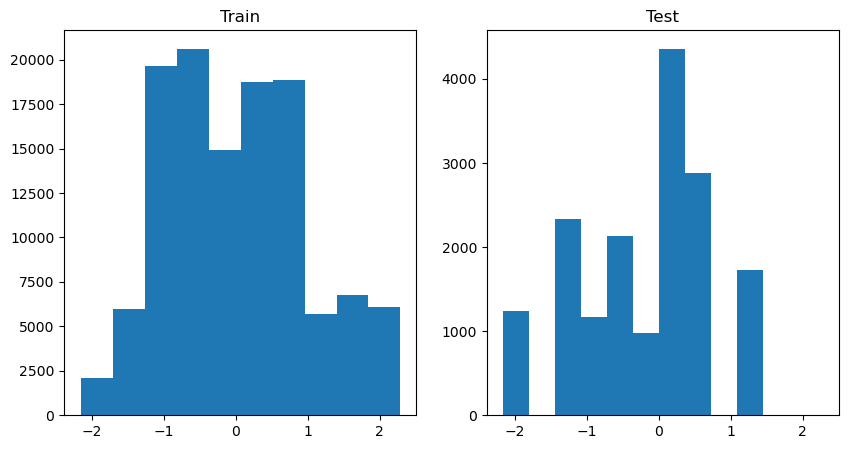

Column: ESW_pEnJFlo_5
KS p-value: 0.0


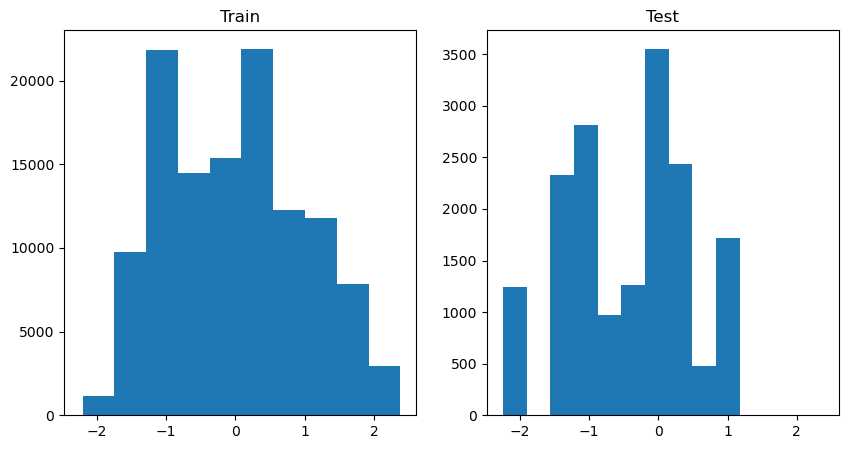

Column: ESW_pFloFla_5
KS p-value: 0.0


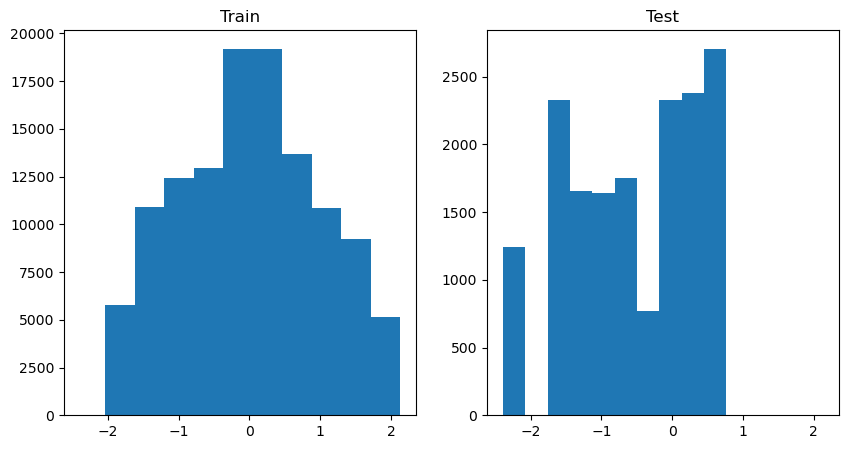

Column: ESW_pStGEnG_5
KS p-value: 0.0


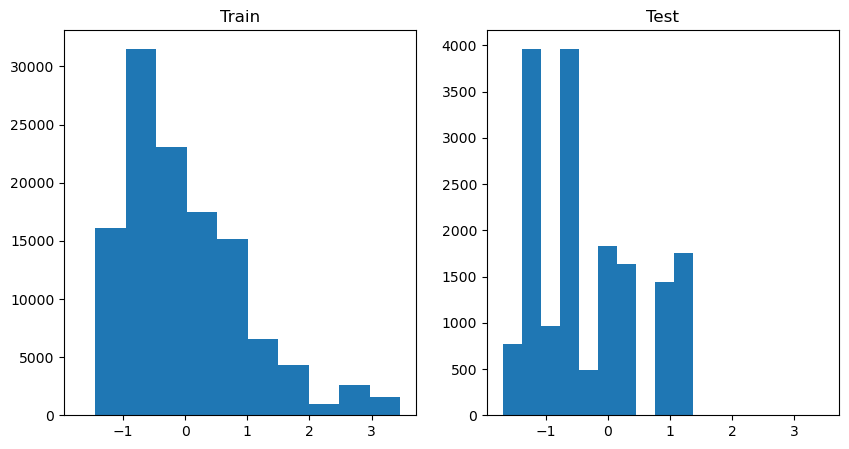

Column: ESW_pEnGMat_5
KS p-value: 0.0


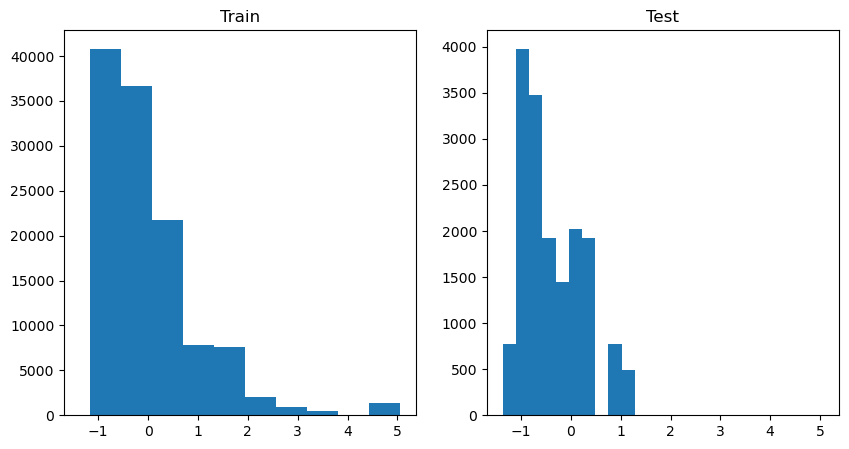

Column: ESW_pGerEme_6
KS p-value: 0.0


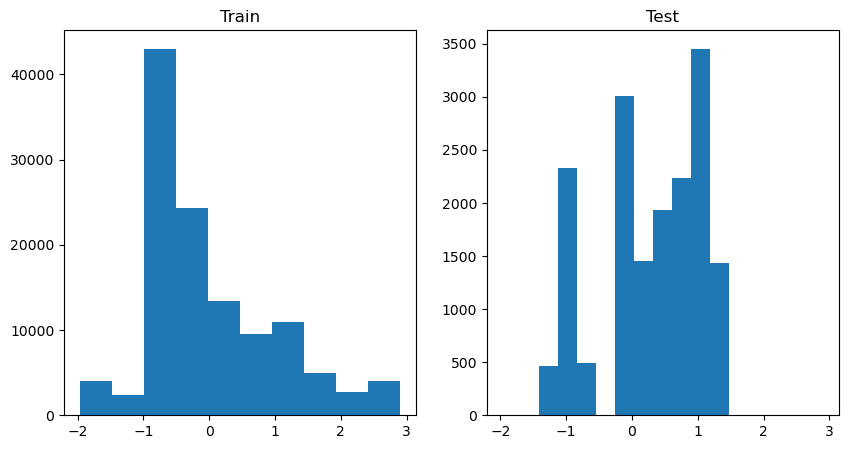

Column: ESW_pEmeEnJ_6
KS p-value: 0.0


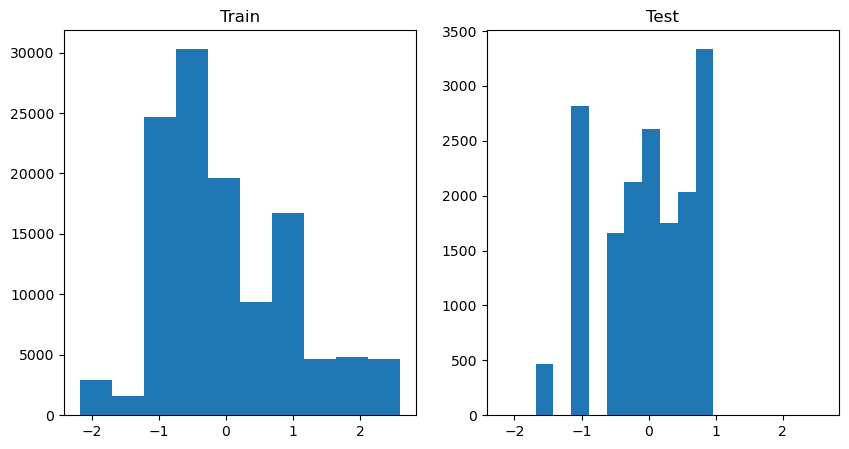

Column: ESW_pEnJFlo_6
KS p-value: 0.0


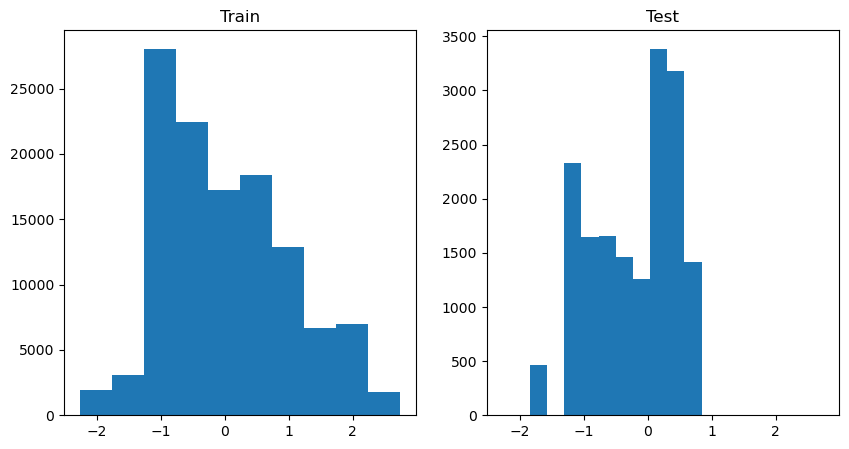

Column: ESW_pFloFla_6
KS p-value: 0.0


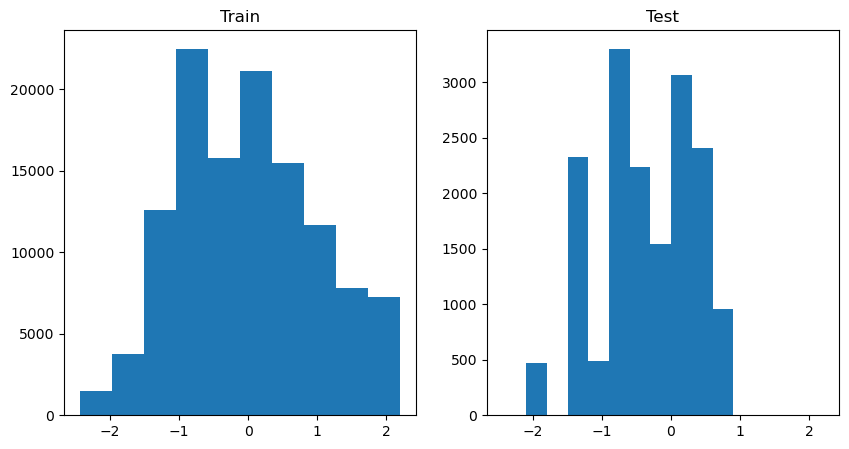

Column: ESW_pFlaFlw_6
KS p-value: 0.0


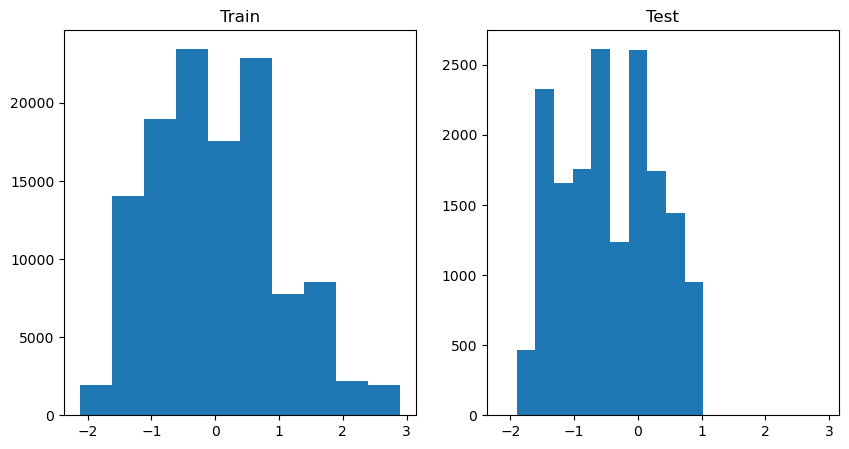

Column: ESW_pStGEnG_6
KS p-value: 0.0


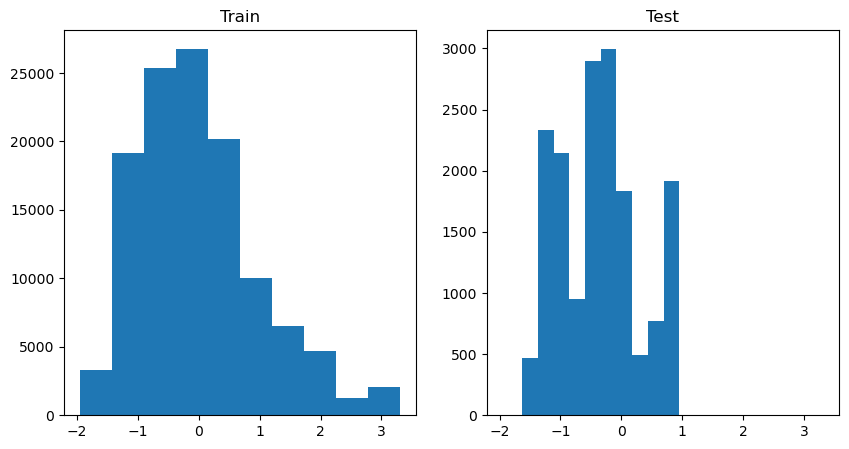

Column: ESW_pEnGMat_6
KS p-value: 0.0


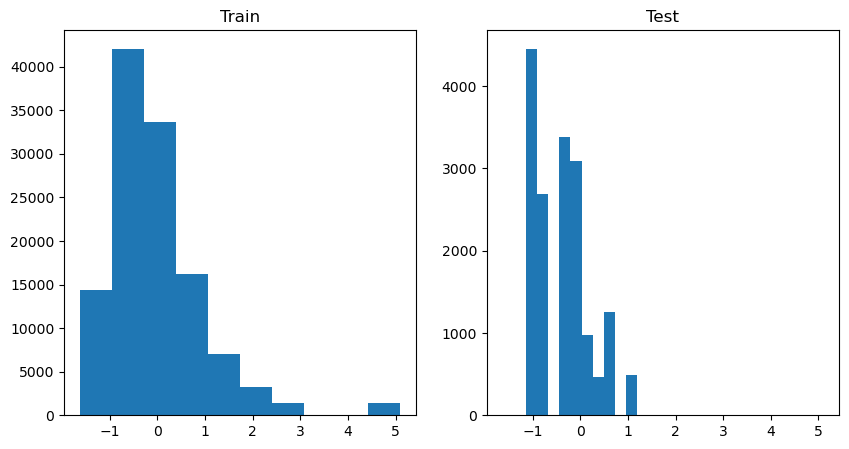

Column: ESW_pGerEme_7
KS p-value: 0.0


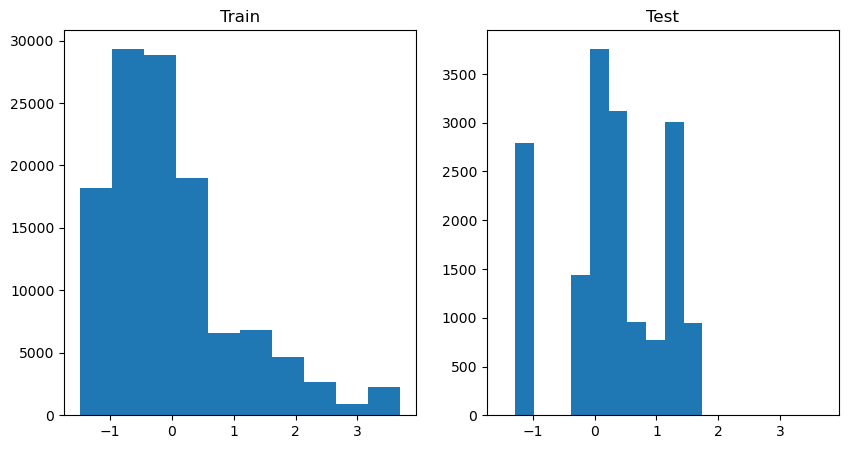

Column: ESW_pEmeEnJ_7
KS p-value: 0.0


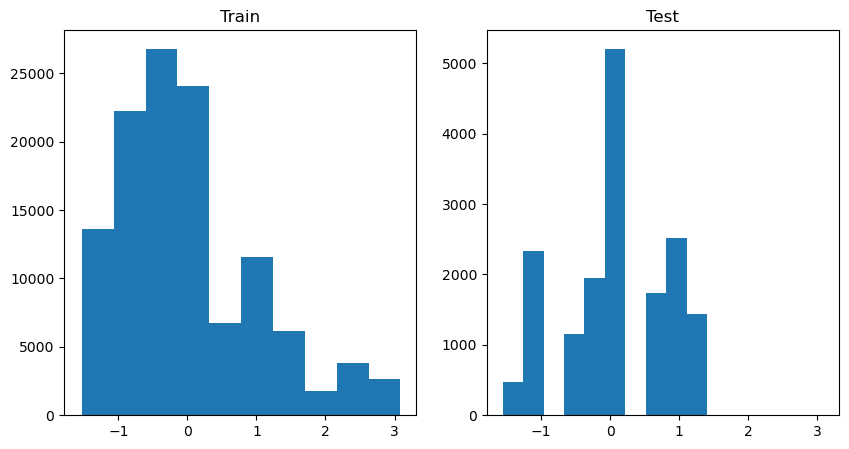

Column: ESW_pEnJFlo_7
KS p-value: 0.0


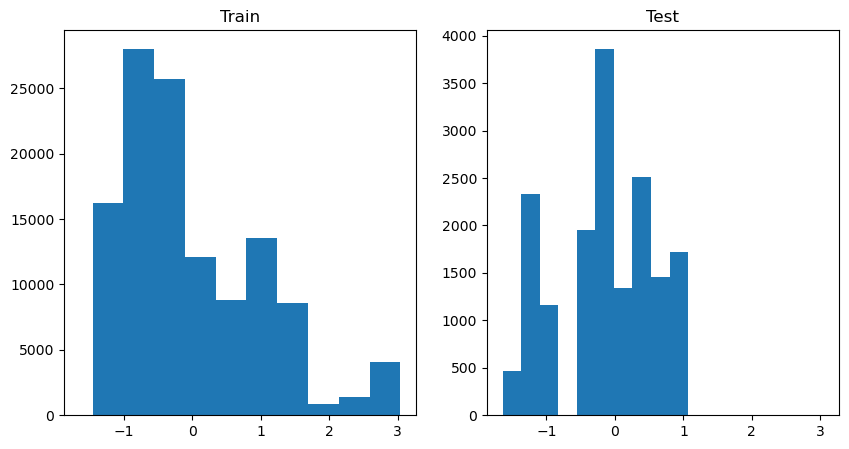

Column: ESW_pFloFla_7
KS p-value: 0.0


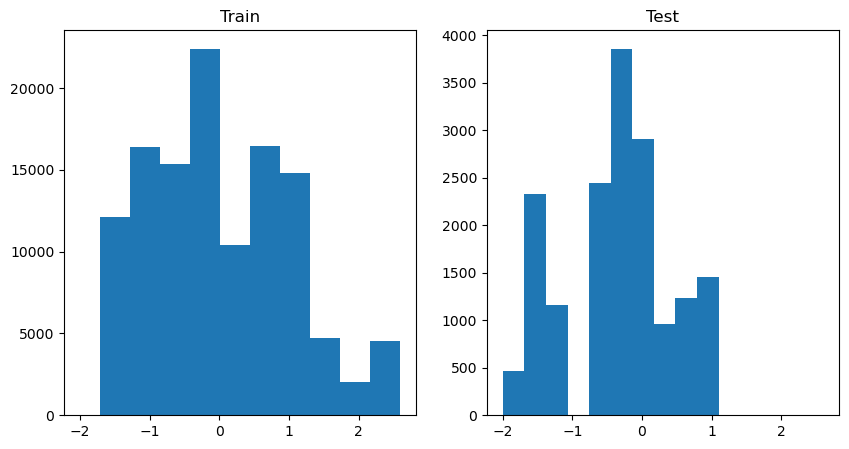

Column: ESW_pEnGMat_7
KS p-value: 0.0


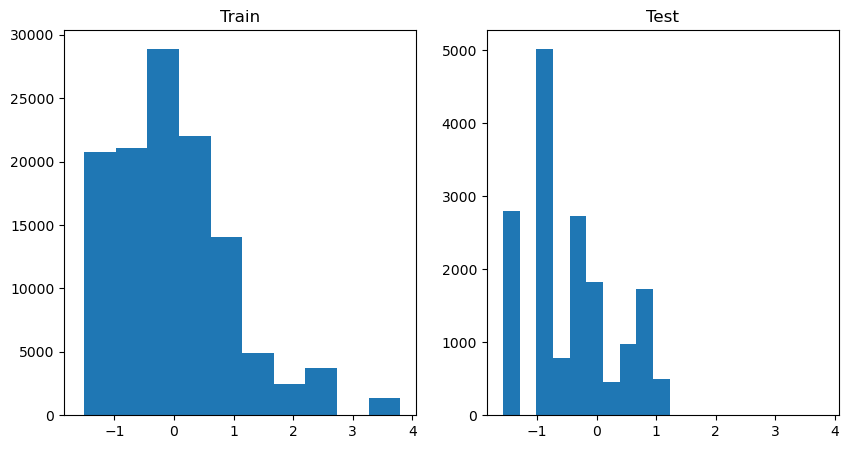

Column: ESW_pGerEme_8
KS p-value: 0.0


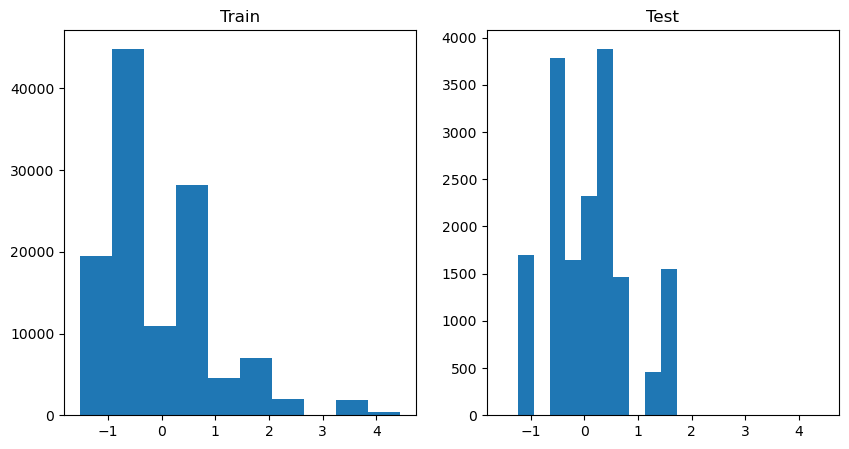

Column: ESW_pEmeEnJ_8
KS p-value: 0.0


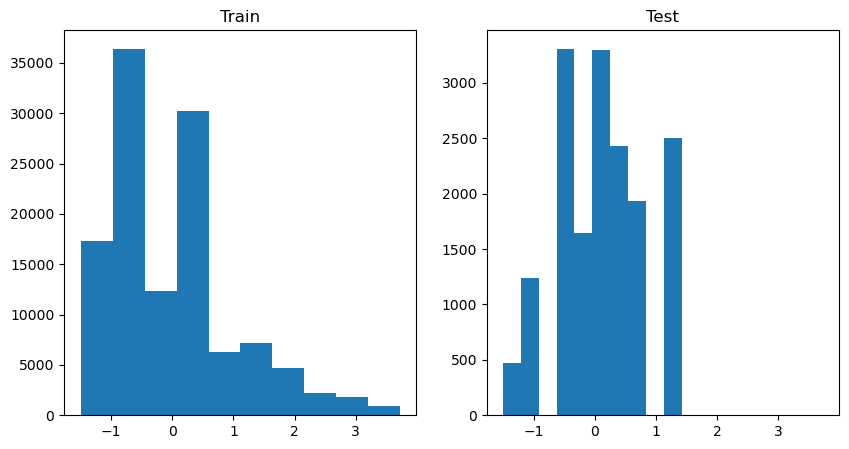

Column: ESW_pEnJFlo_8
KS p-value: 0.0


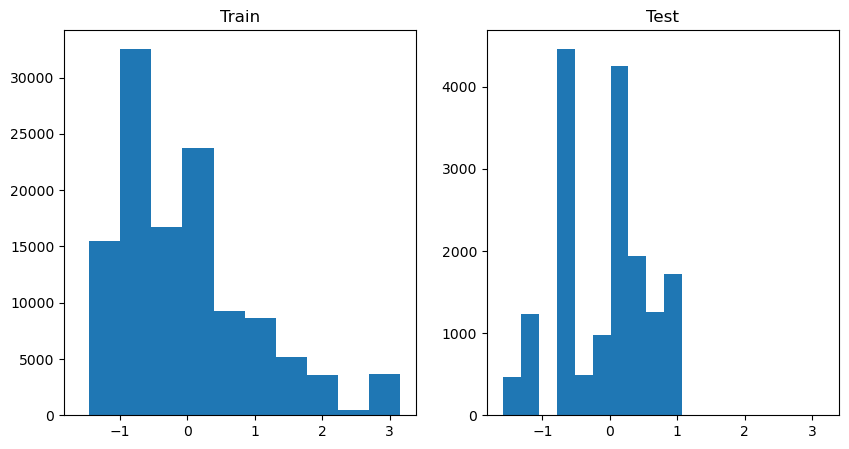

Column: ESW_pFloFla_8
KS p-value: 0.0


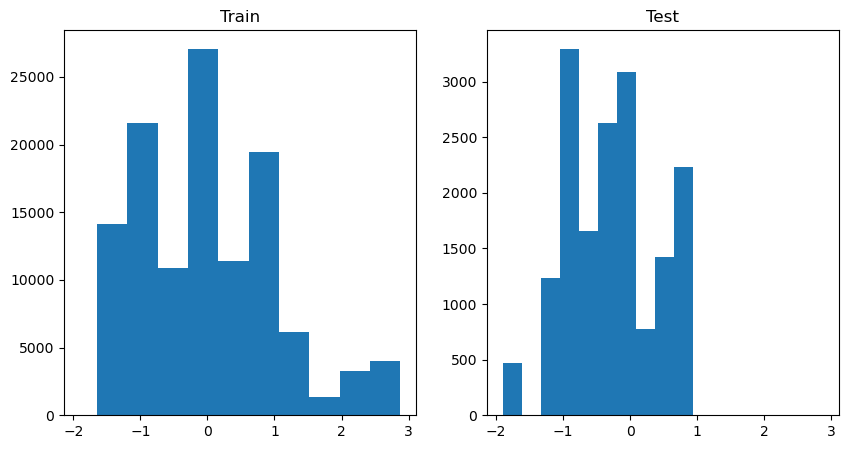

Column: ESW_pFlaFlw_8
KS p-value: 0.0


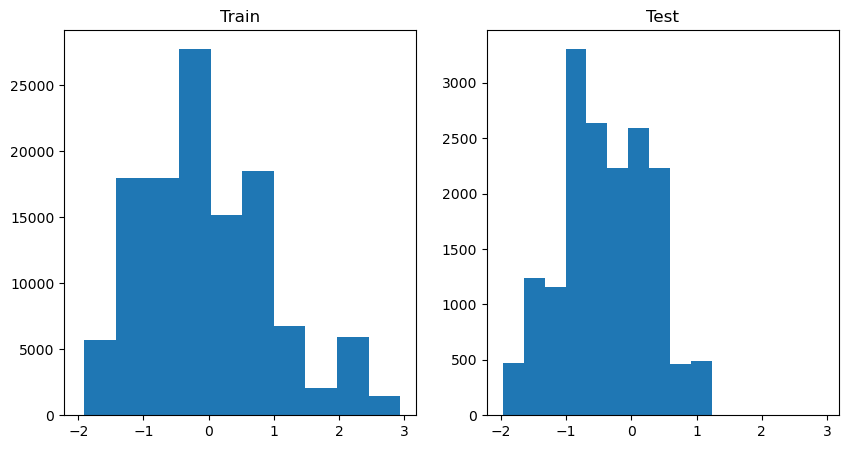

Column: ESW_pEnGMat_8
KS p-value: 0.0


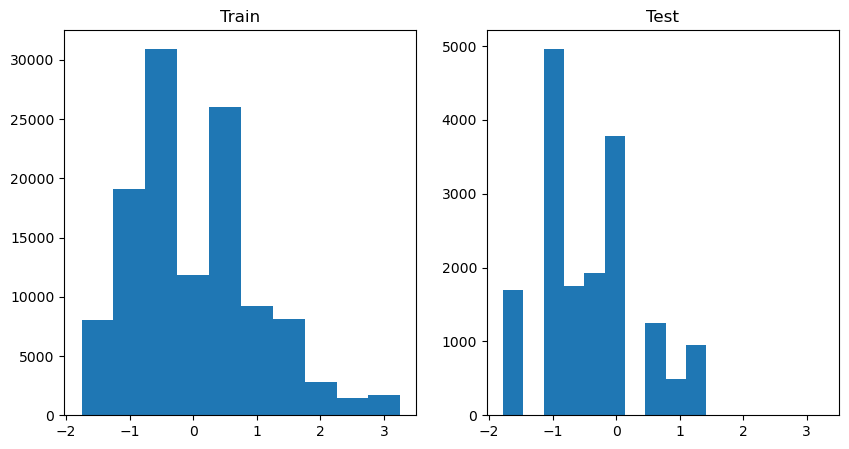

Column: ESW_pGerEme_9
KS p-value: 7.6e-322


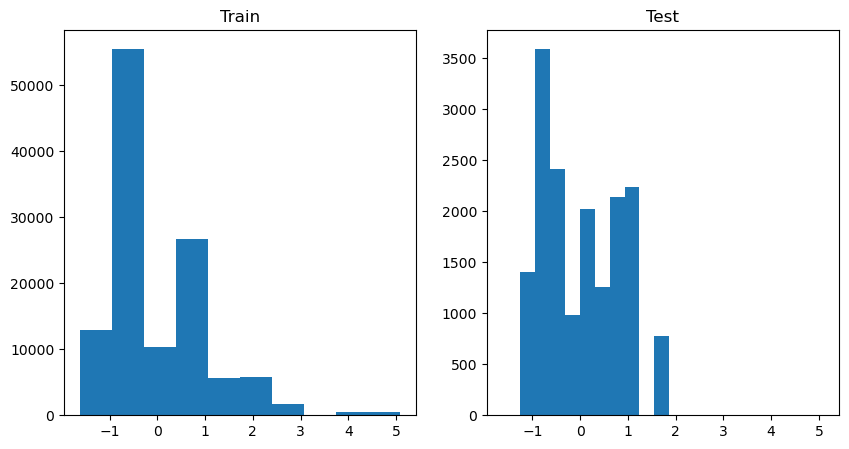

Column: ESW_pEmeEnJ_9
KS p-value: 0.0


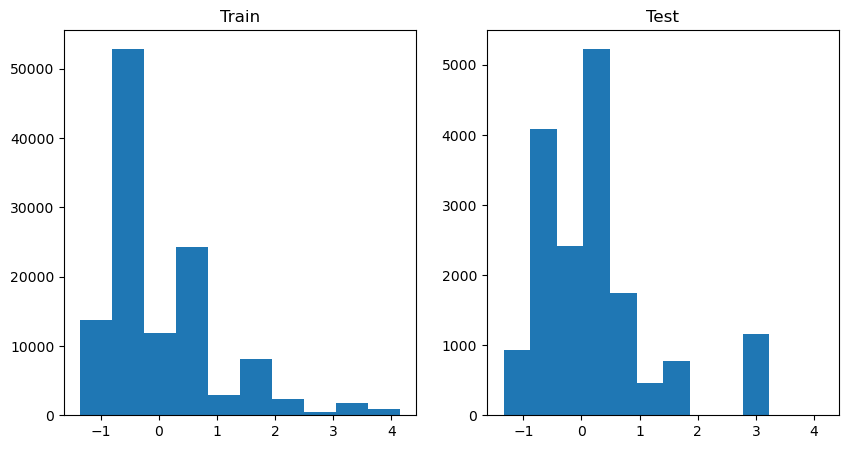

Column: ESW_pFloFla_9
KS p-value: 3.57228238492481e-201


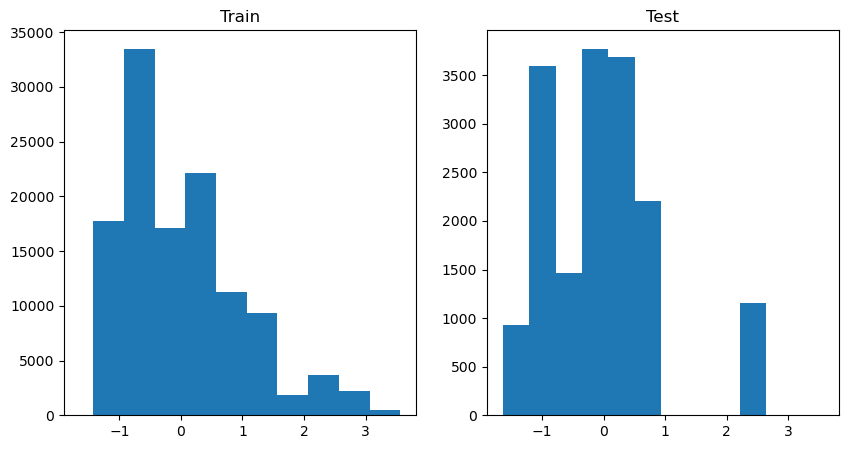

Column: ESW_pStGEnG_9
KS p-value: 0.0


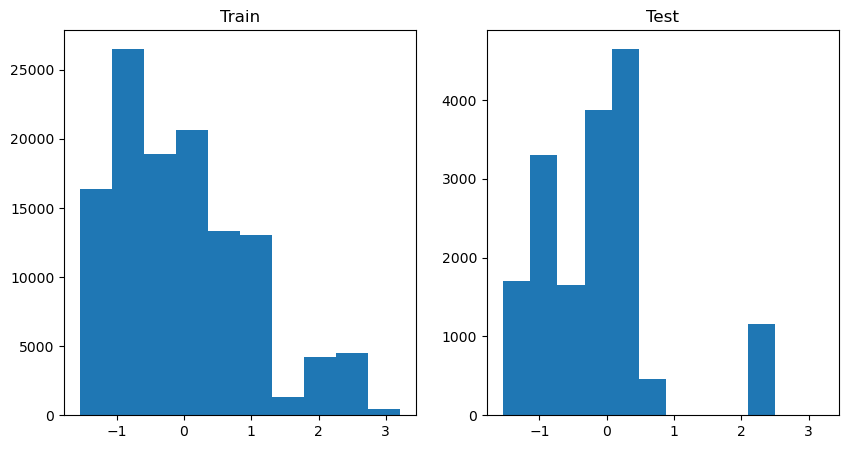

Column: ESW_pGerEme_10
KS p-value: 0.0


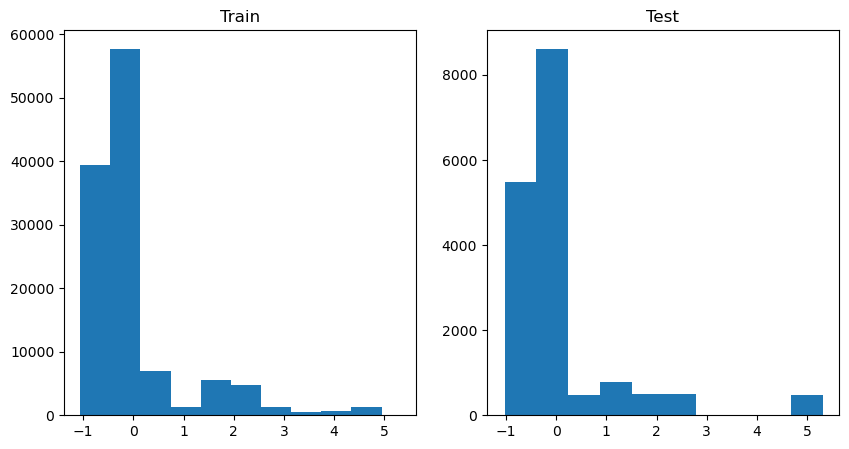

Column: ESW_pEmeEnJ_10
KS p-value: 0.0


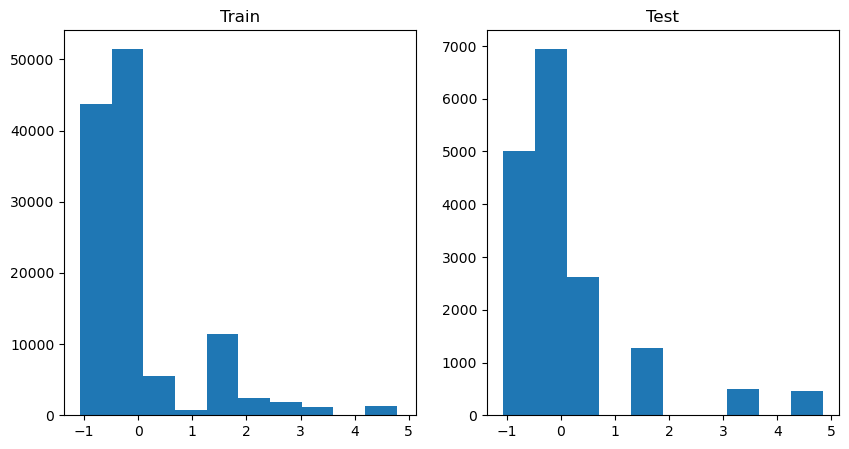

Column: ESW_pFloFla_10
KS p-value: 2.927627512975866e-190


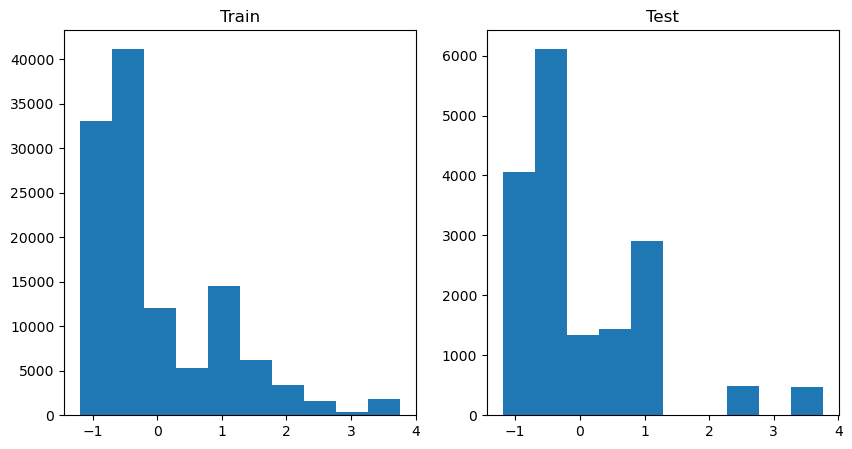

Column: ESW_pEnGMat_10
KS p-value: 1.7546617347745223e-145


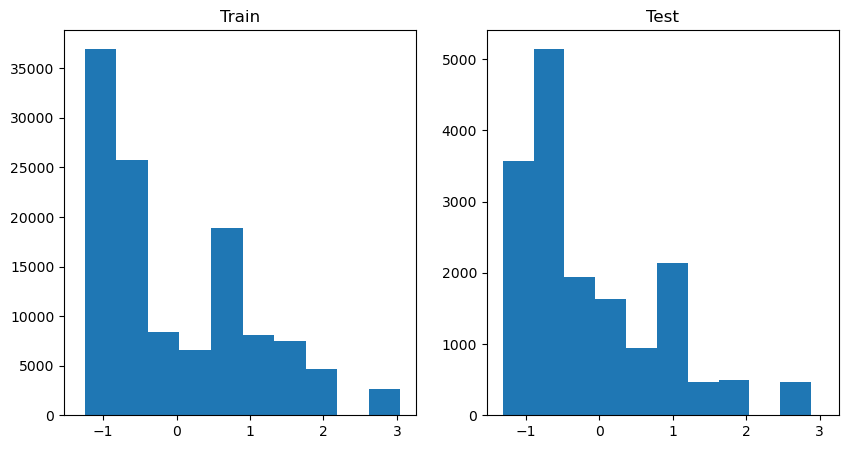

Column: Flow_pGerEme_1
KS p-value: 1.5620255980832052e-206


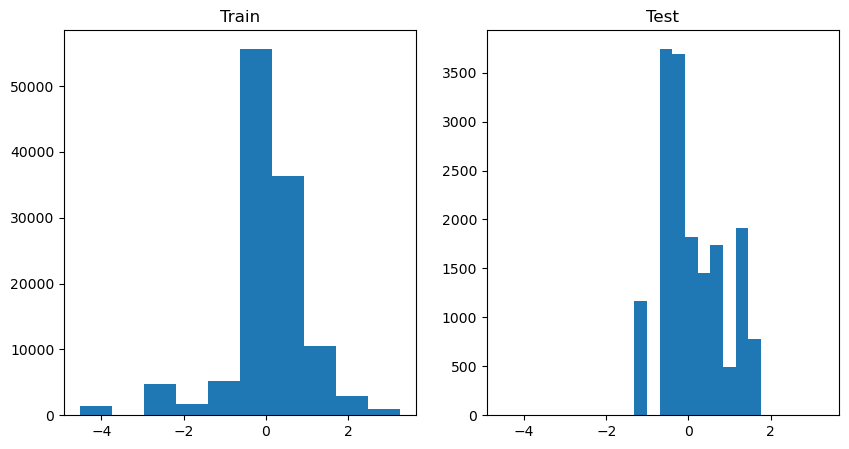

Column: Flow_pEmeEnJ_1
KS p-value: 0.0


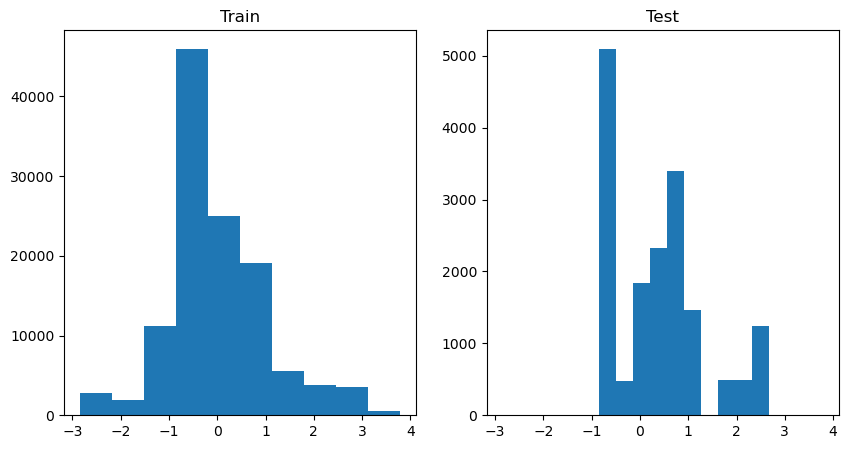

Column: Flow_pEnJFlo_1
KS p-value: 0.0


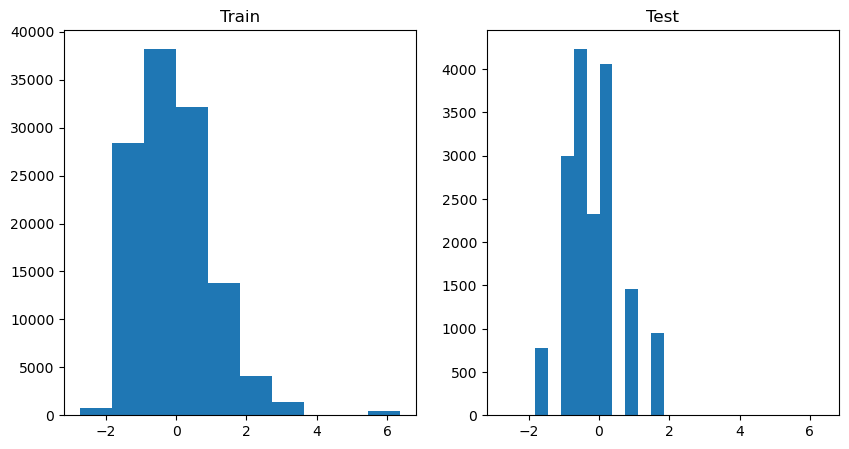

Column: Flow_pFloFla_1
KS p-value: 0.0


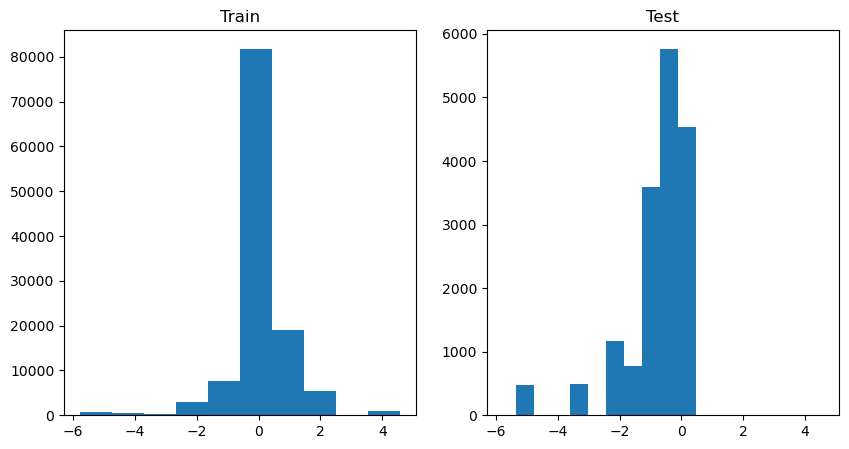

Column: Flow_pFlaFlw_1
KS p-value: 0.0


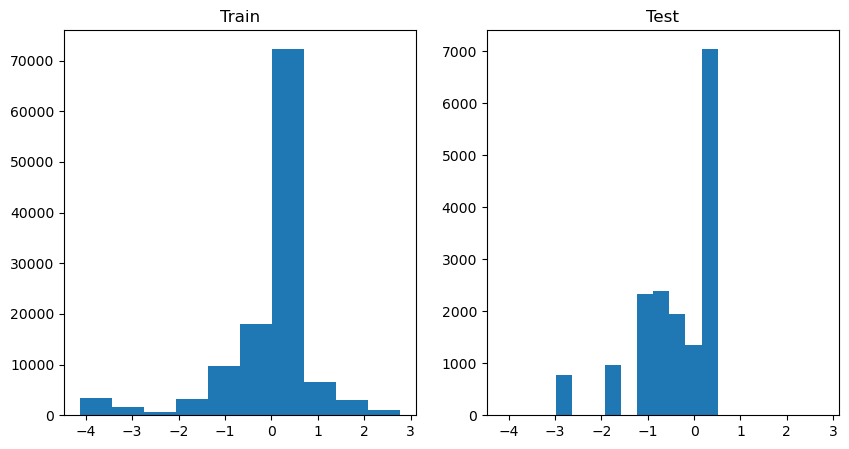

Column: Flow_pFlwStG_1
KS p-value: 0.0


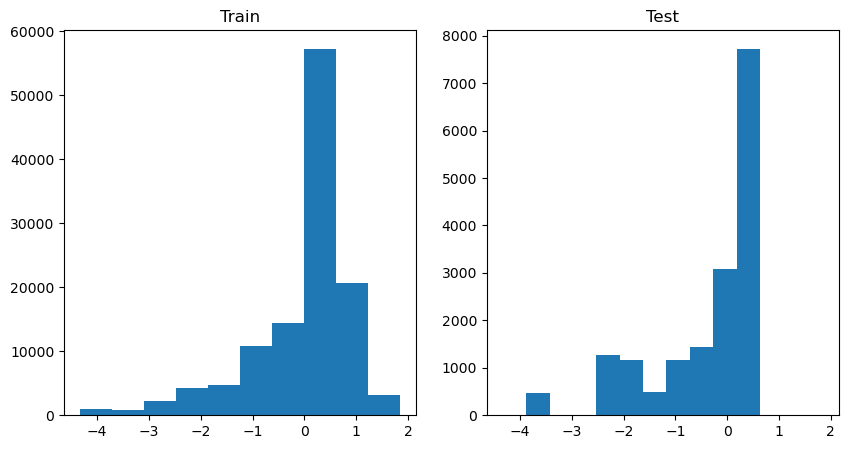

Column: Flow_pStGEnG_1
KS p-value: 2.970496365147984e-268


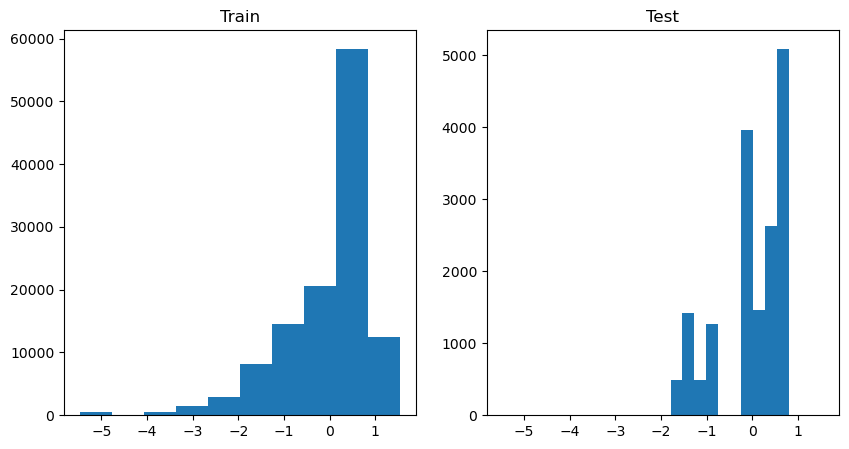

Column: Flow_pEnGMat_1
KS p-value: 0.0


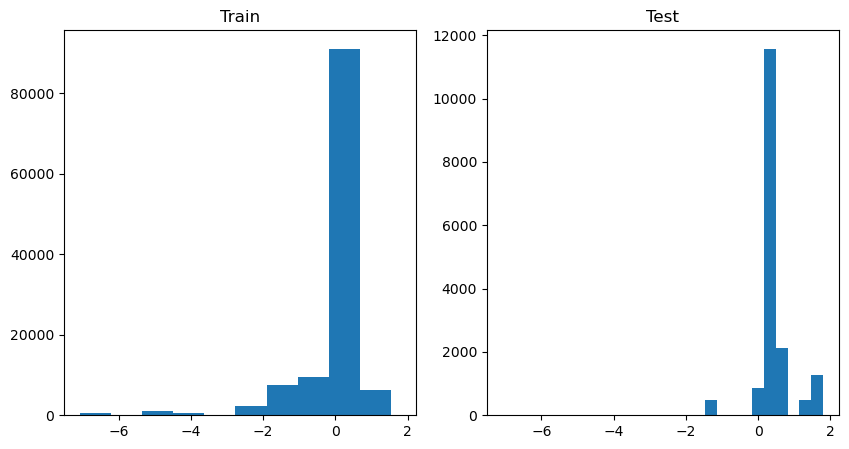

Column: Flow_pMatHar_1
KS p-value: 0.0


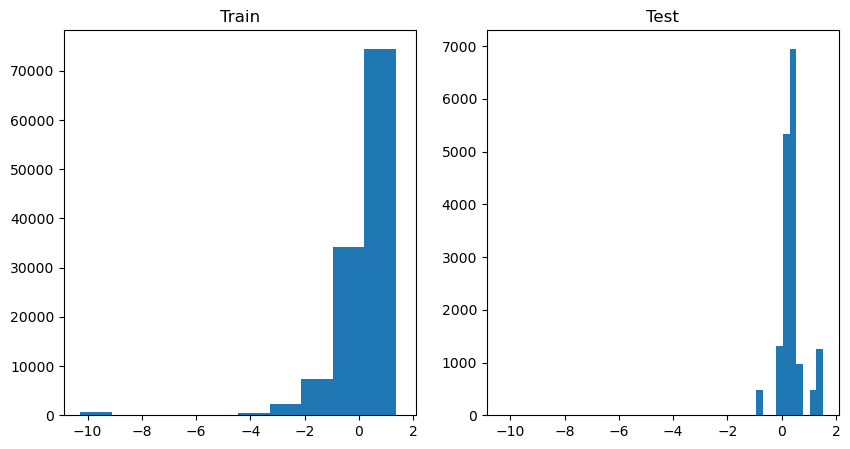

Column: Flow_pGerEme_2
KS p-value: 1.9750296236915804e-256


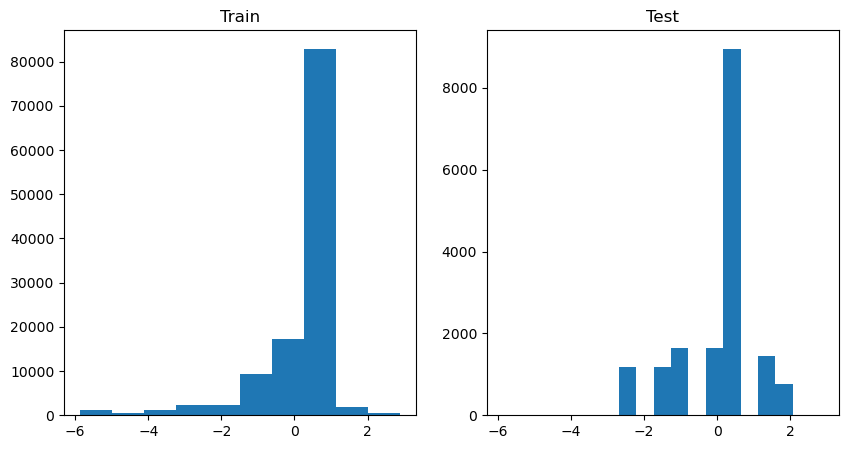

Column: Flow_pEmeEnJ_2
KS p-value: 0.0


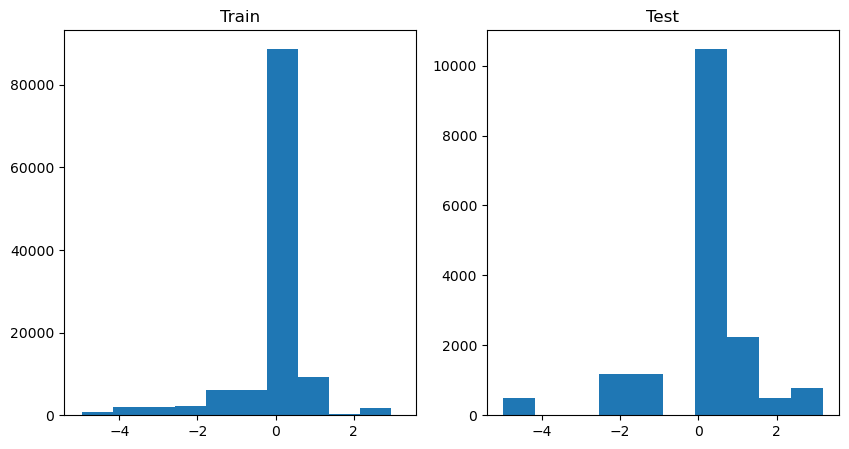

Column: Flow_pEnJFlo_2
KS p-value: 0.0


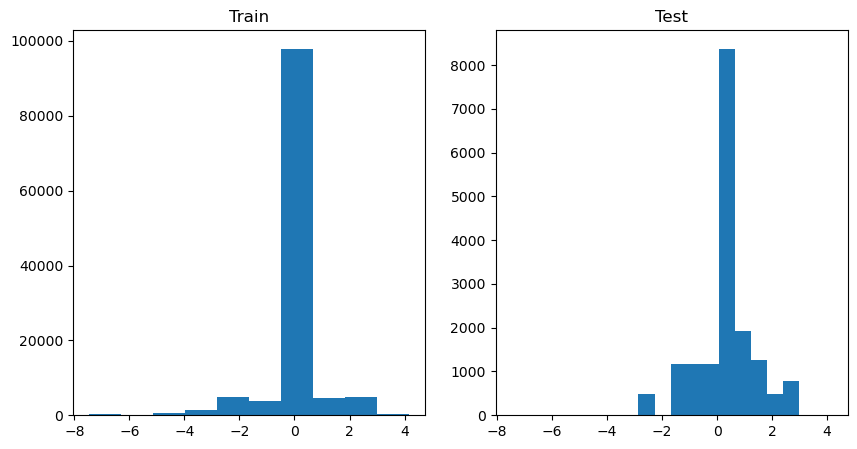

Column: Flow_pFloFla_2
KS p-value: 0.0


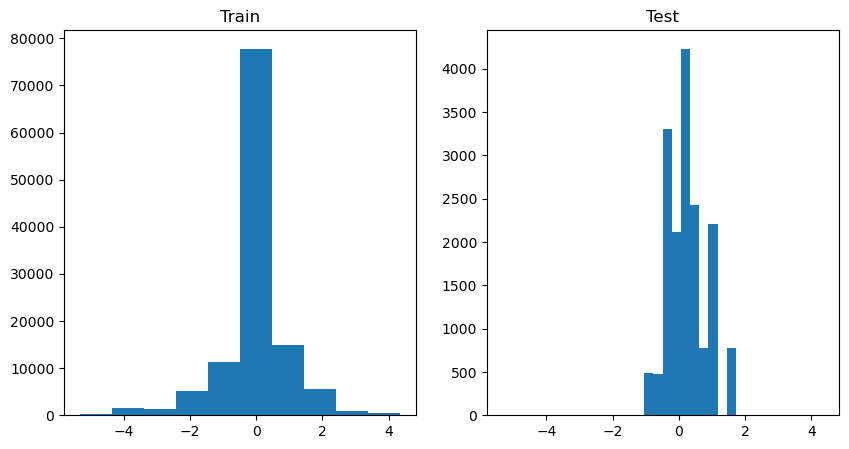

Column: Flow_pFlaFlw_2
KS p-value: 2.495847096960353e-255


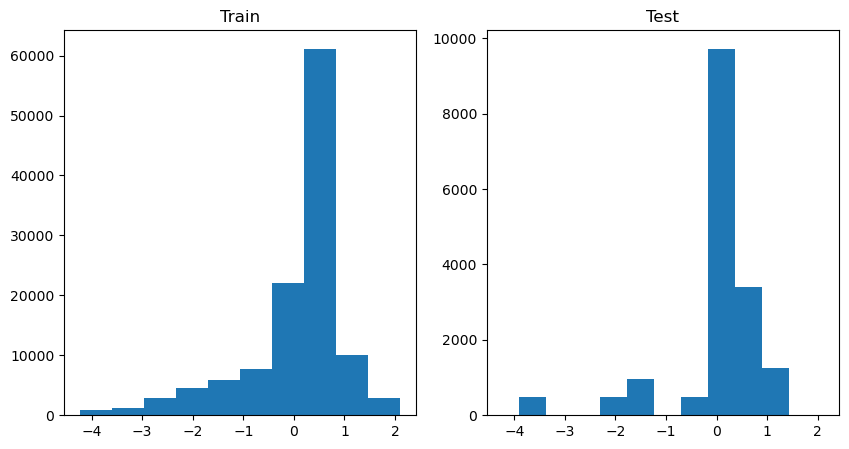

Column: Flow_pFlwStG_2
KS p-value: 1.5310279562282357e-217


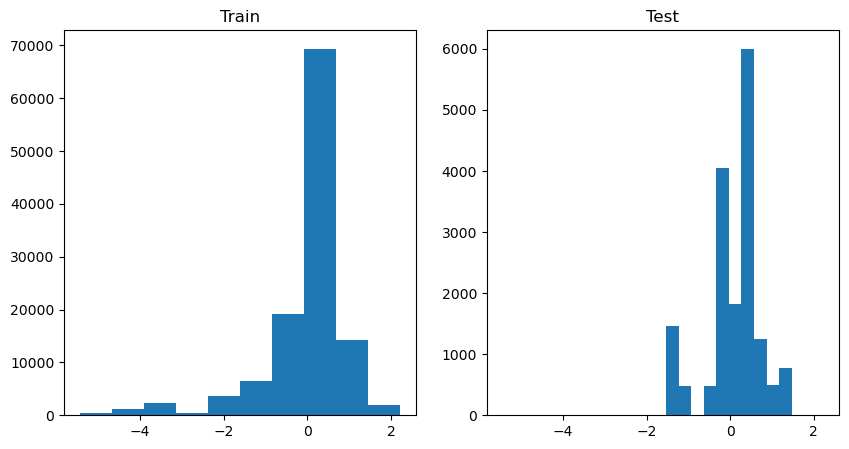

Column: Flow_pStGEnG_2
KS p-value: 1.805230286652342e-228


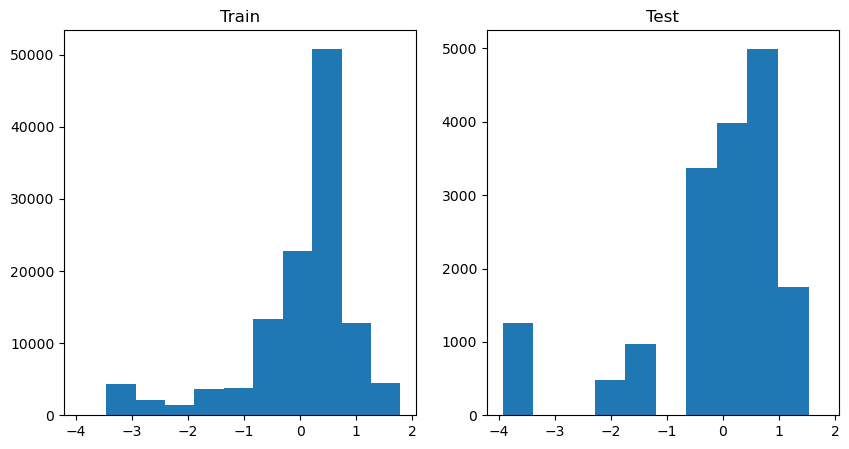

Column: Flow_pEnGMat_2
KS p-value: 0.0


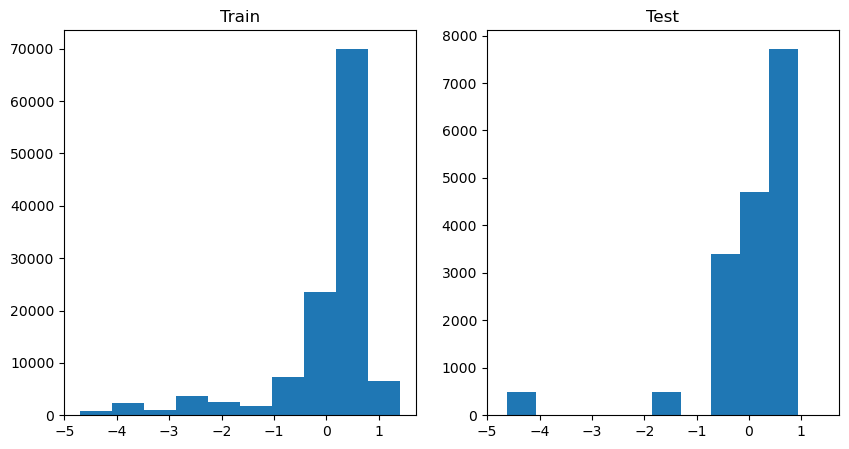

Column: Flow_pGerEme_3
KS p-value: 1.3337857292157659e-161


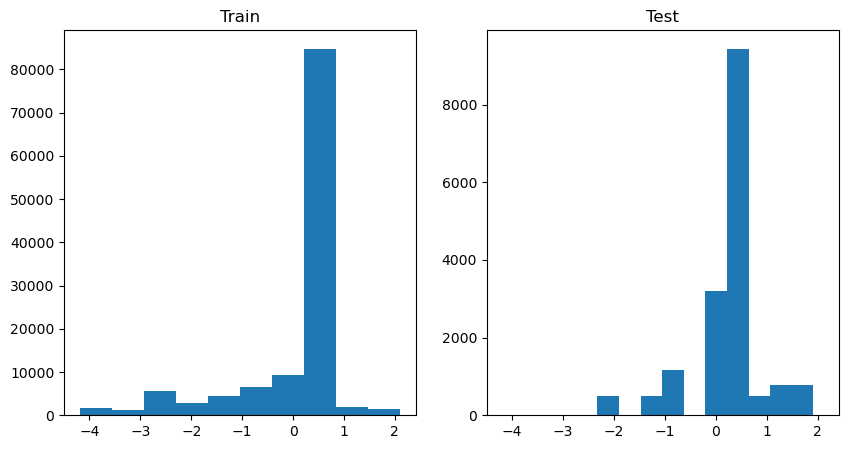

Column: Flow_pEmeEnJ_3
KS p-value: 0.0


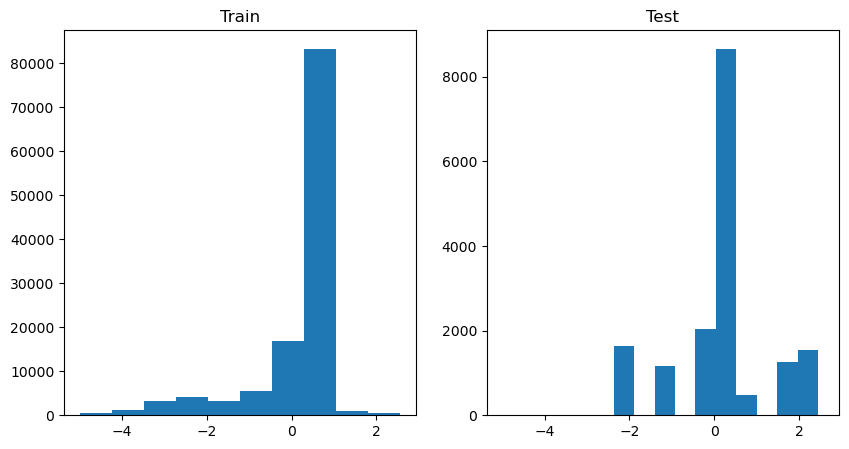

Column: Flow_pEnJFlo_3
KS p-value: 0.0


In [8]:
# scale data and plot again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
e_train_scaled = scaler.fit_transform(e_train)
e_test_scaled = scaler.transform(e_test)
# compare distribution of e data with kolmogorov smirnov test
for i in tqdm(range(len(e_train.columns))):
    # get KLD
    ks = ks_2samp(e_train_scaled[:, i], e_test_scaled[:, i])
    if ks.pvalue < 0.15:
        print(f'Column: {e_train.columns[i]}')
        print(f'KS p-value: {ks.pvalue}')
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
        ax[0].hist(e_train_scaled[:, i])
        ax[0].set_title('Train')
        ax[1].hist(e_test_scaled[:, i])
        ax[1].set_title('Test')
        plt.show()